In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
from scipy import signal

In [2]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
# 1. Drop unneeded columns in frames data

# Returns the list of used columns (dropping lower joints, useless features...)
def computeUsedColumns() :
    # header computed on one frame row (skipping rows 2-6) with following replace regex
    # ([A-z]+)\s*\w+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+
    # $1\t$1Status\t$1LocX\t$1LocY\t$1LocZ\t$1OrW\t$1OrX\t$1OrY\t$1OrZ\t
    header = ["Index","Time","SkeletonId","HandLeftConfidence","HandLeftState","HandRightConfidence","HandRightState","SpineBase","SpineBaseStatus","SpineBaseLocX","SpineBaseLocY","SpineBaseLocZ","SpineBaseOrW","SpineBaseOrX","SpineBaseOrY","SpineBaseOrZ","SpineMid","SpineMidStatus","SpineMidLocX","SpineMidLocY","SpineMidLocZ","SpineMidOrW","SpineMidOrX","SpineMidOrY","SpineMidOrZ","Neck","NeckStatus","NeckLocX","NeckLocY","NeckLocZ","NeckOrW","NeckOrX","NeckOrY","NeckOrZ","Head","HeadStatus","HeadLocX","HeadLocY","HeadLocZ","HeadOrW","HeadOrX","HeadOrY","HeadOrZ","ShoulderLeft","ShoulderLeftStatus","ShoulderLeftLocX","ShoulderLeftLocY","ShoulderLeftLocZ","ShoulderLeftOrW","ShoulderLeftOrX","ShoulderLeftOrY","ShoulderLeftOrZ","ElbowLeft","ElbowLeftStatus","ElbowLeftLocX","ElbowLeftLocY","ElbowLeftLocZ","ElbowLeftOrW","ElbowLeftOrX","ElbowLeftOrY","ElbowLeftOrZ","WristLeft","WristLeftStatus","WristLeftLocX","WristLeftLocY","WristLeftLocZ","WristLeftOrW","WristLeftOrX","WristLeftOrY","WristLeftOrZ","HandLeft","HandLeftStatus","HandLeftLocX","HandLeftLocY","HandLeftLocZ","HandLeftOrW","HandLeftOrX","HandLeftOrY","HandLeftOrZ","ShoulderRight","ShoulderRightStatus","ShoulderRightLocX","ShoulderRightLocY","ShoulderRightLocZ","ShoulderRightOrW","ShoulderRightOrX","ShoulderRightOrY","ShoulderRightOrZ","ElbowRight","ElbowRightStatus","ElbowRightLocX","ElbowRightLocY","ElbowRightLocZ","ElbowRightOrW","ElbowRightOrX","ElbowRightOrY","ElbowRightOrZ","WristRight","WristRightStatus","WristRightLocX","WristRightLocY","WristRightLocZ","WristRightOrW","WristRightOrX","WristRightOrY","WristRightOrZ","HandRight","HandRightStatus","HandRightLocX","HandRightLocY","HandRightLocZ","HandRightOrW","HandRightOrX","HandRightOrY","HandRightOrZ","HipLeft","HipLeftStatus","HipLeftLocX","HipLeftLocY","HipLeftLocZ","HipLeftOrW","HipLeftOrX","HipLeftOrY","HipLeftOrZ","KneeLeft","KneeLeftStatus","KneeLeftLocX","KneeLeftLocY","KneeLeftLocZ","KneeLeftOrW","KneeLeftOrX","KneeLeftOrY","KneeLeftOrZ","AnkleLeft","AnkleLeftStatus","AnkleLeftLocX","AnkleLeftLocY","AnkleLeftLocZ","AnkleLeftOrW","AnkleLeftOrX","AnkleLeftOrY","AnkleLeftOrZ","FootLeft","FootLeftStatus","FootLeftLocX","FootLeftLocY","FootLeftLocZ","FootLeftOrW","FootLeftOrX","FootLeftOrY","FootLeftOrZ","HipRight","HipRightStatus","HipRightLocX","HipRightLocY","HipRightLocZ","HipRightOrW","HipRightOrX","HipRightOrY","HipRightOrZ","KneeRight","KneeRightStatus","KneeRightLocX","KneeRightLocY","KneeRightLocZ","KneeRightOrW","KneeRightOrX","KneeRightOrY","KneeRightOrZ","AnkleRight","AnkleRightStatus","AnkleRightLocX","AnkleRightLocY","AnkleRightLocZ","AnkleRightOrW","AnkleRightOrX","AnkleRightOrY","AnkleRightOrZ","FootRight","FootRightStatus","FootRightLocX","FootRightLocY","FootRightLocZ","FootRightOrW","FootRightOrX","FootRightOrY","FootRightOrZ","SpineShoulder","SpineShoulderStatus","SpineShoulderLocX","SpineShoulderLocY","SpineShoulderLocZ","SpineShoulderOrW","SpineShoulderOrX","SpineShoulderOrY","SpineShoulderOrZ","HandTipLeft","HandTipLeftStatus","HandTipLeftLocX","HandTipLeftLocY","HandTipLeftLocZ","HandTipLeftOrW","HandTipLeftOrX","HandTipLeftOrY","HandTipLeftOrZ","ThumbLeft","ThumbLeftStatus","ThumbLeftLocX","ThumbLeftLocY","ThumbLeftLocZ","ThumbLeftOrW","ThumbLeftOrX","ThumbLeftOrY","ThumbLeftOrZ","HandTipRight","HandTipRightStatus","HandTipRightLocX","HandTipRightLocY","HandTipRightLocZ","HandTipRightOrW","HandTipRightOrX","HandTipRightOrY","HandTipRightOrZ","ThumbRight","ThumbRightStatus","ThumbRightLocX","ThumbRightLocY","ThumbRightLocZ","ThumbRightOrW","ThumbRightOrX","ThumbRightOrY","ThumbRightOrZ"]
    cols = dict()
    for i in range(len(header)) :
        cols[i] = header[i]

    # confidence
    for i in range(2,7) :
        del cols[i]

    # joint name
    for i in range(7,224,9) :
        del cols[i]

    # 8 lower joints
    for i in [116, 125, 134, 143, 152, 161, 170, 179] :
        for j in range(8) :
            del cols[i+j]

    # always null orientations
    for i in [39, 201, 210, 219, 228] :
        for j in range(4) :
            del cols[i+j]

    # remove tracking status features
    for i in [8, 17, 26, 35, 44, 53, 62, 71, 80, 89, 98, 107, 188, 197, 206, 215, 224] :
        del cols[i]

    return cols

# Loads a skeleton dataframe from 'filepath' CSV, keeping only 'cols' columns
def loadEggnogSkeleton(filepath, cols):
    filepath = "datasets/eggnog.original/" + filepath
    dataframe = pd.read_csv(filepath, header=None, skiprows=[0], usecols=list(cols.keys()), names=list(cols.values()))
    return dataframe

In [4]:
# 2. Train & test set construction

# hyperparameters
# moveDetectionDuraction (ns) : window of time around which the frames are considered as a start/end frame [-moveDetectionDuration,moveDetectionDuration]

# Loads frames corresponding timestamps from 'filepath' CSV
def loadTimestamps(filepath):
    filepath = "datasets/eggnog.original/" + filepath
    # print(filepath)
    dataframe = pd.read_csv(filepath)
    return dataframe

def createFrameTest(eFrames, timestamps, moveDetectionDuration) :
    def getFrameLabels(frame) :
        isSF, isEF = False, False
        timestampsLen = len(timestamps)
        for f in eFrames :
            if f < timestampsLen and abs(frame[1] - timestamps[f][1]) < moveDetectionDuration :
                isSF = True
                #print(timestamps[f][1] - moveDetectionDuration, "<", frame[1], "<", timestamps[f][1] + moveDetectionDuration, "for frame",f)
                break
#        for f in eFrames :
#            if abs(frame[1] - f*1000000000/30) < moveDetectionDuration :
#                isEF = True
#                print(frame[1], "ef frame", f)
#                break
        return isSF
    return getFrameLabels
    


In [5]:
# 3. Dataset creation & labels parsing

# Creates and returns the dataset as an array of [frames as numpy array, labels as list of booleans] loaded from the "Labels.tsv"
#    by matching each movement end label found with its corresponding frames (within a time interval) marking it as "True"
def createDataset(columns, moveDetectionDuration = 100000) :
    labels = pd.read_csv("datasets/eggnog/Labels.tsv", sep='\t')
    eFrames = list()
    data = dict()
    lastFile = ""
    n=0
    ns, nf = 0, 0
    diag = True
    for i in range(len(labels)) :
        l = labels.loc[i]
        n+=1
        #if n > 10000 : break
        # else : print(str(n)+"/400")
        if lastFile != "" and lastFile != l["File Name"] :
            lastFile = lastFile.replace("\\", "/")
            eggSkel = loadEggnogSkeleton(lastFile+"_Skeleton.txt", columns)
            timestampsOk = False
            try:
                timestamps = loadTimestamps(lastFile+"_RGB.frames")
                timestampsOk = True
            except FileNotFoundError:
                try:
                    timestamps = loadTimestamps(lastFile+"_Video.frames")
                    timestampsOk = True
                except FileNotFoundError:
                    print(lastFile+ " ignored, no frame file found")
                    nf +=1
            if(timestampsOk) :
                frames = eggSkel.drop(["Index", "Time"], 1)
                labs = list(map(createFrameTest(eFrames, timestamps.values, moveDetectionDuration), eggSkel.values))
                data[lastFile] = [frames, labs]
                if diag : 
                    a = np.array(labs)
                    movFramesCount = np.sum(a == True)
                    print(lastFile+" well processed: "+str(len(eFrames))+" labs => "+ str(movFramesCount)+"/"+str(len(labs))+" frames marked.")
                else :
                    print(lastFile+" well processed !")
                ns += 1
                if (ns>50):
                    return data
            #else :
            #    print(lastFile+" couldnt be parsed: timestamps == False")
            eFrames = list()
        lastFile = l["File Name"]
        eFrames.append(l["End Frame"])
    print(str(ns) +" files loaded for "+str(nf)+" fails (frames file not found), itered on "+str(n)+" total labels")
    return data

In [6]:
# 4. Smoothing datas with savgol filter

def smoothDataset(data, windowLength = 13, order = 1) :
    for i in data :
        print("Smoothing "+str(i)+"..")
        for s in data[i][0] :
            data[i][0][s] = signal.savgol_filter(data[i][0][s], windowLength, order)
    print("Smoothing finished !")
    return data

In [7]:
#5. Create batch for lstm training

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - int(history_size/2) - target_size

  for i in range(start_index, end_index):
    indices = range(i-int(history_size/2), i+int(history_size/2), step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [8]:
#6. Create Dataset, return x_train_single, y_train_single, x_val_single, y_val_single

def createSets(data, ratio, maxFilesNumber):
    #Parameters
    past_history = 20
    future_target = 0
    STEP = 1
    TRAIN_SPLIT = None
    BUFFER_SIZE = 10000
    BATCH_SIZE = 256
    
    maxIndexFile=maxFilesNumber
    #maxIndexFile=len(data)
    valStart=int(ratio*maxIndexFile)
    
    
    #Training set
    print("Creating training set with "+str(valStart)+" files")
    x_train_single, y_train_single = [[[]]], [[[]]]
    i = 0
    for file in data :
        i += 1
        if i > valStart : break # reducing dataset size for first tries
        print(str(i) + ". Processing "+file+"..")
        X = data[file][0].values
        Y = data[file][1]
        x_train_step, y_train_step = multivariate_data(X, Y, 0,
                                                           TRAIN_SPLIT, past_history,
                                                           future_target, STEP,
                                                           single_step=True)    
        x_train_single += x_train_step.tolist()
        y_train_single += y_train_step.tolist()
    
    x_train_single, y_train_single = x_train_single[1:], y_train_single[1:]
    
    #Validation set
    print("Creating validation set with "+str(maxIndexFile-valStart)+" files")
    x_val_single, y_val_single = [[[]]], [[[]]] 
    i=valStart
    for file in data :
        i += 1
        if i > maxIndexFile : break # reducing dataset size for first tries
        print(str(i) + ". Processing "+file+"..")
        X = data[file][0].values
        Y = data[file][1]
        x_val_step, y_val_step = multivariate_data(X, Y,
                                                   0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)    

        x_val_single += x_val_step.tolist()
        y_val_single += y_val_step.tolist()


    x_val_single, y_val_single = x_val_single[1:], y_val_single[1:]
    
    print("done!")
    
    #return traing and validation sets
    return x_train_single, y_train_single, x_val_single, y_val_single
    

In [9]:
#7. Equalize number of samples given the targetRation, 0.5 for 50/50

def equalizeSamples(X, Y, targetRatio):
    
    print("counting true labels")
    #count true labels
    count=0
    
    lenX=len(X)
    for i in range (lenX):
        if(Y[i]==1):
            count+=1
            
    falseLabelsTarget=len(X)/2
            
    print("Found " + str(count) + " TRUE samples out of " + str(lenX) + " total samples")
    
    print("Equalizing samples")
            
    #equalize samples
    ratio=count/len(X)
    
    while (ratio<targetRatio):
        randTrainIndex=random.randrange(0, len(X))
        
        #find random True Sample
        while True:
            randTrueSampleIndex=random.randrange(0, len(X))
            if Y[randTrueSampleIndex]==1:
                break;

        randomXTrueSample=X[randTrueSampleIndex]
        randomYTrueSample=Y[randTrueSampleIndex]

        X.insert(randTrainIndex, randomXTrueSample)
        Y.insert(randTrainIndex, randomYTrueSample)
        count +=1
        ratio=count/len(X)
        
    print("Samples equalized with " +str(ratio)+ " ratio")
    
    return X, Y

In [10]:
#8. Plot ratio of True/False Samples

def plotRatio(Y):
    count=0
    lenY=len(Y)
    for i in range(lenY):
        if (Y[i]==1):
            count+=1
            
    labels = 'continuous', 'gesture'
    sizes = [len(Y)-count, count]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

In [11]:
#9. Plot training and validation loss for the given model history

def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

In [12]:
#10. Create TensorFlow Model

def createLSTM(nLSTM, output, shape):
    single_step_model = tf.keras.models.Sequential()
    single_step_model.add(tf.keras.layers.LSTM(nLSTM, input_shape=shape))
    single_step_model.add(tf.keras.layers.Dense(output, input_dim=100))
    single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')
    #single_step_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')
    #single_step_model.add(tf.keras.layers.Dense(1,
    #            activation='softmax'))
    #single_step_model.compile(optimizer='sgd',
    #          loss='categorical_crossentropy')
    return single_step_model

In [13]:
def createModel(cell_type, n_layers, n_hidden, n_fc1, n_frames, skel_dim):
    H=n_hidden
    N=n_frames
    D=skel_dim
    model=tf.keras.models.Sequential()
    if (cell_type=="LSTM"):
        model.add(tf.keras.layers.LSTM(H, input_shape=(N, D)))
    elif (cell_type=="GRU"):
        model.add(tf.keras.layers.GRU(H, input_shape=(N,D)))
    else :
        print("expecting LSTM or GRU")
        return
    model.add(tf.keras.layers.Dense(n_fc1))
    model.add(tf.keras.layers.Dense(2, input_dim=n_fc1))
    model.add(tf.keras.layers.Softmax())
    model.compile(optimizer='sgd', loss='categorical_crossentropy')
    return model

In [14]:
#11. Fit Model

def trainLSTM(model, epochs, batchSize, X, Y, xVal, yVal): 
    x_train_single = np.array(X)
    y_train_single = np.array(Y)
    x_val_single = np.array(xVal)
    y_val_single = np.array(yVal)
    history = model.fit(x_train_single, y_train_single, epochs=epochs, validation_data=(x_val_single, y_val_single))
    return history

In [15]:
#11. Confusion Matrix

def confusionMatrix(model, X, Y):
    y_pred=model.predict_classes(X)
    con_mat=tf.math.confusion_matrix(labels=Y, predictions=y_pred).numpy()
    return con_mat

In [16]:
#13. Remove False Samples

def removeSamples(X, Y, number):
    
    for i in range(number):
        
        while True:
            randSampleIndex=random.randrange(0, len(X))
            if Y[randSampleIndex]==0:
                break;
        X.pop(randSampleIndex)
        Y.pop(randSampleIndex)
    
    return X, Y

s01/part1_layout_p02/20151105_191251_00 well processed: 239 labs => 415/11799 frames marked.
s01/part1_layout_p02/20151105_192144_00 well processed: 16 labs => 30/511 frames marked.
s01/part1_layout_p02/20151105_192312_00 well processed: 21 labs => 38/618 frames marked.
s01/part1_layout_p02/20151105_192407_00 well processed: 23 labs => 40/816 frames marked.
s01/part1_layout_p02/20151105_192610_00 well processed: 34 labs => 60/1048 frames marked.
s01/part1_layout_p02/20151105_192717_00 well processed: 41 labs => 66/1307 frames marked.
s01/part1_layout_p02/20151105_193157_00 well processed: 233 labs => 379/7548 frames marked.
s01/part2_layout_p01/20151105_194301_00 well processed: 53 labs => 90/1825 frames marked.
s01/part2_layout_p01/20151105_194456_00 well processed: 60 labs => 103/1703 frames marked.
s01/part2_layout_p01/20151105_194650_00 well processed: 119 labs => 203/3719 frames marked.
s01/part2_layout_p01/20151105_194955_00 well processed: 26 labs => 47/883 frames marked.
s01/pa

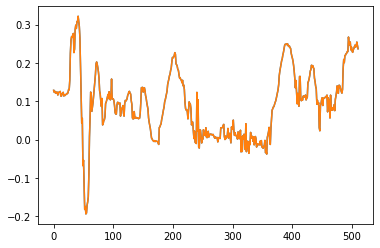

In [17]:
# ----------------------
# Lets run dat sh*t !
# ----------------------

columns = computeUsedColumns()
data = createDataset(columns, moveDetectionDuration = 333333)
plt.plot(data["s01/part1_layout_p02/20151105_192144_00"][0]["ThumbRightLocX"]) # smooth example before
#smoothDataset(data, windowLength = 13, order = 1)
plt.plot(data["s01/part1_layout_p02/20151105_192144_00"][0]["ThumbRightLocX"]) # smooth example after

In [18]:
#Create training and validation sets
xTrain, yTrain, xVal, yVal=createSets(data, 0.9, 70)
del data, columns

Creating training set with 63 files
1. Processing s01/part1_layout_p02/20151105_191251_00..
2. Processing s01/part1_layout_p02/20151105_192144_00..
3. Processing s01/part1_layout_p02/20151105_192312_00..
4. Processing s01/part1_layout_p02/20151105_192407_00..
5. Processing s01/part1_layout_p02/20151105_192610_00..
6. Processing s01/part1_layout_p02/20151105_192717_00..
7. Processing s01/part1_layout_p02/20151105_193157_00..
8. Processing s01/part2_layout_p01/20151105_194301_00..
9. Processing s01/part2_layout_p01/20151105_194456_00..
10. Processing s01/part2_layout_p01/20151105_194650_00..
11. Processing s01/part2_layout_p01/20151105_194955_00..
12. Processing s01/part2_layout_p01/20151105_195111_00..
13. Processing s01/part2_layout_p01/20151105_195450_00..
14. Processing s02/part1_layout_p04/20151106_214357_00..
15. Processing s02/part1_layout_p04/20151106_214521_00..
16. Processing s02/part1_layout_p04/20151106_214647_00..
17. Processing s02/part1_layout_p04/20151106_215028_00..
18. 

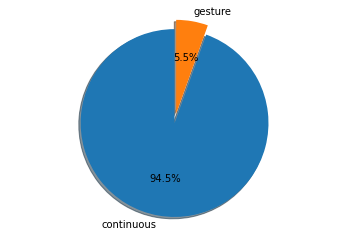

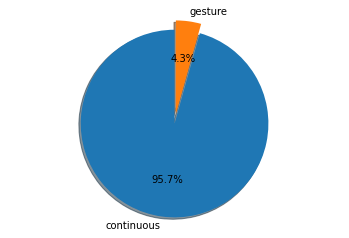

In [19]:
plotRatio(yTrain)
plotRatio(yVal)

In [20]:
xTrain, yTrain=removeSamples(xTrain, yTrain, 50000)

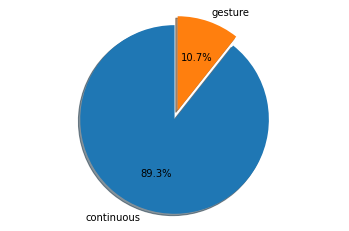

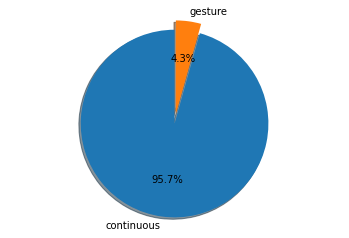

In [21]:
plotRatio(yTrain)
plotRatio(yVal)

In [22]:
xTrain, yTrain=equalizeSamples(xTrain, yTrain, 0.5)
#xVal, yVal=equalizeSamples(xVal, yVal, 0.5)

counting true labels
Found 5616 TRUE samples out of 52662 total samples
Equalizing samples
Samples equalized with 0.5 ratio


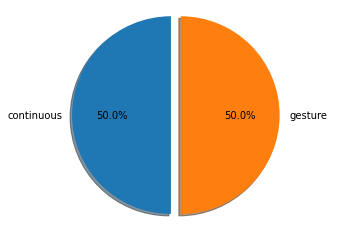

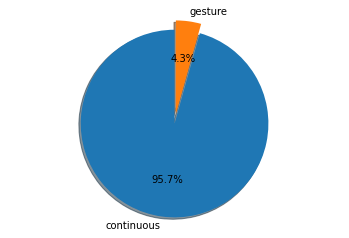

In [23]:
plotRatio(yTrain)
plotRatio(yVal)

In [24]:
shape=(len(xTrain[0]), len(xTrain[0][0]))
#model=createLSTM(100, 1, shape)
model=createModel(cell_type="LSTM", n_layers=100, n_hidden=100, n_fc1=100, n_frames=len(xTrain[0]), skel_dim=len(xTrain[0][0]))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
yTrainBinary=tf.keras.utils.to_categorical(yTrain)
yValBinary=tf.keras.utils.to_categorical(yVal)

#history=trainLSTM(model, 150, 64, xTrain, yTrainBinary, xVal, yValBinary)

In [26]:
#plot_train_history(history, 'Single Step Training and validation loss')

In [27]:
#a=np.array(xVal)

In [28]:
#b=np.array(yVal)

In [29]:
#predictedValues=model.predict(a)

In [30]:
#model=createModel(cell_type="LSTM", n_layers=100, n_hidden=100, n_fc1=100, n_frames=len(xTrain[0]), skel_dim=len(xTrain[0][0]))
from kerastuner import HyperModel


class CNNHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
        
    def build(self, hp):
        model = tf.keras.Sequential()
        model.add(
            tf.keras.layers.LSTM(
                units=hp.Int(
                    'unitsLSTM',
                    min_value=32,
                    max_value=512,
                    step=120,
                    default=128
                ),
                input_shape=self.input_shape
            )
        )
        
        model.add(
            tf.keras.layers.Dense(
                units=hp.Int(
                    'unitsDENSE',
                    min_value=32,
                    max_value=512,
                    step=120,
                    default=128
                )
            )
        )
        model.add(
            tf.keras.layers.Dense(
                units=2
            )
        )
        model.add(
            tf.keras.layers.Softmax()
        )
        
        model.compile(optimizer='adam', loss='categorical_crossentropy')
        
        return model



In [31]:
from kerastuner.tuners import RandomSearch

INPUT_SHAPE = (len(xTrain[0]), len(xTrain[0][0]))
SEED=1

MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 1

hypermodel = CNNHyperModel(input_shape=INPUT_SHAPE)

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    seed=SEED,
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='random_search',
    project_name='psartek'
)

INFO:tensorflow:Reloading Oracle from existing project random_search/psartek/oracle.json
INFO:tensorflow:Reloading Tuner from random_search/psartek/tuner0.json


In [32]:
tuner.search_space_summary()


In [ ]:
N_EPOCH_SEARCH = 40

x_train_single = np.array(xTrain)
y_train_single = np.array(yTrainBinary)
x_val_single = np.array(xVal)
y_val_single = np.array(yValBinary)

tuner.search(x_train_single, y_train_single, epochs=N_EPOCH_SEARCH, validation_data=(x_val_single, y_val_single))

Train on 94092 samples, validate on 23437 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/40


20064/94092 [=====>........................] - ETA: 18:51 - loss: 0.69 - ETA: 7:33 - loss: 0.9185 - ETA: 5:16 - loss: 1.023 - ETA: 4:17 - loss: 0.943 - ETA: 3:45 - loss: 0.889 - ETA: 3:24 - loss: 0.907 - ETA: 3:10 - loss: 0.879 - ETA: 3:00 - loss: 0.860 - ETA: 2:51 - loss: 0.859 - ETA: 2:45 - loss: 0.842 - ETA: 2:40 - loss: 0.827 - ETA: 2:36 - loss: 0.814 - ETA: 2:32 - loss: 0.809 - ETA: 2:29 - loss: 0.802 - ETA: 2:26 - loss: 0.798 - ETA: 2:24 - loss: 0.791 - ETA: 2:22 - loss: 0.785 - ETA: 2:20 - loss: 0.781 - ETA: 2:18 - loss: 0.777 - ETA: 2:17 - loss: 0.774 - ETA: 2:15 - loss: 0.770 - ETA: 2:14 - loss: 0.766 - ETA: 2:13 - loss: 0.763 - ETA: 2:12 - loss: 0.760 - ETA: 2:11 - loss: 0.757 - ETA: 2:10 - loss: 0.754 - ETA: 2:09 - loss: 0.752 - ETA: 2:08 - loss: 0.749 - ETA: 2:08 - loss: 0.747 - ETA: 2:07 - loss: 0.745 - ETA: 2:06 - loss: 0.744 - ETA: 2:06 - loss: 0.742 - ETA: 2:05 - loss: 0.740 - ETA: 2:05 - loss: 0.739 - ETA: 2:04 - loss: 0.737 - ETA: 2:04 - loss: 0.736 - ETA: 2:03 - loss

83360/94092 [=========================>....] - ETA: 38s - loss: 0.69 - ETA: 38s - loss: 0.69 - ETA: 38s - loss: 0.69 - ETA: 38s - loss: 0.69 - ETA: 38s - loss: 0.69 - ETA: 38s - loss: 0.69 - ETA: 38s - loss: 0.69 - ETA: 38s - loss: 0.69 - ETA: 38s - loss: 0.69 - ETA: 38s - loss: 0.69 - ETA: 38s - loss: 0.69 - ETA: 38s - loss: 0.69 - ETA: 38s - loss: 0.69 - ETA: 37s - loss: 0.69 - ETA: 37s - loss: 0.69 - ETA: 37s - loss: 0.69 - ETA: 37s - loss: 0.69 - ETA: 37s - loss: 0.69 - ETA: 37s - loss: 0.69 - ETA: 37s - loss: 0.69 - ETA: 37s - loss: 0.69 - ETA: 37s - loss: 0.69 - ETA: 37s - loss: 0.69 - ETA: 37s - loss: 0.69 - ETA: 37s - loss: 0.69 - ETA: 37s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.69 - ETA: 12s - loss: 0.69 - ETA: 12s - loss: 0.69 - ETA: 12s - loss: 0.69 - ETA: 12s - loss: 0.69 - ETA: 12s - loss: 0.69 - ETA: 12s - loss: 0.69 - ETA: 12s - loss: 0.69 - ETA: 12s - loss: 0.69 - ETA: 12s - loss: 0.69 - ETA: 12s - loss: 0.69 - ETA: 11s - loss: 0.69 - ETA: 11s - loss: 0.69 - ETA: 11s - loss: 0.69 - ETA: 11s - loss: 0.69 - ETA: 11s - loss: 0.69 - ETA: 11s - loss: 0.69 - ETA: 11s - loss: 0.69 - ETA: 11s - loss: 0.69 - ETA: 11s - loss: 0.69 - ETA: 11s - loss: 0.69 - ETA: 11s - loss: 0.69 - ETA: 11s - loss: 0.69 - ETA: 11s - loss: 0.69 - ETA: 10s - loss: 0.69 - ETA: 10s - loss: 0.69 - ETA: 10s - loss: 0.69 - ETA: 10s - loss: 0.69 - ETA: 10s - loss: 0.69 - ETA: 10s - loss: 0.69 - ETA: 10s - loss: 0.69 - ETA: 10s - loss: 0.69 - ETA: 10s - loss: 0.69 - ETA: 10s - loss: 0.69 - ETA: 10s - loss: 0.69 - ETA: 10s - loss: 0.69 - ETA: 10s - loss: 0.69 - ETA: 9s - loss: 0.6907 - ETA: 9s - loss: 0.690 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:00 - loss: 0.677 - ETA: 1:54 - loss: 0.682 - ETA: 1:53 - loss: 0.681 - ETA: 1:52 - loss: 0.681 - ETA: 1:52 - loss: 0.679 - ETA: 1:52 - loss: 0.680 - ETA: 1:51 - loss: 0.684 - ETA: 1:51 - loss: 0.681 - ETA: 1:51 - loss: 0.681 - ETA: 1:51 - loss: 0.683 - ETA: 1:51 - loss: 0.682 - ETA: 1:51 - loss: 0.682 - ETA: 1:51 - loss: 0.682 - ETA: 1:51 - loss: 0.684 - ETA: 1:51 - loss: 0.686 - ETA: 1:51 - loss: 0.686 - ETA: 1:51 - loss: 0.686 - ETA: 1:51 - loss: 0.688 - ETA: 1:51 - loss: 0.688 - ETA: 1:51 - loss: 0.688 - ETA: 1:51 - loss: 0.688 - ETA: 1:50 - loss: 0.688 - ETA: 1:50 - loss: 0.687 - ETA: 1:50 - loss: 0.687 - ETA: 1:50 - loss: 0.687 - ETA: 1:50 - loss: 0.687 - ETA: 1:50 - loss: 0.687 - ETA: 1:50 - loss: 0.687 - ETA: 1:50 - loss: 0.687 - ETA: 1:50 - loss: 0.686 - ETA: 1:49 - loss: 0.686 - ETA: 1:49 - loss: 0.686 - ETA: 1:49 - loss: 0.686 - ETA: 1:49 - loss: 0.686 - ETA: 1:49 - loss: 0.686 - ETA: 1:49 - loss: 0.687 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.68 - ETA: 38s - loss: 0.68 - ETA: 38s - loss: 0.68 - ETA: 38s - loss: 0.68 - ETA: 38s - loss: 0.68 - ETA: 38s - loss: 0.68 - ETA: 38s - loss: 0.68 - ETA: 38s - loss: 0.68 - ETA: 38s - loss: 0.68 - ETA: 37s - loss: 0.68 - ETA: 37s - loss: 0.68 - ETA: 37s - loss: 0.68 - ETA: 37s - loss: 0.68 - ETA: 37s - loss: 0.68 - ETA: 37s - loss: 0.68 - ETA: 37s - loss: 0.68 - ETA: 37s - loss: 0.68 - ETA: 37s - loss: 0.68 - ETA: 37s - loss: 0.68 - ETA: 37s - loss: 0.68 - ETA: 37s - loss: 0.68 - ETA: 37s - loss: 0.68 - ETA: 36s - loss: 0.68 - ETA: 36s - loss: 0.68 - ETA: 36s - loss: 0.68 - ETA: 36s - loss: 0.68 - ETA: 36s - loss: 0.68 - ETA: 36s - loss: 0.68 - ETA: 36s - loss: 0.68 - ETA: 36s - loss: 0.68 - ETA: 36s - loss: 0.68 - ETA: 36s - loss: 0.68 - ETA: 36s - loss: 0.68 - ETA: 36s - loss: 0.68 - ETA: 36s - loss: 0.68 - ETA: 35s - loss: 0.68 - ETA: 35s - loss: 0.68 - ETA: 35s - loss: 0.68 - ETA: 35s - loss: 0.68 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.68 - ETA: 12s - loss: 0.68 - ETA: 12s - loss: 0.68 - ETA: 12s - loss: 0.68 - ETA: 12s - loss: 0.68 - ETA: 12s - loss: 0.68 - ETA: 12s - loss: 0.68 - ETA: 12s - loss: 0.68 - ETA: 12s - loss: 0.68 - ETA: 12s - loss: 0.68 - ETA: 11s - loss: 0.68 - ETA: 11s - loss: 0.68 - ETA: 11s - loss: 0.68 - ETA: 11s - loss: 0.68 - ETA: 11s - loss: 0.68 - ETA: 11s - loss: 0.68 - ETA: 11s - loss: 0.68 - ETA: 11s - loss: 0.68 - ETA: 11s - loss: 0.68 - ETA: 11s - loss: 0.68 - ETA: 11s - loss: 0.68 - ETA: 11s - loss: 0.68 - ETA: 11s - loss: 0.68 - ETA: 10s - loss: 0.68 - ETA: 10s - loss: 0.68 - ETA: 10s - loss: 0.68 - ETA: 10s - loss: 0.68 - ETA: 10s - loss: 0.68 - ETA: 10s - loss: 0.68 - ETA: 10s - loss: 0.68 - ETA: 10s - loss: 0.68 - ETA: 10s - loss: 0.68 - ETA: 10s - loss: 0.68 - ETA: 10s - loss: 0.68 - ETA: 10s - loss: 0.68 - ETA: 10s - loss: 0.68 - ETA: 9s - loss: 0.6823 - ETA: 9s - loss: 0.682 - ETA: 9s - loss: 0.682 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:04 - loss: 0.707 - ETA: 1:56 - loss: 0.722 - ETA: 1:54 - loss: 0.709 - ETA: 1:54 - loss: 0.702 - ETA: 1:53 - loss: 0.693 - ETA: 1:53 - loss: 0.693 - ETA: 1:52 - loss: 0.688 - ETA: 1:52 - loss: 0.687 - ETA: 1:52 - loss: 0.689 - ETA: 1:52 - loss: 0.688 - ETA: 1:52 - loss: 0.684 - ETA: 1:51 - loss: 0.682 - ETA: 1:51 - loss: 0.680 - ETA: 1:51 - loss: 0.679 - ETA: 1:51 - loss: 0.678 - ETA: 1:51 - loss: 0.679 - ETA: 1:51 - loss: 0.679 - ETA: 1:51 - loss: 0.681 - ETA: 1:50 - loss: 0.680 - ETA: 1:50 - loss: 0.679 - ETA: 1:50 - loss: 0.680 - ETA: 1:50 - loss: 0.680 - ETA: 1:50 - loss: 0.680 - ETA: 1:50 - loss: 0.680 - ETA: 1:50 - loss: 0.680 - ETA: 1:50 - loss: 0.680 - ETA: 1:50 - loss: 0.680 - ETA: 1:49 - loss: 0.679 - ETA: 1:49 - loss: 0.678 - ETA: 1:49 - loss: 0.679 - ETA: 1:49 - loss: 0.678 - ETA: 1:49 - loss: 0.678 - ETA: 1:49 - loss: 0.678 - ETA: 1:49 - loss: 0.678 - ETA: 1:49 - loss: 0.679 - ETA: 1:49 - loss: 0.678 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.66 - ETA: 38s - loss: 0.66 - ETA: 38s - loss: 0.66 - ETA: 38s - loss: 0.66 - ETA: 38s - loss: 0.66 - ETA: 38s - loss: 0.66 - ETA: 38s - loss: 0.66 - ETA: 38s - loss: 0.66 - ETA: 37s - loss: 0.66 - ETA: 37s - loss: 0.66 - ETA: 37s - loss: 0.66 - ETA: 37s - loss: 0.66 - ETA: 37s - loss: 0.66 - ETA: 37s - loss: 0.66 - ETA: 37s - loss: 0.66 - ETA: 37s - loss: 0.66 - ETA: 37s - loss: 0.66 - ETA: 37s - loss: 0.66 - ETA: 37s - loss: 0.66 - ETA: 37s - loss: 0.66 - ETA: 37s - loss: 0.66 - ETA: 36s - loss: 0.66 - ETA: 36s - loss: 0.66 - ETA: 36s - loss: 0.66 - ETA: 36s - loss: 0.66 - ETA: 36s - loss: 0.66 - ETA: 36s - loss: 0.66 - ETA: 36s - loss: 0.66 - ETA: 36s - loss: 0.66 - ETA: 36s - loss: 0.66 - ETA: 36s - loss: 0.66 - ETA: 36s - loss: 0.66 - ETA: 36s - loss: 0.66 - ETA: 36s - loss: 0.66 - ETA: 35s - loss: 0.66 - ETA: 35s - loss: 0.66 - ETA: 35s - loss: 0.66 - ETA: 35s - loss: 0.66 - ETA: 35s - loss: 0.66 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.66 - ETA: 12s - loss: 0.66 - ETA: 12s - loss: 0.66 - ETA: 12s - loss: 0.66 - ETA: 12s - loss: 0.66 - ETA: 12s - loss: 0.66 - ETA: 12s - loss: 0.66 - ETA: 12s - loss: 0.66 - ETA: 12s - loss: 0.66 - ETA: 12s - loss: 0.66 - ETA: 11s - loss: 0.66 - ETA: 11s - loss: 0.66 - ETA: 11s - loss: 0.66 - ETA: 11s - loss: 0.66 - ETA: 11s - loss: 0.66 - ETA: 11s - loss: 0.66 - ETA: 11s - loss: 0.66 - ETA: 11s - loss: 0.66 - ETA: 11s - loss: 0.66 - ETA: 11s - loss: 0.66 - ETA: 11s - loss: 0.66 - ETA: 11s - loss: 0.66 - ETA: 11s - loss: 0.66 - ETA: 10s - loss: 0.66 - ETA: 10s - loss: 0.66 - ETA: 10s - loss: 0.66 - ETA: 10s - loss: 0.66 - ETA: 10s - loss: 0.66 - ETA: 10s - loss: 0.66 - ETA: 10s - loss: 0.66 - ETA: 10s - loss: 0.66 - ETA: 10s - loss: 0.66 - ETA: 10s - loss: 0.66 - ETA: 10s - loss: 0.66 - ETA: 10s - loss: 0.66 - ETA: 10s - loss: 0.66 - ETA: 9s - loss: 0.6651 - ETA: 9s - loss: 0.665 - ETA: 9s - loss: 0.665 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:00 - loss: 0.607 - ETA: 1:54 - loss: 0.627 - ETA: 1:53 - loss: 0.641 - ETA: 1:52 - loss: 0.633 - ETA: 1:52 - loss: 0.630 - ETA: 1:52 - loss: 0.634 - ETA: 1:51 - loss: 0.636 - ETA: 1:51 - loss: 0.639 - ETA: 1:51 - loss: 0.646 - ETA: 1:51 - loss: 0.648 - ETA: 1:52 - loss: 0.643 - ETA: 1:52 - loss: 0.644 - ETA: 1:52 - loss: 0.643 - ETA: 1:51 - loss: 0.644 - ETA: 1:51 - loss: 0.642 - ETA: 1:51 - loss: 0.642 - ETA: 1:51 - loss: 0.638 - ETA: 1:51 - loss: 0.635 - ETA: 1:51 - loss: 0.641 - ETA: 1:51 - loss: 0.641 - ETA: 1:51 - loss: 0.640 - ETA: 1:51 - loss: 0.642 - ETA: 1:50 - loss: 0.642 - ETA: 1:50 - loss: 0.643 - ETA: 1:50 - loss: 0.645 - ETA: 1:50 - loss: 0.644 - ETA: 1:50 - loss: 0.646 - ETA: 1:50 - loss: 0.646 - ETA: 1:50 - loss: 0.647 - ETA: 1:50 - loss: 0.646 - ETA: 1:50 - loss: 0.643 - ETA: 1:50 - loss: 0.642 - ETA: 1:50 - loss: 0.642 - ETA: 1:50 - loss: 0.642 - ETA: 1:49 - loss: 0.641 - ETA: 1:49 - loss: 0.640 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.63 - ETA: 38s - loss: 0.63 - ETA: 38s - loss: 0.63 - ETA: 38s - loss: 0.63 - ETA: 38s - loss: 0.63 - ETA: 38s - loss: 0.63 - ETA: 38s - loss: 0.63 - ETA: 38s - loss: 0.63 - ETA: 38s - loss: 0.63 - ETA: 37s - loss: 0.63 - ETA: 37s - loss: 0.63 - ETA: 37s - loss: 0.63 - ETA: 37s - loss: 0.63 - ETA: 37s - loss: 0.63 - ETA: 37s - loss: 0.63 - ETA: 37s - loss: 0.63 - ETA: 37s - loss: 0.63 - ETA: 37s - loss: 0.63 - ETA: 37s - loss: 0.63 - ETA: 37s - loss: 0.63 - ETA: 37s - loss: 0.63 - ETA: 37s - loss: 0.63 - ETA: 36s - loss: 0.63 - ETA: 36s - loss: 0.63 - ETA: 36s - loss: 0.63 - ETA: 36s - loss: 0.63 - ETA: 36s - loss: 0.63 - ETA: 36s - loss: 0.63 - ETA: 36s - loss: 0.63 - ETA: 36s - loss: 0.63 - ETA: 36s - loss: 0.63 - ETA: 36s - loss: 0.63 - ETA: 36s - loss: 0.63 - ETA: 36s - loss: 0.63 - ETA: 36s - loss: 0.63 - ETA: 35s - loss: 0.63 - ETA: 35s - loss: 0.63 - ETA: 35s - loss: 0.63 - ETA: 35s - loss: 0.63 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.63 - ETA: 12s - loss: 0.63 - ETA: 12s - loss: 0.63 - ETA: 12s - loss: 0.63 - ETA: 12s - loss: 0.63 - ETA: 12s - loss: 0.63 - ETA: 12s - loss: 0.63 - ETA: 12s - loss: 0.63 - ETA: 12s - loss: 0.63 - ETA: 12s - loss: 0.63 - ETA: 11s - loss: 0.63 - ETA: 11s - loss: 0.63 - ETA: 11s - loss: 0.63 - ETA: 11s - loss: 0.63 - ETA: 11s - loss: 0.63 - ETA: 11s - loss: 0.63 - ETA: 11s - loss: 0.63 - ETA: 11s - loss: 0.63 - ETA: 11s - loss: 0.63 - ETA: 11s - loss: 0.63 - ETA: 11s - loss: 0.63 - ETA: 11s - loss: 0.63 - ETA: 11s - loss: 0.63 - ETA: 10s - loss: 0.63 - ETA: 10s - loss: 0.63 - ETA: 10s - loss: 0.63 - ETA: 10s - loss: 0.63 - ETA: 10s - loss: 0.63 - ETA: 10s - loss: 0.63 - ETA: 10s - loss: 0.63 - ETA: 10s - loss: 0.63 - ETA: 10s - loss: 0.63 - ETA: 10s - loss: 0.63 - ETA: 10s - loss: 0.63 - ETA: 10s - loss: 0.63 - ETA: 10s - loss: 0.63 - ETA: 9s - loss: 0.6320 - ETA: 9s - loss: 0.632 - ETA: 9s - loss: 0.631 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:00 - loss: 0.584 - ETA: 1:53 - loss: 0.566 - ETA: 1:53 - loss: 0.598 - ETA: 1:52 - loss: 0.589 - ETA: 1:52 - loss: 0.583 - ETA: 1:50 - loss: 0.586 - ETA: 1:50 - loss: 0.588 - ETA: 1:50 - loss: 0.594 - ETA: 1:50 - loss: 0.589 - ETA: 1:50 - loss: 0.589 - ETA: 1:51 - loss: 0.592 - ETA: 1:50 - loss: 0.596 - ETA: 1:50 - loss: 0.598 - ETA: 1:50 - loss: 0.594 - ETA: 1:50 - loss: 0.595 - ETA: 1:50 - loss: 0.597 - ETA: 1:50 - loss: 0.593 - ETA: 1:50 - loss: 0.593 - ETA: 1:50 - loss: 0.593 - ETA: 1:50 - loss: 0.591 - ETA: 1:50 - loss: 0.593 - ETA: 1:50 - loss: 0.596 - ETA: 1:50 - loss: 0.600 - ETA: 1:50 - loss: 0.600 - ETA: 1:50 - loss: 0.600 - ETA: 1:50 - loss: 0.597 - ETA: 1:49 - loss: 0.597 - ETA: 1:49 - loss: 0.594 - ETA: 1:49 - loss: 0.594 - ETA: 1:49 - loss: 0.594 - ETA: 1:49 - loss: 0.594 - ETA: 1:49 - loss: 0.594 - ETA: 1:49 - loss: 0.599 - ETA: 1:49 - loss: 0.596 - ETA: 1:49 - loss: 0.597 - ETA: 1:49 - loss: 0.600 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.58 - ETA: 38s - loss: 0.58 - ETA: 38s - loss: 0.58 - ETA: 38s - loss: 0.58 - ETA: 38s - loss: 0.58 - ETA: 38s - loss: 0.58 - ETA: 38s - loss: 0.58 - ETA: 38s - loss: 0.58 - ETA: 37s - loss: 0.58 - ETA: 37s - loss: 0.58 - ETA: 37s - loss: 0.58 - ETA: 37s - loss: 0.58 - ETA: 37s - loss: 0.58 - ETA: 37s - loss: 0.58 - ETA: 37s - loss: 0.58 - ETA: 37s - loss: 0.58 - ETA: 37s - loss: 0.58 - ETA: 37s - loss: 0.58 - ETA: 37s - loss: 0.58 - ETA: 37s - loss: 0.58 - ETA: 37s - loss: 0.58 - ETA: 36s - loss: 0.58 - ETA: 36s - loss: 0.58 - ETA: 36s - loss: 0.58 - ETA: 36s - loss: 0.58 - ETA: 36s - loss: 0.58 - ETA: 36s - loss: 0.58 - ETA: 36s - loss: 0.58 - ETA: 36s - loss: 0.58 - ETA: 36s - loss: 0.58 - ETA: 36s - loss: 0.58 - ETA: 36s - loss: 0.58 - ETA: 36s - loss: 0.58 - ETA: 36s - loss: 0.58 - ETA: 35s - loss: 0.58 - ETA: 35s - loss: 0.58 - ETA: 35s - loss: 0.58 - ETA: 35s - loss: 0.58 - ETA: 35s - loss: 0.58 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.58 - ETA: 12s - loss: 0.58 - ETA: 12s - loss: 0.58 - ETA: 12s - loss: 0.58 - ETA: 12s - loss: 0.58 - ETA: 12s - loss: 0.58 - ETA: 12s - loss: 0.58 - ETA: 12s - loss: 0.58 - ETA: 12s - loss: 0.58 - ETA: 12s - loss: 0.58 - ETA: 11s - loss: 0.58 - ETA: 11s - loss: 0.58 - ETA: 11s - loss: 0.58 - ETA: 11s - loss: 0.58 - ETA: 11s - loss: 0.58 - ETA: 11s - loss: 0.58 - ETA: 11s - loss: 0.58 - ETA: 11s - loss: 0.58 - ETA: 11s - loss: 0.58 - ETA: 11s - loss: 0.58 - ETA: 11s - loss: 0.58 - ETA: 11s - loss: 0.58 - ETA: 11s - loss: 0.58 - ETA: 10s - loss: 0.58 - ETA: 10s - loss: 0.58 - ETA: 10s - loss: 0.58 - ETA: 10s - loss: 0.58 - ETA: 10s - loss: 0.58 - ETA: 10s - loss: 0.58 - ETA: 10s - loss: 0.58 - ETA: 10s - loss: 0.58 - ETA: 10s - loss: 0.58 - ETA: 10s - loss: 0.58 - ETA: 10s - loss: 0.58 - ETA: 10s - loss: 0.58 - ETA: 10s - loss: 0.58 - ETA: 9s - loss: 0.5833 - ETA: 9s - loss: 0.583 - ETA: 9s - loss: 0.583 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 1:59 - loss: 0.701 - ETA: 1:54 - loss: 0.619 - ETA: 1:54 - loss: 0.576 - ETA: 1:53 - loss: 0.567 - ETA: 1:53 - loss: 0.580 - ETA: 1:52 - loss: 0.572 - ETA: 1:52 - loss: 0.563 - ETA: 1:52 - loss: 0.556 - ETA: 1:51 - loss: 0.556 - ETA: 1:51 - loss: 0.548 - ETA: 1:51 - loss: 0.550 - ETA: 1:51 - loss: 0.556 - ETA: 1:51 - loss: 0.556 - ETA: 1:51 - loss: 0.554 - ETA: 1:51 - loss: 0.556 - ETA: 1:51 - loss: 0.558 - ETA: 1:51 - loss: 0.558 - ETA: 1:50 - loss: 0.558 - ETA: 1:50 - loss: 0.558 - ETA: 1:50 - loss: 0.559 - ETA: 1:50 - loss: 0.561 - ETA: 1:50 - loss: 0.560 - ETA: 1:50 - loss: 0.560 - ETA: 1:50 - loss: 0.560 - ETA: 1:50 - loss: 0.558 - ETA: 1:50 - loss: 0.558 - ETA: 1:50 - loss: 0.555 - ETA: 1:50 - loss: 0.554 - ETA: 1:50 - loss: 0.556 - ETA: 1:49 - loss: 0.557 - ETA: 1:49 - loss: 0.556 - ETA: 1:49 - loss: 0.554 - ETA: 1:49 - loss: 0.554 - ETA: 1:49 - loss: 0.553 - ETA: 1:49 - loss: 0.552 - ETA: 1:49 - loss: 0.552 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.53 - ETA: 38s - loss: 0.53 - ETA: 38s - loss: 0.53 - ETA: 38s - loss: 0.53 - ETA: 38s - loss: 0.53 - ETA: 38s - loss: 0.53 - ETA: 38s - loss: 0.53 - ETA: 38s - loss: 0.53 - ETA: 37s - loss: 0.53 - ETA: 37s - loss: 0.53 - ETA: 37s - loss: 0.53 - ETA: 37s - loss: 0.53 - ETA: 37s - loss: 0.53 - ETA: 37s - loss: 0.53 - ETA: 37s - loss: 0.53 - ETA: 37s - loss: 0.53 - ETA: 37s - loss: 0.53 - ETA: 37s - loss: 0.53 - ETA: 37s - loss: 0.53 - ETA: 37s - loss: 0.53 - ETA: 37s - loss: 0.53 - ETA: 36s - loss: 0.53 - ETA: 36s - loss: 0.53 - ETA: 36s - loss: 0.53 - ETA: 36s - loss: 0.53 - ETA: 36s - loss: 0.53 - ETA: 36s - loss: 0.53 - ETA: 36s - loss: 0.53 - ETA: 36s - loss: 0.53 - ETA: 36s - loss: 0.53 - ETA: 36s - loss: 0.53 - ETA: 36s - loss: 0.53 - ETA: 36s - loss: 0.53 - ETA: 36s - loss: 0.53 - ETA: 35s - loss: 0.53 - ETA: 35s - loss: 0.53 - ETA: 35s - loss: 0.53 - ETA: 35s - loss: 0.53 - ETA: 35s - loss: 0.53 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.52 - ETA: 12s - loss: 0.52 - ETA: 12s - loss: 0.52 - ETA: 12s - loss: 0.52 - ETA: 12s - loss: 0.52 - ETA: 12s - loss: 0.52 - ETA: 12s - loss: 0.52 - ETA: 12s - loss: 0.52 - ETA: 12s - loss: 0.52 - ETA: 11s - loss: 0.52 - ETA: 11s - loss: 0.52 - ETA: 11s - loss: 0.52 - ETA: 11s - loss: 0.52 - ETA: 11s - loss: 0.52 - ETA: 11s - loss: 0.52 - ETA: 11s - loss: 0.52 - ETA: 11s - loss: 0.52 - ETA: 11s - loss: 0.52 - ETA: 11s - loss: 0.52 - ETA: 11s - loss: 0.52 - ETA: 11s - loss: 0.52 - ETA: 11s - loss: 0.52 - ETA: 11s - loss: 0.52 - ETA: 10s - loss: 0.52 - ETA: 10s - loss: 0.52 - ETA: 10s - loss: 0.52 - ETA: 10s - loss: 0.52 - ETA: 10s - loss: 0.52 - ETA: 10s - loss: 0.52 - ETA: 10s - loss: 0.52 - ETA: 10s - loss: 0.52 - ETA: 10s - loss: 0.52 - ETA: 10s - loss: 0.52 - ETA: 10s - loss: 0.52 - ETA: 10s - loss: 0.52 - ETA: 10s - loss: 0.52 - ETA: 9s - loss: 0.5272 - ETA: 9s - loss: 0.527 - ETA: 9s - loss: 0.527 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:00 - loss: 0.791 - ETA: 1:55 - loss: 0.557 - ETA: 1:52 - loss: 0.498 - ETA: 1:52 - loss: 0.499 - ETA: 1:53 - loss: 0.484 - ETA: 1:52 - loss: 0.497 - ETA: 1:52 - loss: 0.489 - ETA: 1:52 - loss: 0.498 - ETA: 1:52 - loss: 0.512 - ETA: 1:52 - loss: 0.499 - ETA: 1:52 - loss: 0.502 - ETA: 1:51 - loss: 0.493 - ETA: 1:51 - loss: 0.489 - ETA: 1:51 - loss: 0.485 - ETA: 1:51 - loss: 0.480 - ETA: 1:51 - loss: 0.478 - ETA: 1:51 - loss: 0.480 - ETA: 1:51 - loss: 0.476 - ETA: 1:50 - loss: 0.479 - ETA: 1:50 - loss: 0.475 - ETA: 1:50 - loss: 0.474 - ETA: 1:50 - loss: 0.473 - ETA: 1:50 - loss: 0.475 - ETA: 1:50 - loss: 0.477 - ETA: 1:50 - loss: 0.481 - ETA: 1:50 - loss: 0.480 - ETA: 1:50 - loss: 0.480 - ETA: 1:50 - loss: 0.481 - ETA: 1:49 - loss: 0.487 - ETA: 1:49 - loss: 0.487 - ETA: 1:50 - loss: 0.484 - ETA: 1:49 - loss: 0.485 - ETA: 1:49 - loss: 0.483 - ETA: 1:49 - loss: 0.484 - ETA: 1:49 - loss: 0.485 - ETA: 1:49 - loss: 0.483 - ETA: 1:49 - loss:

83168/94092 [=========================>....] - ETA: 41s - loss: 0.47 - ETA: 40s - loss: 0.47 - ETA: 40s - loss: 0.47 - ETA: 40s - loss: 0.47 - ETA: 40s - loss: 0.47 - ETA: 40s - loss: 0.47 - ETA: 40s - loss: 0.47 - ETA: 40s - loss: 0.47 - ETA: 40s - loss: 0.47 - ETA: 40s - loss: 0.47 - ETA: 40s - loss: 0.47 - ETA: 40s - loss: 0.47 - ETA: 40s - loss: 0.47 - ETA: 39s - loss: 0.47 - ETA: 39s - loss: 0.47 - ETA: 39s - loss: 0.47 - ETA: 39s - loss: 0.47 - ETA: 39s - loss: 0.47 - ETA: 39s - loss: 0.47 - ETA: 39s - loss: 0.47 - ETA: 39s - loss: 0.47 - ETA: 39s - loss: 0.47 - ETA: 39s - loss: 0.47 - ETA: 39s - loss: 0.47 - ETA: 39s - loss: 0.47 - ETA: 39s - loss: 0.47 - ETA: 38s - loss: 0.47 - ETA: 38s - loss: 0.47 - ETA: 38s - loss: 0.47 - ETA: 38s - loss: 0.47 - ETA: 38s - loss: 0.47 - ETA: 38s - loss: 0.47 - ETA: 38s - loss: 0.47 - ETA: 38s - loss: 0.47 - ETA: 38s - loss: 0.47 - ETA: 38s - loss: 0.47 - ETA: 38s - loss: 0.47 - ETA: 38s - loss: 0.47 - ETA: 37s - loss: 0.47 - ETA: 37s - loss: 

94092/94092 [==============================] - ETA: 13s - loss: 0.47 - ETA: 13s - loss: 0.47 - ETA: 13s - loss: 0.47 - ETA: 13s - loss: 0.47 - ETA: 13s - loss: 0.47 - ETA: 13s - loss: 0.47 - ETA: 13s - loss: 0.47 - ETA: 13s - loss: 0.47 - ETA: 13s - loss: 0.47 - ETA: 13s - loss: 0.47 - ETA: 12s - loss: 0.47 - ETA: 12s - loss: 0.47 - ETA: 12s - loss: 0.47 - ETA: 12s - loss: 0.47 - ETA: 12s - loss: 0.47 - ETA: 12s - loss: 0.47 - ETA: 12s - loss: 0.47 - ETA: 12s - loss: 0.47 - ETA: 12s - loss: 0.47 - ETA: 12s - loss: 0.47 - ETA: 12s - loss: 0.47 - ETA: 12s - loss: 0.47 - ETA: 11s - loss: 0.47 - ETA: 11s - loss: 0.47 - ETA: 11s - loss: 0.47 - ETA: 11s - loss: 0.47 - ETA: 11s - loss: 0.47 - ETA: 11s - loss: 0.47 - ETA: 11s - loss: 0.47 - ETA: 11s - loss: 0.47 - ETA: 11s - loss: 0.47 - ETA: 11s - loss: 0.47 - ETA: 11s - loss: 0.47 - ETA: 11s - loss: 0.47 - ETA: 10s - loss: 0.47 - ETA: 10s - loss: 0.47 - ETA: 10s - loss: 0.47 - ETA: 10s - loss: 0.47 - ETA: 10s - loss: 0.47 - ETA: 10s - loss: 

20064/94092 [=====>........................] - ETA: 2:16 - loss: 0.379 - ETA: 2:08 - loss: 0.367 - ETA: 2:07 - loss: 0.433 - ETA: 2:06 - loss: 0.465 - ETA: 2:06 - loss: 0.468 - ETA: 2:06 - loss: 0.457 - ETA: 2:05 - loss: 0.454 - ETA: 2:04 - loss: 0.447 - ETA: 2:04 - loss: 0.435 - ETA: 2:04 - loss: 0.430 - ETA: 2:04 - loss: 0.430 - ETA: 2:03 - loss: 0.425 - ETA: 2:03 - loss: 0.427 - ETA: 2:03 - loss: 0.428 - ETA: 2:02 - loss: 0.428 - ETA: 2:02 - loss: 0.427 - ETA: 2:02 - loss: 0.426 - ETA: 2:02 - loss: 0.428 - ETA: 2:01 - loss: 0.427 - ETA: 2:01 - loss: 0.424 - ETA: 2:01 - loss: 0.421 - ETA: 2:01 - loss: 0.418 - ETA: 2:01 - loss: 0.418 - ETA: 2:01 - loss: 0.417 - ETA: 2:01 - loss: 0.414 - ETA: 2:01 - loss: 0.413 - ETA: 2:01 - loss: 0.413 - ETA: 2:00 - loss: 0.413 - ETA: 2:00 - loss: 0.413 - ETA: 2:00 - loss: 0.414 - ETA: 2:00 - loss: 0.414 - ETA: 2:00 - loss: 0.411 - ETA: 1:59 - loss: 0.412 - ETA: 1:59 - loss: 0.410 - ETA: 1:59 - loss: 0.413 - ETA: 1:59 - loss: 0.414 - ETA: 1:59 - loss:

83008/94092 [=========================>....] - ETA: 42s - loss: 0.42 - ETA: 42s - loss: 0.42 - ETA: 42s - loss: 0.42 - ETA: 42s - loss: 0.42 - ETA: 42s - loss: 0.42 - ETA: 42s - loss: 0.42 - ETA: 42s - loss: 0.42 - ETA: 41s - loss: 0.42 - ETA: 41s - loss: 0.42 - ETA: 41s - loss: 0.42 - ETA: 41s - loss: 0.42 - ETA: 41s - loss: 0.42 - ETA: 41s - loss: 0.42 - ETA: 41s - loss: 0.42 - ETA: 41s - loss: 0.42 - ETA: 41s - loss: 0.42 - ETA: 41s - loss: 0.42 - ETA: 41s - loss: 0.42 - ETA: 41s - loss: 0.42 - ETA: 40s - loss: 0.42 - ETA: 40s - loss: 0.42 - ETA: 40s - loss: 0.42 - ETA: 40s - loss: 0.42 - ETA: 40s - loss: 0.42 - ETA: 40s - loss: 0.42 - ETA: 40s - loss: 0.42 - ETA: 40s - loss: 0.42 - ETA: 40s - loss: 0.42 - ETA: 40s - loss: 0.42 - ETA: 40s - loss: 0.42 - ETA: 40s - loss: 0.42 - ETA: 39s - loss: 0.42 - ETA: 39s - loss: 0.42 - ETA: 39s - loss: 0.42 - ETA: 39s - loss: 0.42 - ETA: 39s - loss: 0.42 - ETA: 39s - loss: 0.42 - ETA: 39s - loss: 0.42 - ETA: 39s - loss: 0.42 - ETA: 39s - loss: 

94092/94092 [==============================] - ETA: 14s - loss: 0.41 - ETA: 14s - loss: 0.41 - ETA: 14s - loss: 0.41 - ETA: 14s - loss: 0.41 - ETA: 13s - loss: 0.41 - ETA: 13s - loss: 0.41 - ETA: 13s - loss: 0.41 - ETA: 13s - loss: 0.41 - ETA: 13s - loss: 0.41 - ETA: 13s - loss: 0.41 - ETA: 13s - loss: 0.41 - ETA: 13s - loss: 0.41 - ETA: 13s - loss: 0.41 - ETA: 13s - loss: 0.41 - ETA: 13s - loss: 0.41 - ETA: 13s - loss: 0.41 - ETA: 12s - loss: 0.41 - ETA: 12s - loss: 0.41 - ETA: 12s - loss: 0.41 - ETA: 12s - loss: 0.41 - ETA: 12s - loss: 0.41 - ETA: 12s - loss: 0.41 - ETA: 12s - loss: 0.41 - ETA: 12s - loss: 0.41 - ETA: 12s - loss: 0.41 - ETA: 12s - loss: 0.41 - ETA: 12s - loss: 0.41 - ETA: 12s - loss: 0.41 - ETA: 11s - loss: 0.41 - ETA: 11s - loss: 0.41 - ETA: 11s - loss: 0.41 - ETA: 11s - loss: 0.41 - ETA: 11s - loss: 0.41 - ETA: 11s - loss: 0.41 - ETA: 11s - loss: 0.41 - ETA: 11s - loss: 0.41 - ETA: 11s - loss: 0.41 - ETA: 11s - loss: 0.41 - ETA: 11s - loss: 0.41 - ETA: 11s - loss: 

20064/94092 [=====>........................] - ETA: 2:16 - loss: 0.190 - ETA: 2:08 - loss: 0.337 - ETA: 2:07 - loss: 0.381 - ETA: 2:05 - loss: 0.366 - ETA: 2:05 - loss: 0.348 - ETA: 2:06 - loss: 0.362 - ETA: 2:05 - loss: 0.365 - ETA: 2:04 - loss: 0.389 - ETA: 2:04 - loss: 0.382 - ETA: 2:03 - loss: 0.377 - ETA: 2:03 - loss: 0.371 - ETA: 2:02 - loss: 0.377 - ETA: 2:02 - loss: 0.372 - ETA: 2:02 - loss: 0.378 - ETA: 2:02 - loss: 0.384 - ETA: 2:02 - loss: 0.382 - ETA: 2:02 - loss: 0.382 - ETA: 2:01 - loss: 0.380 - ETA: 2:01 - loss: 0.381 - ETA: 2:01 - loss: 0.386 - ETA: 2:01 - loss: 0.390 - ETA: 2:00 - loss: 0.392 - ETA: 2:00 - loss: 0.390 - ETA: 2:00 - loss: 0.393 - ETA: 2:00 - loss: 0.391 - ETA: 2:00 - loss: 0.389 - ETA: 2:00 - loss: 0.389 - ETA: 2:00 - loss: 0.386 - ETA: 2:00 - loss: 0.383 - ETA: 2:00 - loss: 0.382 - ETA: 2:00 - loss: 0.383 - ETA: 2:00 - loss: 0.385 - ETA: 2:00 - loss: 0.383 - ETA: 2:00 - loss: 0.389 - ETA: 2:00 - loss: 0.391 - ETA: 1:59 - loss: 0.389 - ETA: 1:59 - loss:

83040/94092 [=========================>....] - ETA: 42s - loss: 0.37 - ETA: 42s - loss: 0.37 - ETA: 42s - loss: 0.37 - ETA: 42s - loss: 0.37 - ETA: 42s - loss: 0.37 - ETA: 42s - loss: 0.37 - ETA: 41s - loss: 0.37 - ETA: 41s - loss: 0.37 - ETA: 41s - loss: 0.37 - ETA: 41s - loss: 0.37 - ETA: 41s - loss: 0.37 - ETA: 41s - loss: 0.37 - ETA: 41s - loss: 0.37 - ETA: 41s - loss: 0.37 - ETA: 41s - loss: 0.37 - ETA: 41s - loss: 0.37 - ETA: 41s - loss: 0.37 - ETA: 41s - loss: 0.37 - ETA: 40s - loss: 0.37 - ETA: 40s - loss: 0.37 - ETA: 40s - loss: 0.37 - ETA: 40s - loss: 0.37 - ETA: 40s - loss: 0.37 - ETA: 40s - loss: 0.37 - ETA: 40s - loss: 0.37 - ETA: 40s - loss: 0.37 - ETA: 40s - loss: 0.37 - ETA: 40s - loss: 0.37 - ETA: 40s - loss: 0.37 - ETA: 40s - loss: 0.37 - ETA: 39s - loss: 0.37 - ETA: 39s - loss: 0.37 - ETA: 39s - loss: 0.37 - ETA: 39s - loss: 0.37 - ETA: 39s - loss: 0.37 - ETA: 39s - loss: 0.37 - ETA: 39s - loss: 0.37 - ETA: 39s - loss: 0.37 - ETA: 39s - loss: 0.37 - ETA: 39s - loss: 

94092/94092 [==============================] - ETA: 14s - loss: 0.37 - ETA: 14s - loss: 0.37 - ETA: 14s - loss: 0.37 - ETA: 14s - loss: 0.37 - ETA: 13s - loss: 0.37 - ETA: 13s - loss: 0.37 - ETA: 13s - loss: 0.37 - ETA: 13s - loss: 0.37 - ETA: 13s - loss: 0.37 - ETA: 13s - loss: 0.37 - ETA: 13s - loss: 0.37 - ETA: 13s - loss: 0.37 - ETA: 13s - loss: 0.37 - ETA: 13s - loss: 0.37 - ETA: 13s - loss: 0.37 - ETA: 13s - loss: 0.37 - ETA: 12s - loss: 0.37 - ETA: 12s - loss: 0.37 - ETA: 12s - loss: 0.37 - ETA: 12s - loss: 0.37 - ETA: 12s - loss: 0.37 - ETA: 12s - loss: 0.37 - ETA: 12s - loss: 0.37 - ETA: 12s - loss: 0.37 - ETA: 12s - loss: 0.37 - ETA: 12s - loss: 0.37 - ETA: 12s - loss: 0.37 - ETA: 12s - loss: 0.37 - ETA: 11s - loss: 0.37 - ETA: 11s - loss: 0.37 - ETA: 11s - loss: 0.37 - ETA: 11s - loss: 0.37 - ETA: 11s - loss: 0.37 - ETA: 11s - loss: 0.37 - ETA: 11s - loss: 0.37 - ETA: 11s - loss: 0.37 - ETA: 11s - loss: 0.37 - ETA: 11s - loss: 0.37 - ETA: 11s - loss: 0.37 - ETA: 11s - loss: 

20064/94092 [=====>........................] - ETA: 2:15 - loss: 0.426 - ETA: 2:09 - loss: 0.335 - ETA: 2:08 - loss: 0.320 - ETA: 2:05 - loss: 0.343 - ETA: 2:04 - loss: 0.360 - ETA: 2:03 - loss: 0.373 - ETA: 2:03 - loss: 0.368 - ETA: 2:03 - loss: 0.362 - ETA: 2:03 - loss: 0.363 - ETA: 2:03 - loss: 0.364 - ETA: 2:02 - loss: 0.353 - ETA: 2:02 - loss: 0.349 - ETA: 2:02 - loss: 0.345 - ETA: 2:01 - loss: 0.337 - ETA: 2:01 - loss: 0.342 - ETA: 2:01 - loss: 0.350 - ETA: 2:01 - loss: 0.355 - ETA: 2:01 - loss: 0.356 - ETA: 2:01 - loss: 0.361 - ETA: 2:01 - loss: 0.362 - ETA: 2:01 - loss: 0.359 - ETA: 2:01 - loss: 0.363 - ETA: 2:01 - loss: 0.366 - ETA: 2:01 - loss: 0.364 - ETA: 2:01 - loss: 0.359 - ETA: 2:01 - loss: 0.356 - ETA: 2:01 - loss: 0.350 - ETA: 2:01 - loss: 0.351 - ETA: 2:01 - loss: 0.350 - ETA: 2:01 - loss: 0.348 - ETA: 2:00 - loss: 0.347 - ETA: 2:01 - loss: 0.345 - ETA: 2:00 - loss: 0.344 - ETA: 2:00 - loss: 0.341 - ETA: 2:00 - loss: 0.344 - ETA: 2:00 - loss: 0.345 - ETA: 2:00 - loss:

83040/94092 [=========================>....] - ETA: 42s - loss: 0.33 - ETA: 42s - loss: 0.33 - ETA: 42s - loss: 0.33 - ETA: 42s - loss: 0.33 - ETA: 42s - loss: 0.33 - ETA: 42s - loss: 0.33 - ETA: 42s - loss: 0.33 - ETA: 41s - loss: 0.33 - ETA: 41s - loss: 0.33 - ETA: 41s - loss: 0.33 - ETA: 41s - loss: 0.33 - ETA: 41s - loss: 0.33 - ETA: 41s - loss: 0.33 - ETA: 41s - loss: 0.33 - ETA: 41s - loss: 0.33 - ETA: 41s - loss: 0.33 - ETA: 41s - loss: 0.33 - ETA: 41s - loss: 0.33 - ETA: 41s - loss: 0.33 - ETA: 40s - loss: 0.33 - ETA: 40s - loss: 0.33 - ETA: 40s - loss: 0.33 - ETA: 40s - loss: 0.33 - ETA: 40s - loss: 0.33 - ETA: 40s - loss: 0.33 - ETA: 40s - loss: 0.33 - ETA: 40s - loss: 0.33 - ETA: 40s - loss: 0.33 - ETA: 40s - loss: 0.33 - ETA: 40s - loss: 0.33 - ETA: 40s - loss: 0.33 - ETA: 39s - loss: 0.33 - ETA: 39s - loss: 0.33 - ETA: 39s - loss: 0.33 - ETA: 39s - loss: 0.33 - ETA: 39s - loss: 0.33 - ETA: 39s - loss: 0.33 - ETA: 39s - loss: 0.33 - ETA: 39s - loss: 0.33 - ETA: 39s - loss: 

94092/94092 [==============================] - ETA: 14s - loss: 0.33 - ETA: 14s - loss: 0.33 - ETA: 14s - loss: 0.33 - ETA: 14s - loss: 0.33 - ETA: 13s - loss: 0.33 - ETA: 13s - loss: 0.33 - ETA: 13s - loss: 0.33 - ETA: 13s - loss: 0.33 - ETA: 13s - loss: 0.33 - ETA: 13s - loss: 0.33 - ETA: 13s - loss: 0.33 - ETA: 13s - loss: 0.33 - ETA: 13s - loss: 0.33 - ETA: 13s - loss: 0.33 - ETA: 13s - loss: 0.33 - ETA: 13s - loss: 0.33 - ETA: 12s - loss: 0.33 - ETA: 12s - loss: 0.33 - ETA: 12s - loss: 0.33 - ETA: 12s - loss: 0.33 - ETA: 12s - loss: 0.33 - ETA: 12s - loss: 0.33 - ETA: 12s - loss: 0.33 - ETA: 12s - loss: 0.33 - ETA: 12s - loss: 0.33 - ETA: 12s - loss: 0.33 - ETA: 12s - loss: 0.33 - ETA: 12s - loss: 0.33 - ETA: 11s - loss: 0.33 - ETA: 11s - loss: 0.33 - ETA: 11s - loss: 0.33 - ETA: 11s - loss: 0.33 - ETA: 11s - loss: 0.33 - ETA: 11s - loss: 0.33 - ETA: 11s - loss: 0.33 - ETA: 11s - loss: 0.33 - ETA: 11s - loss: 0.33 - ETA: 11s - loss: 0.33 - ETA: 11s - loss: 0.33 - ETA: 11s - loss: 

20064/94092 [=====>........................] - ETA: 2:14 - loss: 0.238 - ETA: 2:10 - loss: 0.310 - ETA: 2:07 - loss: 0.319 - ETA: 2:08 - loss: 0.309 - ETA: 2:07 - loss: 0.297 - ETA: 2:06 - loss: 0.292 - ETA: 2:05 - loss: 0.293 - ETA: 2:05 - loss: 0.304 - ETA: 2:05 - loss: 0.311 - ETA: 2:04 - loss: 0.318 - ETA: 2:04 - loss: 0.306 - ETA: 2:04 - loss: 0.309 - ETA: 2:04 - loss: 0.310 - ETA: 2:03 - loss: 0.309 - ETA: 2:03 - loss: 0.315 - ETA: 2:03 - loss: 0.312 - ETA: 2:02 - loss: 0.314 - ETA: 2:02 - loss: 0.310 - ETA: 2:02 - loss: 0.309 - ETA: 2:02 - loss: 0.304 - ETA: 2:02 - loss: 0.301 - ETA: 2:01 - loss: 0.304 - ETA: 2:01 - loss: 0.302 - ETA: 2:01 - loss: 0.306 - ETA: 2:01 - loss: 0.304 - ETA: 2:01 - loss: 0.304 - ETA: 2:01 - loss: 0.306 - ETA: 2:00 - loss: 0.305 - ETA: 2:00 - loss: 0.310 - ETA: 2:00 - loss: 0.306 - ETA: 2:00 - loss: 0.305 - ETA: 2:00 - loss: 0.307 - ETA: 2:00 - loss: 0.310 - ETA: 1:59 - loss: 0.306 - ETA: 1:59 - loss: 0.304 - ETA: 1:59 - loss: 0.304 - ETA: 1:59 - loss:

83040/94092 [=========================>....] - ETA: 42s - loss: 0.30 - ETA: 42s - loss: 0.30 - ETA: 42s - loss: 0.30 - ETA: 42s - loss: 0.30 - ETA: 42s - loss: 0.30 - ETA: 42s - loss: 0.30 - ETA: 42s - loss: 0.30 - ETA: 42s - loss: 0.30 - ETA: 41s - loss: 0.30 - ETA: 41s - loss: 0.30 - ETA: 41s - loss: 0.30 - ETA: 41s - loss: 0.30 - ETA: 41s - loss: 0.30 - ETA: 41s - loss: 0.30 - ETA: 41s - loss: 0.30 - ETA: 41s - loss: 0.30 - ETA: 41s - loss: 0.30 - ETA: 41s - loss: 0.30 - ETA: 41s - loss: 0.30 - ETA: 41s - loss: 0.30 - ETA: 40s - loss: 0.30 - ETA: 40s - loss: 0.30 - ETA: 40s - loss: 0.30 - ETA: 40s - loss: 0.30 - ETA: 40s - loss: 0.30 - ETA: 40s - loss: 0.30 - ETA: 40s - loss: 0.30 - ETA: 40s - loss: 0.30 - ETA: 40s - loss: 0.30 - ETA: 40s - loss: 0.30 - ETA: 40s - loss: 0.30 - ETA: 40s - loss: 0.30 - ETA: 39s - loss: 0.30 - ETA: 39s - loss: 0.30 - ETA: 39s - loss: 0.30 - ETA: 39s - loss: 0.30 - ETA: 39s - loss: 0.30 - ETA: 39s - loss: 0.30 - ETA: 39s - loss: 0.30 - ETA: 39s - loss: 

94092/94092 [==============================] - ETA: 14s - loss: 0.30 - ETA: 14s - loss: 0.30 - ETA: 14s - loss: 0.30 - ETA: 14s - loss: 0.30 - ETA: 13s - loss: 0.30 - ETA: 13s - loss: 0.30 - ETA: 13s - loss: 0.30 - ETA: 13s - loss: 0.30 - ETA: 13s - loss: 0.30 - ETA: 13s - loss: 0.30 - ETA: 13s - loss: 0.30 - ETA: 13s - loss: 0.30 - ETA: 13s - loss: 0.30 - ETA: 13s - loss: 0.30 - ETA: 13s - loss: 0.30 - ETA: 13s - loss: 0.30 - ETA: 12s - loss: 0.30 - ETA: 12s - loss: 0.30 - ETA: 12s - loss: 0.30 - ETA: 12s - loss: 0.30 - ETA: 12s - loss: 0.30 - ETA: 12s - loss: 0.30 - ETA: 12s - loss: 0.30 - ETA: 12s - loss: 0.30 - ETA: 12s - loss: 0.30 - ETA: 12s - loss: 0.30 - ETA: 12s - loss: 0.30 - ETA: 11s - loss: 0.30 - ETA: 11s - loss: 0.30 - ETA: 11s - loss: 0.30 - ETA: 11s - loss: 0.30 - ETA: 11s - loss: 0.30 - ETA: 11s - loss: 0.30 - ETA: 11s - loss: 0.30 - ETA: 11s - loss: 0.30 - ETA: 11s - loss: 0.30 - ETA: 11s - loss: 0.30 - ETA: 11s - loss: 0.30 - ETA: 11s - loss: 0.30 - ETA: 10s - loss: 

20064/94092 [=====>........................] - ETA: 2:02 - loss: 0.311 - ETA: 1:55 - loss: 0.300 - ETA: 1:53 - loss: 0.297 - ETA: 1:53 - loss: 0.343 - ETA: 1:52 - loss: 0.320 - ETA: 1:52 - loss: 0.318 - ETA: 1:52 - loss: 0.301 - ETA: 1:52 - loss: 0.293 - ETA: 1:52 - loss: 0.293 - ETA: 1:51 - loss: 0.292 - ETA: 1:51 - loss: 0.285 - ETA: 1:51 - loss: 0.288 - ETA: 1:51 - loss: 0.282 - ETA: 1:51 - loss: 0.296 - ETA: 1:51 - loss: 0.292 - ETA: 1:51 - loss: 0.290 - ETA: 1:51 - loss: 0.289 - ETA: 1:51 - loss: 0.292 - ETA: 1:50 - loss: 0.285 - ETA: 1:50 - loss: 0.284 - ETA: 1:50 - loss: 0.285 - ETA: 1:50 - loss: 0.283 - ETA: 1:50 - loss: 0.278 - ETA: 1:50 - loss: 0.283 - ETA: 1:50 - loss: 0.283 - ETA: 1:50 - loss: 0.281 - ETA: 1:50 - loss: 0.286 - ETA: 1:50 - loss: 0.283 - ETA: 1:50 - loss: 0.283 - ETA: 1:49 - loss: 0.281 - ETA: 1:49 - loss: 0.279 - ETA: 1:49 - loss: 0.282 - ETA: 1:49 - loss: 0.278 - ETA: 1:49 - loss: 0.278 - ETA: 1:49 - loss: 0.282 - ETA: 1:49 - loss: 0.278 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.27 - ETA: 38s - loss: 0.27 - ETA: 38s - loss: 0.27 - ETA: 38s - loss: 0.27 - ETA: 38s - loss: 0.27 - ETA: 38s - loss: 0.27 - ETA: 38s - loss: 0.27 - ETA: 38s - loss: 0.27 - ETA: 38s - loss: 0.27 - ETA: 37s - loss: 0.27 - ETA: 37s - loss: 0.27 - ETA: 37s - loss: 0.27 - ETA: 37s - loss: 0.27 - ETA: 37s - loss: 0.27 - ETA: 37s - loss: 0.27 - ETA: 37s - loss: 0.27 - ETA: 37s - loss: 0.27 - ETA: 37s - loss: 0.27 - ETA: 37s - loss: 0.27 - ETA: 37s - loss: 0.27 - ETA: 37s - loss: 0.27 - ETA: 37s - loss: 0.27 - ETA: 36s - loss: 0.27 - ETA: 36s - loss: 0.27 - ETA: 36s - loss: 0.27 - ETA: 36s - loss: 0.27 - ETA: 36s - loss: 0.27 - ETA: 36s - loss: 0.27 - ETA: 36s - loss: 0.27 - ETA: 36s - loss: 0.27 - ETA: 36s - loss: 0.27 - ETA: 36s - loss: 0.27 - ETA: 36s - loss: 0.27 - ETA: 36s - loss: 0.27 - ETA: 36s - loss: 0.27 - ETA: 35s - loss: 0.27 - ETA: 35s - loss: 0.27 - ETA: 35s - loss: 0.27 - ETA: 35s - loss: 0.27 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.27 - ETA: 12s - loss: 0.27 - ETA: 12s - loss: 0.27 - ETA: 12s - loss: 0.27 - ETA: 12s - loss: 0.27 - ETA: 12s - loss: 0.27 - ETA: 12s - loss: 0.27 - ETA: 12s - loss: 0.27 - ETA: 12s - loss: 0.27 - ETA: 12s - loss: 0.27 - ETA: 11s - loss: 0.27 - ETA: 11s - loss: 0.27 - ETA: 11s - loss: 0.27 - ETA: 11s - loss: 0.27 - ETA: 11s - loss: 0.27 - ETA: 11s - loss: 0.27 - ETA: 11s - loss: 0.27 - ETA: 11s - loss: 0.27 - ETA: 11s - loss: 0.27 - ETA: 11s - loss: 0.27 - ETA: 11s - loss: 0.27 - ETA: 11s - loss: 0.27 - ETA: 11s - loss: 0.27 - ETA: 10s - loss: 0.27 - ETA: 10s - loss: 0.27 - ETA: 10s - loss: 0.27 - ETA: 10s - loss: 0.27 - ETA: 10s - loss: 0.27 - ETA: 10s - loss: 0.27 - ETA: 10s - loss: 0.27 - ETA: 10s - loss: 0.27 - ETA: 10s - loss: 0.27 - ETA: 10s - loss: 0.27 - ETA: 10s - loss: 0.27 - ETA: 10s - loss: 0.27 - ETA: 10s - loss: 0.27 - ETA: 9s - loss: 0.2759 - ETA: 9s - loss: 0.276 - ETA: 9s - loss: 0.276 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 1:57 - loss: 0.183 - ETA: 1:53 - loss: 0.253 - ETA: 1:53 - loss: 0.242 - ETA: 1:52 - loss: 0.226 - ETA: 1:53 - loss: 0.237 - ETA: 1:53 - loss: 0.240 - ETA: 1:52 - loss: 0.237 - ETA: 1:52 - loss: 0.239 - ETA: 1:52 - loss: 0.234 - ETA: 1:52 - loss: 0.234 - ETA: 1:52 - loss: 0.227 - ETA: 1:52 - loss: 0.226 - ETA: 1:52 - loss: 0.229 - ETA: 1:51 - loss: 0.229 - ETA: 1:51 - loss: 0.236 - ETA: 1:51 - loss: 0.238 - ETA: 1:51 - loss: 0.233 - ETA: 1:51 - loss: 0.235 - ETA: 1:51 - loss: 0.236 - ETA: 1:51 - loss: 0.233 - ETA: 1:51 - loss: 0.240 - ETA: 1:51 - loss: 0.243 - ETA: 1:50 - loss: 0.242 - ETA: 1:50 - loss: 0.242 - ETA: 1:50 - loss: 0.242 - ETA: 1:50 - loss: 0.240 - ETA: 1:50 - loss: 0.239 - ETA: 1:50 - loss: 0.239 - ETA: 1:50 - loss: 0.237 - ETA: 1:50 - loss: 0.233 - ETA: 1:50 - loss: 0.234 - ETA: 1:49 - loss: 0.235 - ETA: 1:49 - loss: 0.238 - ETA: 1:49 - loss: 0.241 - ETA: 1:49 - loss: 0.243 - ETA: 1:49 - loss: 0.245 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.25 - ETA: 38s - loss: 0.25 - ETA: 38s - loss: 0.25 - ETA: 38s - loss: 0.25 - ETA: 38s - loss: 0.25 - ETA: 38s - loss: 0.25 - ETA: 38s - loss: 0.25 - ETA: 38s - loss: 0.25 - ETA: 38s - loss: 0.25 - ETA: 37s - loss: 0.25 - ETA: 37s - loss: 0.25 - ETA: 37s - loss: 0.25 - ETA: 37s - loss: 0.25 - ETA: 37s - loss: 0.25 - ETA: 37s - loss: 0.25 - ETA: 37s - loss: 0.25 - ETA: 37s - loss: 0.25 - ETA: 37s - loss: 0.25 - ETA: 37s - loss: 0.25 - ETA: 37s - loss: 0.25 - ETA: 37s - loss: 0.25 - ETA: 37s - loss: 0.25 - ETA: 36s - loss: 0.25 - ETA: 36s - loss: 0.25 - ETA: 36s - loss: 0.25 - ETA: 36s - loss: 0.25 - ETA: 36s - loss: 0.25 - ETA: 36s - loss: 0.25 - ETA: 36s - loss: 0.25 - ETA: 36s - loss: 0.25 - ETA: 36s - loss: 0.25 - ETA: 36s - loss: 0.25 - ETA: 36s - loss: 0.25 - ETA: 36s - loss: 0.25 - ETA: 36s - loss: 0.25 - ETA: 35s - loss: 0.25 - ETA: 35s - loss: 0.25 - ETA: 35s - loss: 0.25 - ETA: 35s - loss: 0.25 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.25 - ETA: 12s - loss: 0.25 - ETA: 12s - loss: 0.25 - ETA: 12s - loss: 0.25 - ETA: 12s - loss: 0.25 - ETA: 12s - loss: 0.25 - ETA: 12s - loss: 0.25 - ETA: 12s - loss: 0.25 - ETA: 12s - loss: 0.25 - ETA: 12s - loss: 0.25 - ETA: 11s - loss: 0.25 - ETA: 11s - loss: 0.25 - ETA: 11s - loss: 0.25 - ETA: 11s - loss: 0.25 - ETA: 11s - loss: 0.25 - ETA: 11s - loss: 0.25 - ETA: 11s - loss: 0.25 - ETA: 11s - loss: 0.25 - ETA: 11s - loss: 0.25 - ETA: 11s - loss: 0.25 - ETA: 11s - loss: 0.25 - ETA: 11s - loss: 0.25 - ETA: 11s - loss: 0.25 - ETA: 10s - loss: 0.25 - ETA: 10s - loss: 0.25 - ETA: 10s - loss: 0.25 - ETA: 10s - loss: 0.25 - ETA: 10s - loss: 0.25 - ETA: 10s - loss: 0.25 - ETA: 10s - loss: 0.25 - ETA: 10s - loss: 0.25 - ETA: 10s - loss: 0.25 - ETA: 10s - loss: 0.25 - ETA: 10s - loss: 0.25 - ETA: 10s - loss: 0.25 - ETA: 10s - loss: 0.25 - ETA: 9s - loss: 0.2547 - ETA: 9s - loss: 0.254 - ETA: 9s - loss: 0.254 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:00 - loss: 0.156 - ETA: 1:54 - loss: 0.226 - ETA: 1:53 - loss: 0.195 - ETA: 1:52 - loss: 0.210 - ETA: 1:52 - loss: 0.199 - ETA: 1:52 - loss: 0.196 - ETA: 1:52 - loss: 0.208 - ETA: 1:52 - loss: 0.208 - ETA: 1:51 - loss: 0.202 - ETA: 1:51 - loss: 0.199 - ETA: 1:51 - loss: 0.202 - ETA: 1:51 - loss: 0.206 - ETA: 1:51 - loss: 0.208 - ETA: 1:51 - loss: 0.207 - ETA: 1:51 - loss: 0.205 - ETA: 1:51 - loss: 0.203 - ETA: 1:51 - loss: 0.205 - ETA: 1:51 - loss: 0.207 - ETA: 1:50 - loss: 0.205 - ETA: 1:50 - loss: 0.206 - ETA: 1:50 - loss: 0.208 - ETA: 1:50 - loss: 0.203 - ETA: 1:50 - loss: 0.203 - ETA: 1:50 - loss: 0.206 - ETA: 1:50 - loss: 0.209 - ETA: 1:50 - loss: 0.209 - ETA: 1:50 - loss: 0.209 - ETA: 1:50 - loss: 0.209 - ETA: 1:50 - loss: 0.214 - ETA: 1:49 - loss: 0.212 - ETA: 1:49 - loss: 0.210 - ETA: 1:49 - loss: 0.210 - ETA: 1:49 - loss: 0.212 - ETA: 1:49 - loss: 0.213 - ETA: 1:49 - loss: 0.212 - ETA: 1:49 - loss: 0.210 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.23 - ETA: 38s - loss: 0.23 - ETA: 38s - loss: 0.23 - ETA: 38s - loss: 0.23 - ETA: 38s - loss: 0.23 - ETA: 38s - loss: 0.23 - ETA: 38s - loss: 0.23 - ETA: 38s - loss: 0.23 - ETA: 37s - loss: 0.23 - ETA: 37s - loss: 0.23 - ETA: 37s - loss: 0.23 - ETA: 37s - loss: 0.23 - ETA: 37s - loss: 0.23 - ETA: 37s - loss: 0.23 - ETA: 37s - loss: 0.23 - ETA: 37s - loss: 0.23 - ETA: 37s - loss: 0.23 - ETA: 37s - loss: 0.23 - ETA: 37s - loss: 0.23 - ETA: 37s - loss: 0.23 - ETA: 37s - loss: 0.23 - ETA: 36s - loss: 0.23 - ETA: 36s - loss: 0.23 - ETA: 36s - loss: 0.23 - ETA: 36s - loss: 0.23 - ETA: 36s - loss: 0.23 - ETA: 36s - loss: 0.23 - ETA: 36s - loss: 0.23 - ETA: 36s - loss: 0.23 - ETA: 36s - loss: 0.23 - ETA: 36s - loss: 0.23 - ETA: 36s - loss: 0.23 - ETA: 36s - loss: 0.23 - ETA: 36s - loss: 0.23 - ETA: 35s - loss: 0.23 - ETA: 35s - loss: 0.23 - ETA: 35s - loss: 0.23 - ETA: 35s - loss: 0.23 - ETA: 35s - loss: 0.23 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.23 - ETA: 12s - loss: 0.23 - ETA: 12s - loss: 0.23 - ETA: 12s - loss: 0.23 - ETA: 12s - loss: 0.23 - ETA: 12s - loss: 0.23 - ETA: 12s - loss: 0.23 - ETA: 12s - loss: 0.23 - ETA: 12s - loss: 0.23 - ETA: 12s - loss: 0.23 - ETA: 11s - loss: 0.23 - ETA: 11s - loss: 0.23 - ETA: 11s - loss: 0.23 - ETA: 11s - loss: 0.23 - ETA: 11s - loss: 0.23 - ETA: 11s - loss: 0.23 - ETA: 11s - loss: 0.23 - ETA: 11s - loss: 0.23 - ETA: 11s - loss: 0.23 - ETA: 11s - loss: 0.23 - ETA: 11s - loss: 0.23 - ETA: 11s - loss: 0.23 - ETA: 11s - loss: 0.23 - ETA: 10s - loss: 0.23 - ETA: 10s - loss: 0.23 - ETA: 10s - loss: 0.23 - ETA: 10s - loss: 0.23 - ETA: 10s - loss: 0.23 - ETA: 10s - loss: 0.23 - ETA: 10s - loss: 0.23 - ETA: 10s - loss: 0.23 - ETA: 10s - loss: 0.23 - ETA: 10s - loss: 0.23 - ETA: 10s - loss: 0.23 - ETA: 10s - loss: 0.23 - ETA: 10s - loss: 0.23 - ETA: 9s - loss: 0.2365 - ETA: 9s - loss: 0.236 - ETA: 9s - loss: 0.236 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:00 - loss: 0.191 - ETA: 1:53 - loss: 0.224 - ETA: 1:53 - loss: 0.207 - ETA: 1:52 - loss: 0.237 - ETA: 1:52 - loss: 0.234 - ETA: 1:51 - loss: 0.235 - ETA: 1:51 - loss: 0.219 - ETA: 1:52 - loss: 0.224 - ETA: 1:51 - loss: 0.217 - ETA: 1:51 - loss: 0.214 - ETA: 1:51 - loss: 0.221 - ETA: 1:51 - loss: 0.221 - ETA: 1:51 - loss: 0.218 - ETA: 1:51 - loss: 0.217 - ETA: 1:51 - loss: 0.215 - ETA: 1:50 - loss: 0.214 - ETA: 1:50 - loss: 0.215 - ETA: 1:50 - loss: 0.213 - ETA: 1:50 - loss: 0.213 - ETA: 1:50 - loss: 0.219 - ETA: 1:50 - loss: 0.216 - ETA: 1:50 - loss: 0.221 - ETA: 1:50 - loss: 0.224 - ETA: 1:50 - loss: 0.220 - ETA: 1:50 - loss: 0.219 - ETA: 1:50 - loss: 0.217 - ETA: 1:50 - loss: 0.217 - ETA: 1:50 - loss: 0.216 - ETA: 1:50 - loss: 0.214 - ETA: 1:50 - loss: 0.215 - ETA: 1:49 - loss: 0.213 - ETA: 1:49 - loss: 0.214 - ETA: 1:49 - loss: 0.214 - ETA: 1:49 - loss: 0.214 - ETA: 1:49 - loss: 0.218 - ETA: 1:49 - loss: 0.218 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.22 - ETA: 38s - loss: 0.22 - ETA: 38s - loss: 0.22 - ETA: 38s - loss: 0.22 - ETA: 38s - loss: 0.22 - ETA: 38s - loss: 0.22 - ETA: 38s - loss: 0.22 - ETA: 38s - loss: 0.22 - ETA: 38s - loss: 0.22 - ETA: 37s - loss: 0.22 - ETA: 37s - loss: 0.22 - ETA: 37s - loss: 0.22 - ETA: 37s - loss: 0.22 - ETA: 37s - loss: 0.22 - ETA: 37s - loss: 0.22 - ETA: 37s - loss: 0.22 - ETA: 37s - loss: 0.22 - ETA: 37s - loss: 0.22 - ETA: 37s - loss: 0.22 - ETA: 37s - loss: 0.22 - ETA: 37s - loss: 0.22 - ETA: 37s - loss: 0.22 - ETA: 36s - loss: 0.22 - ETA: 36s - loss: 0.22 - ETA: 36s - loss: 0.22 - ETA: 36s - loss: 0.22 - ETA: 36s - loss: 0.22 - ETA: 36s - loss: 0.22 - ETA: 36s - loss: 0.22 - ETA: 36s - loss: 0.22 - ETA: 36s - loss: 0.22 - ETA: 36s - loss: 0.22 - ETA: 36s - loss: 0.22 - ETA: 36s - loss: 0.22 - ETA: 36s - loss: 0.22 - ETA: 35s - loss: 0.22 - ETA: 35s - loss: 0.22 - ETA: 35s - loss: 0.22 - ETA: 35s - loss: 0.22 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.22 - ETA: 12s - loss: 0.22 - ETA: 12s - loss: 0.22 - ETA: 12s - loss: 0.22 - ETA: 12s - loss: 0.22 - ETA: 12s - loss: 0.22 - ETA: 12s - loss: 0.22 - ETA: 12s - loss: 0.22 - ETA: 12s - loss: 0.22 - ETA: 12s - loss: 0.22 - ETA: 11s - loss: 0.22 - ETA: 11s - loss: 0.22 - ETA: 11s - loss: 0.22 - ETA: 11s - loss: 0.22 - ETA: 11s - loss: 0.22 - ETA: 11s - loss: 0.22 - ETA: 11s - loss: 0.22 - ETA: 11s - loss: 0.22 - ETA: 11s - loss: 0.22 - ETA: 11s - loss: 0.22 - ETA: 11s - loss: 0.22 - ETA: 11s - loss: 0.22 - ETA: 11s - loss: 0.22 - ETA: 10s - loss: 0.22 - ETA: 10s - loss: 0.22 - ETA: 10s - loss: 0.22 - ETA: 10s - loss: 0.22 - ETA: 10s - loss: 0.22 - ETA: 10s - loss: 0.22 - ETA: 10s - loss: 0.22 - ETA: 10s - loss: 0.22 - ETA: 10s - loss: 0.22 - ETA: 10s - loss: 0.22 - ETA: 10s - loss: 0.22 - ETA: 10s - loss: 0.22 - ETA: 10s - loss: 0.22 - ETA: 9s - loss: 0.2221 - ETA: 9s - loss: 0.222 - ETA: 9s - loss: 0.222 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 1:59 - loss: 0.275 - ETA: 1:54 - loss: 0.226 - ETA: 1:53 - loss: 0.211 - ETA: 1:53 - loss: 0.215 - ETA: 1:52 - loss: 0.202 - ETA: 1:52 - loss: 0.194 - ETA: 1:52 - loss: 0.201 - ETA: 1:52 - loss: 0.219 - ETA: 1:51 - loss: 0.221 - ETA: 1:51 - loss: 0.210 - ETA: 1:51 - loss: 0.206 - ETA: 1:51 - loss: 0.206 - ETA: 1:51 - loss: 0.202 - ETA: 1:51 - loss: 0.198 - ETA: 1:51 - loss: 0.193 - ETA: 1:51 - loss: 0.195 - ETA: 1:51 - loss: 0.198 - ETA: 1:51 - loss: 0.195 - ETA: 1:51 - loss: 0.194 - ETA: 1:50 - loss: 0.191 - ETA: 1:50 - loss: 0.189 - ETA: 1:50 - loss: 0.191 - ETA: 1:50 - loss: 0.190 - ETA: 1:50 - loss: 0.189 - ETA: 1:50 - loss: 0.188 - ETA: 1:50 - loss: 0.191 - ETA: 1:50 - loss: 0.190 - ETA: 1:50 - loss: 0.190 - ETA: 1:50 - loss: 0.189 - ETA: 1:49 - loss: 0.190 - ETA: 1:49 - loss: 0.190 - ETA: 1:49 - loss: 0.189 - ETA: 1:49 - loss: 0.194 - ETA: 1:49 - loss: 0.196 - ETA: 1:49 - loss: 0.196 - ETA: 1:49 - loss: 0.196 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.20 - ETA: 38s - loss: 0.20 - ETA: 38s - loss: 0.20 - ETA: 38s - loss: 0.20 - ETA: 38s - loss: 0.20 - ETA: 38s - loss: 0.20 - ETA: 38s - loss: 0.20 - ETA: 38s - loss: 0.20 - ETA: 38s - loss: 0.20 - ETA: 37s - loss: 0.20 - ETA: 37s - loss: 0.20 - ETA: 37s - loss: 0.20 - ETA: 37s - loss: 0.20 - ETA: 37s - loss: 0.20 - ETA: 37s - loss: 0.20 - ETA: 37s - loss: 0.20 - ETA: 37s - loss: 0.20 - ETA: 37s - loss: 0.20 - ETA: 37s - loss: 0.20 - ETA: 37s - loss: 0.20 - ETA: 37s - loss: 0.20 - ETA: 37s - loss: 0.20 - ETA: 36s - loss: 0.20 - ETA: 36s - loss: 0.20 - ETA: 36s - loss: 0.20 - ETA: 36s - loss: 0.20 - ETA: 36s - loss: 0.20 - ETA: 36s - loss: 0.20 - ETA: 36s - loss: 0.20 - ETA: 36s - loss: 0.20 - ETA: 36s - loss: 0.20 - ETA: 36s - loss: 0.20 - ETA: 36s - loss: 0.20 - ETA: 36s - loss: 0.20 - ETA: 36s - loss: 0.20 - ETA: 35s - loss: 0.20 - ETA: 35s - loss: 0.20 - ETA: 35s - loss: 0.20 - ETA: 35s - loss: 0.20 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.20 - ETA: 12s - loss: 0.20 - ETA: 12s - loss: 0.20 - ETA: 12s - loss: 0.20 - ETA: 12s - loss: 0.20 - ETA: 12s - loss: 0.20 - ETA: 12s - loss: 0.20 - ETA: 12s - loss: 0.20 - ETA: 12s - loss: 0.20 - ETA: 12s - loss: 0.20 - ETA: 11s - loss: 0.20 - ETA: 11s - loss: 0.20 - ETA: 11s - loss: 0.20 - ETA: 11s - loss: 0.20 - ETA: 11s - loss: 0.20 - ETA: 11s - loss: 0.20 - ETA: 11s - loss: 0.20 - ETA: 11s - loss: 0.20 - ETA: 11s - loss: 0.20 - ETA: 11s - loss: 0.20 - ETA: 11s - loss: 0.20 - ETA: 11s - loss: 0.20 - ETA: 11s - loss: 0.20 - ETA: 10s - loss: 0.20 - ETA: 10s - loss: 0.20 - ETA: 10s - loss: 0.20 - ETA: 10s - loss: 0.20 - ETA: 10s - loss: 0.20 - ETA: 10s - loss: 0.20 - ETA: 10s - loss: 0.20 - ETA: 10s - loss: 0.20 - ETA: 10s - loss: 0.20 - ETA: 10s - loss: 0.20 - ETA: 10s - loss: 0.20 - ETA: 10s - loss: 0.20 - ETA: 10s - loss: 0.20 - ETA: 9s - loss: 0.2051 - ETA: 9s - loss: 0.205 - ETA: 9s - loss: 0.205 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:03 - loss: 0.211 - ETA: 1:55 - loss: 0.204 - ETA: 1:53 - loss: 0.202 - ETA: 1:53 - loss: 0.187 - ETA: 1:52 - loss: 0.167 - ETA: 1:52 - loss: 0.210 - ETA: 1:52 - loss: 0.210 - ETA: 1:51 - loss: 0.208 - ETA: 1:51 - loss: 0.203 - ETA: 1:51 - loss: 0.208 - ETA: 1:51 - loss: 0.203 - ETA: 1:51 - loss: 0.196 - ETA: 1:51 - loss: 0.202 - ETA: 1:51 - loss: 0.196 - ETA: 1:51 - loss: 0.200 - ETA: 1:50 - loss: 0.201 - ETA: 1:50 - loss: 0.200 - ETA: 1:50 - loss: 0.199 - ETA: 1:50 - loss: 0.196 - ETA: 1:50 - loss: 0.196 - ETA: 1:50 - loss: 0.198 - ETA: 1:50 - loss: 0.199 - ETA: 1:50 - loss: 0.195 - ETA: 1:49 - loss: 0.193 - ETA: 1:49 - loss: 0.190 - ETA: 1:49 - loss: 0.188 - ETA: 1:49 - loss: 0.185 - ETA: 1:49 - loss: 0.183 - ETA: 1:49 - loss: 0.182 - ETA: 1:49 - loss: 0.181 - ETA: 1:49 - loss: 0.183 - ETA: 1:49 - loss: 0.182 - ETA: 1:49 - loss: 0.184 - ETA: 1:49 - loss: 0.185 - ETA: 1:49 - loss: 0.185 - ETA: 1:49 - loss: 0.183 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.19 - ETA: 38s - loss: 0.19 - ETA: 38s - loss: 0.19 - ETA: 38s - loss: 0.19 - ETA: 38s - loss: 0.19 - ETA: 38s - loss: 0.19 - ETA: 38s - loss: 0.19 - ETA: 38s - loss: 0.19 - ETA: 37s - loss: 0.19 - ETA: 37s - loss: 0.19 - ETA: 37s - loss: 0.19 - ETA: 37s - loss: 0.19 - ETA: 37s - loss: 0.19 - ETA: 37s - loss: 0.19 - ETA: 37s - loss: 0.19 - ETA: 37s - loss: 0.19 - ETA: 37s - loss: 0.19 - ETA: 37s - loss: 0.19 - ETA: 37s - loss: 0.19 - ETA: 37s - loss: 0.19 - ETA: 37s - loss: 0.19 - ETA: 36s - loss: 0.19 - ETA: 36s - loss: 0.19 - ETA: 36s - loss: 0.19 - ETA: 36s - loss: 0.19 - ETA: 36s - loss: 0.19 - ETA: 36s - loss: 0.19 - ETA: 36s - loss: 0.19 - ETA: 36s - loss: 0.19 - ETA: 36s - loss: 0.19 - ETA: 36s - loss: 0.19 - ETA: 36s - loss: 0.19 - ETA: 36s - loss: 0.19 - ETA: 36s - loss: 0.19 - ETA: 36s - loss: 0.19 - ETA: 35s - loss: 0.19 - ETA: 35s - loss: 0.19 - ETA: 35s - loss: 0.19 - ETA: 35s - loss: 0.19 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.19 - ETA: 12s - loss: 0.19 - ETA: 12s - loss: 0.19 - ETA: 12s - loss: 0.19 - ETA: 12s - loss: 0.19 - ETA: 12s - loss: 0.19 - ETA: 12s - loss: 0.19 - ETA: 12s - loss: 0.19 - ETA: 12s - loss: 0.19 - ETA: 12s - loss: 0.19 - ETA: 11s - loss: 0.19 - ETA: 11s - loss: 0.19 - ETA: 11s - loss: 0.19 - ETA: 11s - loss: 0.19 - ETA: 11s - loss: 0.19 - ETA: 11s - loss: 0.19 - ETA: 11s - loss: 0.19 - ETA: 11s - loss: 0.19 - ETA: 11s - loss: 0.19 - ETA: 11s - loss: 0.19 - ETA: 11s - loss: 0.19 - ETA: 11s - loss: 0.19 - ETA: 11s - loss: 0.19 - ETA: 10s - loss: 0.19 - ETA: 10s - loss: 0.19 - ETA: 10s - loss: 0.19 - ETA: 10s - loss: 0.19 - ETA: 10s - loss: 0.19 - ETA: 10s - loss: 0.19 - ETA: 10s - loss: 0.19 - ETA: 10s - loss: 0.19 - ETA: 10s - loss: 0.19 - ETA: 10s - loss: 0.19 - ETA: 10s - loss: 0.19 - ETA: 10s - loss: 0.19 - ETA: 10s - loss: 0.19 - ETA: 9s - loss: 0.1974 - ETA: 9s - loss: 0.197 - ETA: 9s - loss: 0.197 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:01 - loss: 0.280 - ETA: 1:55 - loss: 0.186 - ETA: 1:54 - loss: 0.150 - ETA: 1:54 - loss: 0.156 - ETA: 1:53 - loss: 0.145 - ETA: 1:53 - loss: 0.135 - ETA: 1:52 - loss: 0.129 - ETA: 1:52 - loss: 0.136 - ETA: 1:52 - loss: 0.139 - ETA: 1:51 - loss: 0.140 - ETA: 1:51 - loss: 0.154 - ETA: 1:51 - loss: 0.156 - ETA: 1:51 - loss: 0.160 - ETA: 1:51 - loss: 0.158 - ETA: 1:51 - loss: 0.158 - ETA: 1:51 - loss: 0.164 - ETA: 1:50 - loss: 0.160 - ETA: 1:50 - loss: 0.163 - ETA: 1:50 - loss: 0.161 - ETA: 1:50 - loss: 0.169 - ETA: 1:50 - loss: 0.168 - ETA: 1:50 - loss: 0.173 - ETA: 1:50 - loss: 0.173 - ETA: 1:50 - loss: 0.172 - ETA: 1:50 - loss: 0.170 - ETA: 1:50 - loss: 0.170 - ETA: 1:50 - loss: 0.170 - ETA: 1:50 - loss: 0.168 - ETA: 1:49 - loss: 0.169 - ETA: 1:49 - loss: 0.167 - ETA: 1:49 - loss: 0.170 - ETA: 1:49 - loss: 0.171 - ETA: 1:49 - loss: 0.171 - ETA: 1:49 - loss: 0.169 - ETA: 1:49 - loss: 0.171 - ETA: 1:49 - loss: 0.170 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.18 - ETA: 38s - loss: 0.18 - ETA: 38s - loss: 0.18 - ETA: 38s - loss: 0.18 - ETA: 38s - loss: 0.18 - ETA: 38s - loss: 0.18 - ETA: 38s - loss: 0.18 - ETA: 38s - loss: 0.18 - ETA: 38s - loss: 0.18 - ETA: 37s - loss: 0.18 - ETA: 37s - loss: 0.18 - ETA: 37s - loss: 0.18 - ETA: 37s - loss: 0.18 - ETA: 37s - loss: 0.18 - ETA: 37s - loss: 0.18 - ETA: 37s - loss: 0.18 - ETA: 37s - loss: 0.18 - ETA: 37s - loss: 0.18 - ETA: 37s - loss: 0.18 - ETA: 37s - loss: 0.18 - ETA: 37s - loss: 0.18 - ETA: 37s - loss: 0.18 - ETA: 36s - loss: 0.18 - ETA: 36s - loss: 0.18 - ETA: 36s - loss: 0.18 - ETA: 36s - loss: 0.18 - ETA: 36s - loss: 0.18 - ETA: 36s - loss: 0.18 - ETA: 36s - loss: 0.18 - ETA: 36s - loss: 0.18 - ETA: 36s - loss: 0.18 - ETA: 36s - loss: 0.18 - ETA: 36s - loss: 0.18 - ETA: 36s - loss: 0.18 - ETA: 36s - loss: 0.18 - ETA: 35s - loss: 0.18 - ETA: 35s - loss: 0.18 - ETA: 35s - loss: 0.18 - ETA: 35s - loss: 0.18 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.18 - ETA: 12s - loss: 0.18 - ETA: 12s - loss: 0.18 - ETA: 12s - loss: 0.18 - ETA: 12s - loss: 0.18 - ETA: 12s - loss: 0.18 - ETA: 12s - loss: 0.18 - ETA: 12s - loss: 0.18 - ETA: 12s - loss: 0.18 - ETA: 12s - loss: 0.18 - ETA: 11s - loss: 0.18 - ETA: 11s - loss: 0.18 - ETA: 11s - loss: 0.18 - ETA: 11s - loss: 0.18 - ETA: 11s - loss: 0.18 - ETA: 11s - loss: 0.18 - ETA: 11s - loss: 0.18 - ETA: 11s - loss: 0.18 - ETA: 11s - loss: 0.18 - ETA: 11s - loss: 0.18 - ETA: 11s - loss: 0.18 - ETA: 11s - loss: 0.18 - ETA: 11s - loss: 0.18 - ETA: 10s - loss: 0.18 - ETA: 10s - loss: 0.18 - ETA: 10s - loss: 0.18 - ETA: 10s - loss: 0.18 - ETA: 10s - loss: 0.18 - ETA: 10s - loss: 0.18 - ETA: 10s - loss: 0.18 - ETA: 10s - loss: 0.18 - ETA: 10s - loss: 0.18 - ETA: 10s - loss: 0.18 - ETA: 10s - loss: 0.18 - ETA: 10s - loss: 0.18 - ETA: 10s - loss: 0.18 - ETA: 9s - loss: 0.1857 - ETA: 9s - loss: 0.185 - ETA: 9s - loss: 0.185 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:04 - loss: 0.160 - ETA: 1:56 - loss: 0.227 - ETA: 1:54 - loss: 0.215 - ETA: 1:53 - loss: 0.224 - ETA: 1:53 - loss: 0.217 - ETA: 1:53 - loss: 0.200 - ETA: 1:52 - loss: 0.202 - ETA: 1:52 - loss: 0.191 - ETA: 1:52 - loss: 0.195 - ETA: 1:52 - loss: 0.195 - ETA: 1:51 - loss: 0.189 - ETA: 1:51 - loss: 0.190 - ETA: 1:51 - loss: 0.194 - ETA: 1:51 - loss: 0.189 - ETA: 1:51 - loss: 0.197 - ETA: 1:51 - loss: 0.195 - ETA: 1:51 - loss: 0.196 - ETA: 1:50 - loss: 0.196 - ETA: 1:50 - loss: 0.199 - ETA: 1:50 - loss: 0.201 - ETA: 1:50 - loss: 0.199 - ETA: 1:51 - loss: 0.199 - ETA: 1:50 - loss: 0.197 - ETA: 1:50 - loss: 0.197 - ETA: 1:50 - loss: 0.194 - ETA: 1:50 - loss: 0.193 - ETA: 1:50 - loss: 0.191 - ETA: 1:50 - loss: 0.189 - ETA: 1:50 - loss: 0.189 - ETA: 1:50 - loss: 0.189 - ETA: 1:50 - loss: 0.188 - ETA: 1:49 - loss: 0.189 - ETA: 1:49 - loss: 0.187 - ETA: 1:49 - loss: 0.185 - ETA: 1:49 - loss: 0.186 - ETA: 1:49 - loss: 0.183 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.17 - ETA: 38s - loss: 0.17 - ETA: 38s - loss: 0.17 - ETA: 38s - loss: 0.17 - ETA: 38s - loss: 0.17 - ETA: 38s - loss: 0.17 - ETA: 38s - loss: 0.17 - ETA: 38s - loss: 0.17 - ETA: 38s - loss: 0.17 - ETA: 37s - loss: 0.17 - ETA: 37s - loss: 0.17 - ETA: 37s - loss: 0.17 - ETA: 37s - loss: 0.17 - ETA: 37s - loss: 0.17 - ETA: 37s - loss: 0.17 - ETA: 37s - loss: 0.17 - ETA: 37s - loss: 0.17 - ETA: 37s - loss: 0.17 - ETA: 37s - loss: 0.17 - ETA: 37s - loss: 0.17 - ETA: 37s - loss: 0.17 - ETA: 37s - loss: 0.17 - ETA: 36s - loss: 0.17 - ETA: 36s - loss: 0.17 - ETA: 36s - loss: 0.17 - ETA: 36s - loss: 0.17 - ETA: 36s - loss: 0.17 - ETA: 36s - loss: 0.17 - ETA: 36s - loss: 0.17 - ETA: 36s - loss: 0.17 - ETA: 36s - loss: 0.17 - ETA: 36s - loss: 0.17 - ETA: 36s - loss: 0.17 - ETA: 36s - loss: 0.17 - ETA: 36s - loss: 0.17 - ETA: 35s - loss: 0.17 - ETA: 35s - loss: 0.17 - ETA: 35s - loss: 0.17 - ETA: 35s - loss: 0.17 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.17 - ETA: 12s - loss: 0.17 - ETA: 12s - loss: 0.17 - ETA: 12s - loss: 0.17 - ETA: 12s - loss: 0.17 - ETA: 12s - loss: 0.17 - ETA: 12s - loss: 0.17 - ETA: 12s - loss: 0.17 - ETA: 12s - loss: 0.17 - ETA: 12s - loss: 0.17 - ETA: 11s - loss: 0.17 - ETA: 11s - loss: 0.17 - ETA: 11s - loss: 0.17 - ETA: 11s - loss: 0.17 - ETA: 11s - loss: 0.17 - ETA: 11s - loss: 0.17 - ETA: 11s - loss: 0.17 - ETA: 11s - loss: 0.17 - ETA: 11s - loss: 0.17 - ETA: 11s - loss: 0.17 - ETA: 11s - loss: 0.17 - ETA: 11s - loss: 0.17 - ETA: 11s - loss: 0.17 - ETA: 10s - loss: 0.17 - ETA: 10s - loss: 0.17 - ETA: 10s - loss: 0.17 - ETA: 10s - loss: 0.17 - ETA: 10s - loss: 0.17 - ETA: 10s - loss: 0.17 - ETA: 10s - loss: 0.17 - ETA: 10s - loss: 0.17 - ETA: 10s - loss: 0.17 - ETA: 10s - loss: 0.17 - ETA: 10s - loss: 0.17 - ETA: 10s - loss: 0.17 - ETA: 10s - loss: 0.17 - ETA: 9s - loss: 0.1744 - ETA: 9s - loss: 0.174 - ETA: 9s - loss: 0.174 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 1:59 - loss: 0.169 - ETA: 1:55 - loss: 0.224 - ETA: 1:53 - loss: 0.163 - ETA: 1:52 - loss: 0.161 - ETA: 1:52 - loss: 0.164 - ETA: 1:52 - loss: 0.164 - ETA: 1:52 - loss: 0.154 - ETA: 1:52 - loss: 0.154 - ETA: 1:52 - loss: 0.160 - ETA: 1:51 - loss: 0.162 - ETA: 1:51 - loss: 0.159 - ETA: 1:52 - loss: 0.159 - ETA: 1:51 - loss: 0.157 - ETA: 1:51 - loss: 0.160 - ETA: 1:51 - loss: 0.159 - ETA: 1:51 - loss: 0.166 - ETA: 1:51 - loss: 0.163 - ETA: 1:51 - loss: 0.160 - ETA: 1:51 - loss: 0.161 - ETA: 1:50 - loss: 0.159 - ETA: 1:50 - loss: 0.157 - ETA: 1:50 - loss: 0.158 - ETA: 1:50 - loss: 0.160 - ETA: 1:50 - loss: 0.162 - ETA: 1:50 - loss: 0.160 - ETA: 1:50 - loss: 0.162 - ETA: 1:50 - loss: 0.165 - ETA: 1:50 - loss: 0.165 - ETA: 1:50 - loss: 0.166 - ETA: 1:50 - loss: 0.166 - ETA: 1:50 - loss: 0.164 - ETA: 1:50 - loss: 0.170 - ETA: 1:49 - loss: 0.168 - ETA: 1:49 - loss: 0.167 - ETA: 1:49 - loss: 0.166 - ETA: 1:49 - loss: 0.165 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.16 - ETA: 38s - loss: 0.16 - ETA: 38s - loss: 0.16 - ETA: 38s - loss: 0.16 - ETA: 38s - loss: 0.16 - ETA: 38s - loss: 0.16 - ETA: 38s - loss: 0.16 - ETA: 38s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 35s - loss: 0.16 - ETA: 35s - loss: 0.16 - ETA: 35s - loss: 0.16 - ETA: 35s - loss: 0.16 - ETA: 35s - loss: 0.16 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 9s - loss: 0.1689 - ETA: 9s - loss: 0.168 - ETA: 9s - loss: 0.168 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:00 - loss: 0.256 - ETA: 1:53 - loss: 0.244 - ETA: 1:53 - loss: 0.213 - ETA: 1:53 - loss: 0.206 - ETA: 1:52 - loss: 0.202 - ETA: 1:52 - loss: 0.188 - ETA: 1:51 - loss: 0.192 - ETA: 1:51 - loss: 0.188 - ETA: 1:51 - loss: 0.182 - ETA: 1:51 - loss: 0.180 - ETA: 1:51 - loss: 0.176 - ETA: 1:51 - loss: 0.172 - ETA: 1:51 - loss: 0.167 - ETA: 1:51 - loss: 0.166 - ETA: 1:51 - loss: 0.162 - ETA: 1:51 - loss: 0.161 - ETA: 1:50 - loss: 0.157 - ETA: 1:50 - loss: 0.158 - ETA: 1:50 - loss: 0.160 - ETA: 1:50 - loss: 0.157 - ETA: 1:50 - loss: 0.163 - ETA: 1:50 - loss: 0.166 - ETA: 1:50 - loss: 0.170 - ETA: 1:50 - loss: 0.167 - ETA: 1:50 - loss: 0.167 - ETA: 1:50 - loss: 0.167 - ETA: 1:50 - loss: 0.166 - ETA: 1:50 - loss: 0.164 - ETA: 1:50 - loss: 0.164 - ETA: 1:50 - loss: 0.163 - ETA: 1:50 - loss: 0.165 - ETA: 1:50 - loss: 0.164 - ETA: 1:50 - loss: 0.164 - ETA: 1:49 - loss: 0.164 - ETA: 1:49 - loss: 0.164 - ETA: 1:49 - loss: 0.167 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.16 - ETA: 38s - loss: 0.16 - ETA: 38s - loss: 0.16 - ETA: 38s - loss: 0.16 - ETA: 38s - loss: 0.16 - ETA: 38s - loss: 0.16 - ETA: 38s - loss: 0.16 - ETA: 38s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 37s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 36s - loss: 0.16 - ETA: 35s - loss: 0.16 - ETA: 35s - loss: 0.16 - ETA: 35s - loss: 0.16 - ETA: 35s - loss: 0.16 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 12s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 11s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 10s - loss: 0.16 - ETA: 9s - loss: 0.1627 - ETA: 9s - loss: 0.162 - ETA: 9s - loss: 0.162 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:02 - loss: 0.139 - ETA: 1:56 - loss: 0.153 - ETA: 1:54 - loss: 0.171 - ETA: 1:53 - loss: 0.172 - ETA: 1:53 - loss: 0.165 - ETA: 1:52 - loss: 0.155 - ETA: 1:53 - loss: 0.158 - ETA: 1:52 - loss: 0.151 - ETA: 1:52 - loss: 0.151 - ETA: 1:52 - loss: 0.154 - ETA: 1:52 - loss: 0.152 - ETA: 1:52 - loss: 0.157 - ETA: 1:52 - loss: 0.160 - ETA: 1:51 - loss: 0.164 - ETA: 1:51 - loss: 0.164 - ETA: 1:51 - loss: 0.163 - ETA: 1:51 - loss: 0.162 - ETA: 1:51 - loss: 0.160 - ETA: 1:51 - loss: 0.156 - ETA: 1:51 - loss: 0.156 - ETA: 1:51 - loss: 0.159 - ETA: 1:50 - loss: 0.161 - ETA: 1:50 - loss: 0.157 - ETA: 1:50 - loss: 0.159 - ETA: 1:50 - loss: 0.155 - ETA: 1:50 - loss: 0.154 - ETA: 1:50 - loss: 0.151 - ETA: 1:50 - loss: 0.150 - ETA: 1:50 - loss: 0.150 - ETA: 1:50 - loss: 0.148 - ETA: 1:50 - loss: 0.148 - ETA: 1:50 - loss: 0.150 - ETA: 1:49 - loss: 0.153 - ETA: 1:49 - loss: 0.150 - ETA: 1:49 - loss: 0.149 - ETA: 1:49 - loss: 0.150 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 35s - loss: 0.15 - ETA: 35s - loss: 0.15 - ETA: 35s - loss: 0.15 - ETA: 35s - loss: 0.15 - ETA: 35s - loss: 0.15 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 9s - loss: 0.1533 - ETA: 9s - loss: 0.153 - ETA: 9s - loss: 0.153 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 1:58 - loss: 0.115 - ETA: 1:53 - loss: 0.124 - ETA: 1:53 - loss: 0.175 - ETA: 1:52 - loss: 0.160 - ETA: 1:51 - loss: 0.131 - ETA: 1:51 - loss: 0.138 - ETA: 1:51 - loss: 0.131 - ETA: 1:51 - loss: 0.146 - ETA: 1:51 - loss: 0.163 - ETA: 1:51 - loss: 0.156 - ETA: 1:51 - loss: 0.148 - ETA: 1:51 - loss: 0.145 - ETA: 1:51 - loss: 0.161 - ETA: 1:51 - loss: 0.154 - ETA: 1:51 - loss: 0.154 - ETA: 1:51 - loss: 0.153 - ETA: 1:51 - loss: 0.152 - ETA: 1:50 - loss: 0.151 - ETA: 1:50 - loss: 0.151 - ETA: 1:50 - loss: 0.154 - ETA: 1:50 - loss: 0.153 - ETA: 1:50 - loss: 0.153 - ETA: 1:50 - loss: 0.154 - ETA: 1:50 - loss: 0.156 - ETA: 1:50 - loss: 0.154 - ETA: 1:50 - loss: 0.154 - ETA: 1:50 - loss: 0.151 - ETA: 1:49 - loss: 0.150 - ETA: 1:49 - loss: 0.149 - ETA: 1:49 - loss: 0.149 - ETA: 1:49 - loss: 0.146 - ETA: 1:49 - loss: 0.145 - ETA: 1:49 - loss: 0.144 - ETA: 1:49 - loss: 0.146 - ETA: 1:49 - loss: 0.145 - ETA: 1:49 - loss: 0.143 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 38s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 37s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 36s - loss: 0.15 - ETA: 35s - loss: 0.15 - ETA: 35s - loss: 0.15 - ETA: 35s - loss: 0.15 - ETA: 35s - loss: 0.15 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 12s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 11s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 10s - loss: 0.15 - ETA: 9s - loss: 0.1517 - ETA: 9s - loss: 0.151 - ETA: 9s - loss: 0.151 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:01 - loss: 0.174 - ETA: 1:53 - loss: 0.126 - ETA: 1:52 - loss: 0.096 - ETA: 1:52 - loss: 0.100 - ETA: 1:52 - loss: 0.107 - ETA: 1:52 - loss: 0.102 - ETA: 1:51 - loss: 0.103 - ETA: 1:51 - loss: 0.112 - ETA: 1:51 - loss: 0.108 - ETA: 1:50 - loss: 0.110 - ETA: 1:51 - loss: 0.120 - ETA: 1:51 - loss: 0.119 - ETA: 1:51 - loss: 0.120 - ETA: 1:51 - loss: 0.119 - ETA: 1:51 - loss: 0.120 - ETA: 1:50 - loss: 0.120 - ETA: 1:51 - loss: 0.122 - ETA: 1:50 - loss: 0.124 - ETA: 1:50 - loss: 0.122 - ETA: 1:50 - loss: 0.122 - ETA: 1:50 - loss: 0.122 - ETA: 1:50 - loss: 0.127 - ETA: 1:50 - loss: 0.127 - ETA: 1:50 - loss: 0.128 - ETA: 1:50 - loss: 0.129 - ETA: 1:50 - loss: 0.129 - ETA: 1:50 - loss: 0.128 - ETA: 1:50 - loss: 0.129 - ETA: 1:50 - loss: 0.129 - ETA: 1:50 - loss: 0.130 - ETA: 1:49 - loss: 0.128 - ETA: 1:49 - loss: 0.128 - ETA: 1:49 - loss: 0.126 - ETA: 1:49 - loss: 0.124 - ETA: 1:49 - loss: 0.124 - ETA: 1:49 - loss: 0.123 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 38s - loss: 0.14 - ETA: 38s - loss: 0.14 - ETA: 38s - loss: 0.14 - ETA: 38s - loss: 0.14 - ETA: 38s - loss: 0.14 - ETA: 38s - loss: 0.14 - ETA: 38s - loss: 0.14 - ETA: 38s - loss: 0.14 - ETA: 38s - loss: 0.14 - ETA: 38s - loss: 0.14 - ETA: 37s - loss: 0.14 - ETA: 37s - loss: 0.14 - ETA: 37s - loss: 0.14 - ETA: 37s - loss: 0.14 - ETA: 37s - loss: 0.14 - ETA: 37s - loss: 0.14 - ETA: 37s - loss: 0.14 - ETA: 37s - loss: 0.14 - ETA: 37s - loss: 0.14 - ETA: 37s - loss: 0.14 - ETA: 37s - loss: 0.14 - ETA: 37s - loss: 0.14 - ETA: 37s - loss: 0.14 - ETA: 36s - loss: 0.14 - ETA: 36s - loss: 0.14 - ETA: 36s - loss: 0.14 - ETA: 36s - loss: 0.14 - ETA: 36s - loss: 0.14 - ETA: 36s - loss: 0.14 - ETA: 36s - loss: 0.14 - ETA: 36s - loss: 0.14 - ETA: 36s - loss: 0.14 - ETA: 36s - loss: 0.14 - ETA: 36s - loss: 0.14 - ETA: 36s - loss: 0.14 - ETA: 36s - loss: 0.14 - ETA: 35s - loss: 0.14 - ETA: 35s - loss: 0.14 - ETA: 35s - loss: 0.14 - ETA: 35s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.14 - ETA: 12s - loss: 0.14 - ETA: 12s - loss: 0.14 - ETA: 12s - loss: 0.14 - ETA: 12s - loss: 0.14 - ETA: 12s - loss: 0.14 - ETA: 12s - loss: 0.14 - ETA: 12s - loss: 0.14 - ETA: 12s - loss: 0.14 - ETA: 12s - loss: 0.14 - ETA: 11s - loss: 0.14 - ETA: 11s - loss: 0.14 - ETA: 11s - loss: 0.14 - ETA: 11s - loss: 0.14 - ETA: 11s - loss: 0.14 - ETA: 11s - loss: 0.14 - ETA: 11s - loss: 0.14 - ETA: 11s - loss: 0.14 - ETA: 11s - loss: 0.14 - ETA: 11s - loss: 0.14 - ETA: 11s - loss: 0.14 - ETA: 11s - loss: 0.14 - ETA: 11s - loss: 0.14 - ETA: 10s - loss: 0.14 - ETA: 10s - loss: 0.14 - ETA: 10s - loss: 0.14 - ETA: 10s - loss: 0.14 - ETA: 10s - loss: 0.14 - ETA: 10s - loss: 0.14 - ETA: 10s - loss: 0.14 - ETA: 10s - loss: 0.14 - ETA: 10s - loss: 0.14 - ETA: 10s - loss: 0.14 - ETA: 10s - loss: 0.14 - ETA: 10s - loss: 0.14 - ETA: 10s - loss: 0.14 - ETA: 9s - loss: 0.1420 - ETA: 9s - loss: 0.142 - ETA: 9s - loss: 0.142 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:03 - loss: 0.210 - ETA: 1:56 - loss: 0.216 - ETA: 1:55 - loss: 0.180 - ETA: 1:54 - loss: 0.151 - ETA: 1:53 - loss: 0.161 - ETA: 1:53 - loss: 0.168 - ETA: 1:52 - loss: 0.144 - ETA: 1:52 - loss: 0.142 - ETA: 1:52 - loss: 0.143 - ETA: 1:52 - loss: 0.137 - ETA: 1:51 - loss: 0.151 - ETA: 1:51 - loss: 0.142 - ETA: 1:51 - loss: 0.137 - ETA: 1:51 - loss: 0.135 - ETA: 1:51 - loss: 0.138 - ETA: 1:51 - loss: 0.132 - ETA: 1:51 - loss: 0.130 - ETA: 1:51 - loss: 0.132 - ETA: 1:50 - loss: 0.128 - ETA: 1:50 - loss: 0.130 - ETA: 1:50 - loss: 0.127 - ETA: 1:50 - loss: 0.128 - ETA: 1:50 - loss: 0.127 - ETA: 1:50 - loss: 0.124 - ETA: 1:50 - loss: 0.122 - ETA: 1:50 - loss: 0.120 - ETA: 1:50 - loss: 0.119 - ETA: 1:50 - loss: 0.117 - ETA: 1:50 - loss: 0.117 - ETA: 1:50 - loss: 0.118 - ETA: 1:49 - loss: 0.120 - ETA: 1:49 - loss: 0.120 - ETA: 1:49 - loss: 0.119 - ETA: 1:49 - loss: 0.117 - ETA: 1:49 - loss: 0.115 - ETA: 1:49 - loss: 0.118 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 39s - loss: 0.13 - ETA: 39s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 9s - loss: 0.1394 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:00 - loss: 0.082 - ETA: 1:53 - loss: 0.100 - ETA: 1:52 - loss: 0.100 - ETA: 1:52 - loss: 0.099 - ETA: 1:51 - loss: 0.104 - ETA: 1:51 - loss: 0.123 - ETA: 1:51 - loss: 0.130 - ETA: 1:51 - loss: 0.119 - ETA: 1:51 - loss: 0.118 - ETA: 1:50 - loss: 0.123 - ETA: 1:51 - loss: 0.129 - ETA: 1:50 - loss: 0.133 - ETA: 1:51 - loss: 0.129 - ETA: 1:50 - loss: 0.125 - ETA: 1:50 - loss: 0.122 - ETA: 1:50 - loss: 0.118 - ETA: 1:50 - loss: 0.120 - ETA: 1:50 - loss: 0.120 - ETA: 1:50 - loss: 0.118 - ETA: 1:50 - loss: 0.120 - ETA: 1:50 - loss: 0.120 - ETA: 1:50 - loss: 0.119 - ETA: 1:49 - loss: 0.118 - ETA: 1:49 - loss: 0.116 - ETA: 1:49 - loss: 0.114 - ETA: 1:49 - loss: 0.117 - ETA: 1:49 - loss: 0.117 - ETA: 1:49 - loss: 0.117 - ETA: 1:49 - loss: 0.117 - ETA: 1:49 - loss: 0.116 - ETA: 1:49 - loss: 0.115 - ETA: 1:49 - loss: 0.113 - ETA: 1:49 - loss: 0.113 - ETA: 1:49 - loss: 0.115 - ETA: 1:49 - loss: 0.116 - ETA: 1:49 - loss: 0.115 - ETA: 1:49 - loss:

83296/94092 [=========================>....] - ETA: 39s - loss: 0.13 - ETA: 39s - loss: 0.13 - ETA: 39s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 38s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 37s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 0.13 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 9s - loss: 0

20064/94092 [=====>........................] - ETA: 2:07 - loss: 0.160 - ETA: 1:58 - loss: 0.086 - ETA: 1:56 - loss: 0.077 - ETA: 1:55 - loss: 0.100 - ETA: 1:55 - loss: 0.120 - ETA: 1:55 - loss: 0.119 - ETA: 1:54 - loss: 0.125 - ETA: 1:54 - loss: 0.119 - ETA: 1:54 - loss: 0.126 - ETA: 1:54 - loss: 0.130 - ETA: 1:54 - loss: 0.127 - ETA: 1:54 - loss: 0.125 - ETA: 1:54 - loss: 0.121 - ETA: 1:54 - loss: 0.125 - ETA: 1:53 - loss: 0.128 - ETA: 1:53 - loss: 0.127 - ETA: 1:53 - loss: 0.124 - ETA: 1:53 - loss: 0.124 - ETA: 1:53 - loss: 0.125 - ETA: 1:53 - loss: 0.122 - ETA: 1:53 - loss: 0.125 - ETA: 1:53 - loss: 0.125 - ETA: 1:53 - loss: 0.122 - ETA: 1:52 - loss: 0.121 - ETA: 1:52 - loss: 0.121 - ETA: 1:52 - loss: 0.119 - ETA: 1:52 - loss: 0.117 - ETA: 1:52 - loss: 0.117 - ETA: 1:51 - loss: 0.116 - ETA: 1:51 - loss: 0.119 - ETA: 1:51 - loss: 0.117 - ETA: 1:51 - loss: 0.116 - ETA: 1:51 - loss: 0.115 - ETA: 1:51 - loss: 0.115 - ETA: 1:51 - loss: 0.113 - ETA: 1:51 - loss: 0.114 - ETA: 1:51 - loss:

83296/94092 [=========================>....] - ETA: 39s - loss: 0.12 - ETA: 39s - loss: 0.12 - ETA: 39s - loss: 0.12 - ETA: 39s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 12s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 11s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 10s - loss: 0.13 - ETA: 9s - loss: 0

20064/94092 [=====>........................] - ETA: 2:05 - loss: 0.019 - ETA: 1:59 - loss: 0.108 - ETA: 1:58 - loss: 0.093 - ETA: 1:56 - loss: 0.082 - ETA: 1:56 - loss: 0.086 - ETA: 1:55 - loss: 0.089 - ETA: 1:55 - loss: 0.083 - ETA: 1:55 - loss: 0.083 - ETA: 1:54 - loss: 0.094 - ETA: 1:54 - loss: 0.088 - ETA: 1:54 - loss: 0.086 - ETA: 1:54 - loss: 0.086 - ETA: 1:54 - loss: 0.091 - ETA: 1:54 - loss: 0.107 - ETA: 1:53 - loss: 0.105 - ETA: 1:53 - loss: 0.106 - ETA: 1:53 - loss: 0.114 - ETA: 1:53 - loss: 0.111 - ETA: 1:53 - loss: 0.116 - ETA: 1:53 - loss: 0.117 - ETA: 1:52 - loss: 0.115 - ETA: 1:52 - loss: 0.113 - ETA: 1:52 - loss: 0.115 - ETA: 1:52 - loss: 0.118 - ETA: 1:52 - loss: 0.117 - ETA: 1:52 - loss: 0.117 - ETA: 1:52 - loss: 0.117 - ETA: 1:52 - loss: 0.115 - ETA: 1:51 - loss: 0.115 - ETA: 1:51 - loss: 0.115 - ETA: 1:51 - loss: 0.115 - ETA: 1:51 - loss: 0.117 - ETA: 1:51 - loss: 0.117 - ETA: 1:51 - loss: 0.119 - ETA: 1:51 - loss: 0.126 - ETA: 1:51 - loss: 0.127 - ETA: 1:51 - loss:

83296/94092 [=========================>....] - ETA: 39s - loss: 0.12 - ETA: 39s - loss: 0.12 - ETA: 39s - loss: 0.12 - ETA: 39s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 9s - loss: 0

20064/94092 [=====>........................] - ETA: 2:01 - loss: 0.044 - ETA: 2:00 - loss: 0.184 - ETA: 2:00 - loss: 0.159 - ETA: 2:00 - loss: 0.150 - ETA: 1:59 - loss: 0.142 - ETA: 1:58 - loss: 0.128 - ETA: 1:56 - loss: 0.128 - ETA: 1:56 - loss: 0.135 - ETA: 1:55 - loss: 0.136 - ETA: 1:55 - loss: 0.136 - ETA: 1:55 - loss: 0.136 - ETA: 1:54 - loss: 0.142 - ETA: 1:54 - loss: 0.143 - ETA: 1:54 - loss: 0.143 - ETA: 1:54 - loss: 0.141 - ETA: 1:53 - loss: 0.139 - ETA: 1:53 - loss: 0.135 - ETA: 1:53 - loss: 0.131 - ETA: 1:53 - loss: 0.128 - ETA: 1:52 - loss: 0.132 - ETA: 1:52 - loss: 0.127 - ETA: 1:52 - loss: 0.125 - ETA: 1:52 - loss: 0.122 - ETA: 1:52 - loss: 0.122 - ETA: 1:52 - loss: 0.120 - ETA: 1:51 - loss: 0.117 - ETA: 1:51 - loss: 0.115 - ETA: 1:51 - loss: 0.115 - ETA: 1:51 - loss: 0.116 - ETA: 1:51 - loss: 0.118 - ETA: 1:51 - loss: 0.117 - ETA: 1:51 - loss: 0.118 - ETA: 1:51 - loss: 0.119 - ETA: 1:51 - loss: 0.118 - ETA: 1:51 - loss: 0.116 - ETA: 1:50 - loss: 0.116 - ETA: 1:50 - loss:

83296/94092 [=========================>....] - ETA: 39s - loss: 0.12 - ETA: 39s - loss: 0.12 - ETA: 39s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 38s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 37s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 0.12 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 12s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 11s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 10s - loss: 0.12 - ETA: 9s - loss: 0

20064/94092 [=====>........................] - ETA: 1:59 - loss: 0.390 - ETA: 1:56 - loss: 0.204 - ETA: 1:54 - loss: 0.148 - ETA: 1:55 - loss: 0.137 - ETA: 1:54 - loss: 0.155 - ETA: 1:54 - loss: 0.135 - ETA: 1:54 - loss: 0.122 - ETA: 1:54 - loss: 0.121 - ETA: 1:54 - loss: 0.132 - ETA: 1:54 - loss: 0.130 - ETA: 1:53 - loss: 0.128 - ETA: 1:53 - loss: 0.133 - ETA: 1:53 - loss: 0.139 - ETA: 1:52 - loss: 0.134 - ETA: 1:53 - loss: 0.127 - ETA: 1:53 - loss: 0.125 - ETA: 1:53 - loss: 0.128 - ETA: 1:52 - loss: 0.126 - ETA: 1:52 - loss: 0.124 - ETA: 1:52 - loss: 0.121 - ETA: 1:52 - loss: 0.120 - ETA: 1:52 - loss: 0.122 - ETA: 1:52 - loss: 0.120 - ETA: 1:51 - loss: 0.120 - ETA: 1:51 - loss: 0.119 - ETA: 1:51 - loss: 0.120 - ETA: 1:51 - loss: 0.122 - ETA: 1:51 - loss: 0.120 - ETA: 1:51 - loss: 0.120 - ETA: 1:51 - loss: 0.119 - ETA: 1:51 - loss: 0.116 - ETA: 1:51 - loss: 0.120 - ETA: 1:50 - loss: 0.118 - ETA: 1:50 - loss: 0.119 - ETA: 1:50 - loss: 0.119 - ETA: 1:50 - loss: 0.122 - ETA: 1:50 - loss:

83296/94092 [=========================>....] - ETA: 39s - loss: 0.11 - ETA: 39s - loss: 0.11 - ETA: 39s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 9s - loss: 0

20064/94092 [=====>........................] - ETA: 1:59 - loss: 0.129 - ETA: 1:53 - loss: 0.147 - ETA: 1:52 - loss: 0.135 - ETA: 1:52 - loss: 0.121 - ETA: 1:52 - loss: 0.118 - ETA: 1:52 - loss: 0.108 - ETA: 1:52 - loss: 0.097 - ETA: 1:52 - loss: 0.099 - ETA: 1:51 - loss: 0.094 - ETA: 1:51 - loss: 0.093 - ETA: 1:51 - loss: 0.089 - ETA: 1:51 - loss: 0.094 - ETA: 1:51 - loss: 0.094 - ETA: 1:51 - loss: 0.091 - ETA: 1:51 - loss: 0.090 - ETA: 1:51 - loss: 0.094 - ETA: 1:51 - loss: 0.100 - ETA: 1:51 - loss: 0.099 - ETA: 1:51 - loss: 0.097 - ETA: 1:51 - loss: 0.096 - ETA: 1:51 - loss: 0.096 - ETA: 1:51 - loss: 0.095 - ETA: 1:51 - loss: 0.095 - ETA: 1:51 - loss: 0.094 - ETA: 1:51 - loss: 0.093 - ETA: 1:50 - loss: 0.099 - ETA: 1:50 - loss: 0.101 - ETA: 1:50 - loss: 0.101 - ETA: 1:50 - loss: 0.103 - ETA: 1:50 - loss: 0.104 - ETA: 1:50 - loss: 0.104 - ETA: 1:50 - loss: 0.106 - ETA: 1:50 - loss: 0.107 - ETA: 1:50 - loss: 0.106 - ETA: 1:50 - loss: 0.108 - ETA: 1:50 - loss: 0.111 - ETA: 1:50 - loss:

83296/94092 [=========================>....] - ETA: 39s - loss: 0.11 - ETA: 39s - loss: 0.11 - ETA: 39s - loss: 0.11 - ETA: 39s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 9s - loss: 0

20064/94092 [=====>........................] - ETA: 2:00 - loss: 0.022 - ETA: 1:56 - loss: 0.107 - ETA: 1:54 - loss: 0.124 - ETA: 1:54 - loss: 0.107 - ETA: 1:54 - loss: 0.100 - ETA: 1:54 - loss: 0.097 - ETA: 1:54 - loss: 0.102 - ETA: 1:54 - loss: 0.094 - ETA: 1:53 - loss: 0.092 - ETA: 1:53 - loss: 0.093 - ETA: 1:53 - loss: 0.099 - ETA: 1:53 - loss: 0.094 - ETA: 1:53 - loss: 0.093 - ETA: 1:53 - loss: 0.096 - ETA: 1:53 - loss: 0.095 - ETA: 1:53 - loss: 0.092 - ETA: 1:53 - loss: 0.088 - ETA: 1:53 - loss: 0.088 - ETA: 1:52 - loss: 0.088 - ETA: 1:52 - loss: 0.088 - ETA: 1:52 - loss: 0.091 - ETA: 1:52 - loss: 0.089 - ETA: 1:52 - loss: 0.092 - ETA: 1:52 - loss: 0.093 - ETA: 1:51 - loss: 0.093 - ETA: 1:51 - loss: 0.092 - ETA: 1:51 - loss: 0.091 - ETA: 1:51 - loss: 0.089 - ETA: 1:51 - loss: 0.090 - ETA: 1:51 - loss: 0.092 - ETA: 1:51 - loss: 0.094 - ETA: 1:51 - loss: 0.098 - ETA: 1:50 - loss: 0.097 - ETA: 1:50 - loss: 0.096 - ETA: 1:50 - loss: 0.096 - ETA: 1:50 - loss: 0.096 - ETA: 1:50 - loss:

83296/94092 [=========================>....] - ETA: 39s - loss: 0.11 - ETA: 39s - loss: 0.11 - ETA: 39s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 38s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 37s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 0.11 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 12s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 11s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 10s - loss: 0.11 - ETA: 9s - loss: 0

20064/94092 [=====>........................] - ETA: 2:01 - loss: 0.055 - ETA: 1:58 - loss: 0.091 - ETA: 1:57 - loss: 0.068 - ETA: 1:56 - loss: 0.077 - ETA: 1:55 - loss: 0.097 - ETA: 1:54 - loss: 0.098 - ETA: 1:54 - loss: 0.097 - ETA: 1:54 - loss: 0.105 - ETA: 1:54 - loss: 0.107 - ETA: 1:54 - loss: 0.102 - ETA: 1:54 - loss: 0.106 - ETA: 1:54 - loss: 0.109 - ETA: 1:53 - loss: 0.107 - ETA: 1:53 - loss: 0.107 - ETA: 1:53 - loss: 0.106 - ETA: 1:53 - loss: 0.104 - ETA: 1:53 - loss: 0.105 - ETA: 1:53 - loss: 0.105 - ETA: 1:53 - loss: 0.102 - ETA: 1:53 - loss: 0.108 - ETA: 1:53 - loss: 0.108 - ETA: 1:53 - loss: 0.112 - ETA: 1:53 - loss: 0.113 - ETA: 1:53 - loss: 0.111 - ETA: 1:53 - loss: 0.110 - ETA: 1:53 - loss: 0.109 - ETA: 1:53 - loss: 0.108 - ETA: 1:54 - loss: 0.107 - ETA: 1:53 - loss: 0.109 - ETA: 1:53 - loss: 0.107 - ETA: 1:53 - loss: 0.105 - ETA: 1:53 - loss: 0.105 - ETA: 1:53 - loss: 0.106 - ETA: 1:52 - loss: 0.106 - ETA: 1:52 - loss: 0.105 - ETA: 1:52 - loss: 0.104 - ETA: 1:52 - loss:

83296/94092 [=========================>....] - ETA: 39s - loss: 0.10 - ETA: 39s - loss: 0.10 - ETA: 39s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 9s - loss: 0

20064/94092 [=====>........................] - ETA: 2:10 - loss: 0.065 - ETA: 2:03 - loss: 0.070 - ETA: 2:02 - loss: 0.088 - ETA: 2:02 - loss: 0.082 - ETA: 2:02 - loss: 0.070 - ETA: 2:02 - loss: 0.080 - ETA: 2:00 - loss: 0.080 - ETA: 1:59 - loss: 0.087 - ETA: 1:58 - loss: 0.080 - ETA: 1:57 - loss: 0.080 - ETA: 1:57 - loss: 0.077 - ETA: 1:56 - loss: 0.088 - ETA: 1:56 - loss: 0.088 - ETA: 1:56 - loss: 0.088 - ETA: 1:55 - loss: 0.089 - ETA: 1:55 - loss: 0.088 - ETA: 1:55 - loss: 0.099 - ETA: 1:54 - loss: 0.095 - ETA: 1:54 - loss: 0.093 - ETA: 1:54 - loss: 0.090 - ETA: 1:53 - loss: 0.091 - ETA: 1:53 - loss: 0.088 - ETA: 1:53 - loss: 0.086 - ETA: 1:53 - loss: 0.088 - ETA: 1:53 - loss: 0.088 - ETA: 1:53 - loss: 0.086 - ETA: 1:52 - loss: 0.088 - ETA: 1:52 - loss: 0.090 - ETA: 1:52 - loss: 0.090 - ETA: 1:52 - loss: 0.088 - ETA: 1:52 - loss: 0.087 - ETA: 1:52 - loss: 0.087 - ETA: 1:51 - loss: 0.086 - ETA: 1:51 - loss: 0.085 - ETA: 1:51 - loss: 0.084 - ETA: 1:51 - loss: 0.085 - ETA: 1:51 - loss:

83296/94092 [=========================>....] - ETA: 39s - loss: 0.10 - ETA: 39s - loss: 0.10 - ETA: 39s - loss: 0.10 - ETA: 39s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 9s - loss: 0

20064/94092 [=====>........................] - ETA: 2:02 - loss: 0.054 - ETA: 1:54 - loss: 0.073 - ETA: 1:53 - loss: 0.077 - ETA: 1:54 - loss: 0.094 - ETA: 1:53 - loss: 0.096 - ETA: 1:53 - loss: 0.090 - ETA: 1:53 - loss: 0.084 - ETA: 1:52 - loss: 0.107 - ETA: 1:52 - loss: 0.100 - ETA: 1:51 - loss: 0.103 - ETA: 1:51 - loss: 0.102 - ETA: 1:51 - loss: 0.105 - ETA: 1:51 - loss: 0.100 - ETA: 1:51 - loss: 0.099 - ETA: 1:51 - loss: 0.104 - ETA: 1:51 - loss: 0.101 - ETA: 1:51 - loss: 0.097 - ETA: 1:51 - loss: 0.094 - ETA: 1:51 - loss: 0.098 - ETA: 1:50 - loss: 0.097 - ETA: 1:50 - loss: 0.094 - ETA: 1:50 - loss: 0.099 - ETA: 1:50 - loss: 0.097 - ETA: 1:50 - loss: 0.099 - ETA: 1:50 - loss: 0.098 - ETA: 1:50 - loss: 0.099 - ETA: 1:50 - loss: 0.099 - ETA: 1:50 - loss: 0.098 - ETA: 1:50 - loss: 0.099 - ETA: 1:50 - loss: 0.096 - ETA: 1:50 - loss: 0.099 - ETA: 1:50 - loss: 0.099 - ETA: 1:50 - loss: 0.100 - ETA: 1:50 - loss: 0.102 - ETA: 1:50 - loss: 0.101 - ETA: 1:50 - loss: 0.100 - ETA: 1:50 - loss:

83296/94092 [=========================>....] - ETA: 39s - loss: 0.10 - ETA: 39s - loss: 0.10 - ETA: 39s - loss: 0.10 - ETA: 39s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 9s - loss: 0

20064/94092 [=====>........................] - ETA: 1:59 - loss: 0.021 - ETA: 1:54 - loss: 0.047 - ETA: 1:53 - loss: 0.043 - ETA: 1:52 - loss: 0.057 - ETA: 1:52 - loss: 0.069 - ETA: 1:52 - loss: 0.063 - ETA: 1:52 - loss: 0.063 - ETA: 1:51 - loss: 0.068 - ETA: 1:51 - loss: 0.079 - ETA: 1:51 - loss: 0.078 - ETA: 1:51 - loss: 0.073 - ETA: 1:51 - loss: 0.070 - ETA: 1:51 - loss: 0.072 - ETA: 1:51 - loss: 0.068 - ETA: 1:51 - loss: 0.069 - ETA: 1:51 - loss: 0.067 - ETA: 1:51 - loss: 0.069 - ETA: 1:51 - loss: 0.066 - ETA: 1:51 - loss: 0.066 - ETA: 1:51 - loss: 0.067 - ETA: 1:51 - loss: 0.071 - ETA: 1:51 - loss: 0.068 - ETA: 1:50 - loss: 0.068 - ETA: 1:50 - loss: 0.068 - ETA: 1:50 - loss: 0.070 - ETA: 1:50 - loss: 0.074 - ETA: 1:50 - loss: 0.073 - ETA: 1:50 - loss: 0.074 - ETA: 1:50 - loss: 0.075 - ETA: 1:50 - loss: 0.077 - ETA: 1:49 - loss: 0.078 - ETA: 1:49 - loss: 0.077 - ETA: 1:49 - loss: 0.077 - ETA: 1:49 - loss: 0.076 - ETA: 1:49 - loss: 0.077 - ETA: 1:49 - loss: 0.076 - ETA: 1:49 - loss:

83360/94092 [=========================>....] - ETA: 39s - loss: 0.10 - ETA: 39s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 38s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 37s - loss: 0.10 - ETA: 36s - loss: 0.10 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 9s - loss: 0.1020 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:05 - loss: 0.043 - ETA: 1:57 - loss: 0.127 - ETA: 1:55 - loss: 0.100 - ETA: 1:54 - loss: 0.098 - ETA: 1:54 - loss: 0.097 - ETA: 1:53 - loss: 0.089 - ETA: 1:53 - loss: 0.093 - ETA: 1:53 - loss: 0.086 - ETA: 1:52 - loss: 0.088 - ETA: 1:52 - loss: 0.089 - ETA: 1:52 - loss: 0.087 - ETA: 1:51 - loss: 0.085 - ETA: 1:51 - loss: 0.087 - ETA: 1:51 - loss: 0.090 - ETA: 1:51 - loss: 0.092 - ETA: 1:51 - loss: 0.094 - ETA: 1:51 - loss: 0.101 - ETA: 1:51 - loss: 0.109 - ETA: 1:51 - loss: 0.105 - ETA: 1:51 - loss: 0.102 - ETA: 1:51 - loss: 0.101 - ETA: 1:51 - loss: 0.101 - ETA: 1:51 - loss: 0.102 - ETA: 1:51 - loss: 0.099 - ETA: 1:51 - loss: 0.101 - ETA: 1:51 - loss: 0.099 - ETA: 1:51 - loss: 0.099 - ETA: 1:51 - loss: 0.097 - ETA: 1:51 - loss: 0.098 - ETA: 1:51 - loss: 0.097 - ETA: 1:51 - loss: 0.097 - ETA: 1:50 - loss: 0.096 - ETA: 1:50 - loss: 0.094 - ETA: 1:50 - loss: 0.095 - ETA: 1:50 - loss: 0.094 - ETA: 1:50 - loss: 0.093 - ETA: 1:50 - loss:

83360/94092 [=========================>....] - ETA: 39s - loss: 0.09 - ETA: 39s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 9s - loss: 0.0995 - ETA: 9s - loss: 

20064/94092 [=====>........................] - ETA: 2:01 - loss: 0.054 - ETA: 1:57 - loss: 0.066 - ETA: 1:56 - loss: 0.064 - ETA: 1:55 - loss: 0.064 - ETA: 1:55 - loss: 0.052 - ETA: 1:55 - loss: 0.076 - ETA: 1:54 - loss: 0.070 - ETA: 1:53 - loss: 0.073 - ETA: 1:53 - loss: 0.071 - ETA: 1:53 - loss: 0.075 - ETA: 1:52 - loss: 0.078 - ETA: 1:52 - loss: 0.082 - ETA: 1:52 - loss: 0.083 - ETA: 1:52 - loss: 0.081 - ETA: 1:52 - loss: 0.080 - ETA: 1:51 - loss: 0.078 - ETA: 1:51 - loss: 0.076 - ETA: 1:51 - loss: 0.077 - ETA: 1:51 - loss: 0.079 - ETA: 1:51 - loss: 0.083 - ETA: 1:51 - loss: 0.082 - ETA: 1:51 - loss: 0.082 - ETA: 1:51 - loss: 0.082 - ETA: 1:51 - loss: 0.082 - ETA: 1:51 - loss: 0.084 - ETA: 1:51 - loss: 0.083 - ETA: 1:50 - loss: 0.083 - ETA: 1:50 - loss: 0.082 - ETA: 1:50 - loss: 0.082 - ETA: 1:50 - loss: 0.081 - ETA: 1:50 - loss: 0.082 - ETA: 1:50 - loss: 0.082 - ETA: 1:50 - loss: 0.082 - ETA: 1:50 - loss: 0.081 - ETA: 1:50 - loss: 0.082 - ETA: 1:50 - loss: 0.085 - ETA: 1:49 - loss:

83296/94092 [=========================>....] - ETA: 39s - loss: 0.09 - ETA: 39s - loss: 0.09 - ETA: 39s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 12s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 11s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 9s - loss: 0

20064/94092 [=====>........................] - ETA: 2:03 - loss: 0.096 - ETA: 1:55 - loss: 0.084 - ETA: 1:53 - loss: 0.110 - ETA: 1:52 - loss: 0.089 - ETA: 1:52 - loss: 0.083 - ETA: 1:52 - loss: 0.096 - ETA: 1:52 - loss: 0.100 - ETA: 1:51 - loss: 0.121 - ETA: 1:51 - loss: 0.138 - ETA: 1:51 - loss: 0.145 - ETA: 1:51 - loss: 0.155 - ETA: 1:51 - loss: 0.151 - ETA: 1:51 - loss: 0.146 - ETA: 1:51 - loss: 0.147 - ETA: 1:51 - loss: 0.146 - ETA: 1:51 - loss: 0.141 - ETA: 1:50 - loss: 0.138 - ETA: 1:50 - loss: 0.134 - ETA: 1:50 - loss: 0.136 - ETA: 1:50 - loss: 0.135 - ETA: 1:50 - loss: 0.131 - ETA: 1:50 - loss: 0.135 - ETA: 1:50 - loss: 0.133 - ETA: 1:50 - loss: 0.133 - ETA: 1:50 - loss: 0.134 - ETA: 1:50 - loss: 0.136 - ETA: 1:50 - loss: 0.134 - ETA: 1:49 - loss: 0.132 - ETA: 1:49 - loss: 0.130 - ETA: 1:49 - loss: 0.128 - ETA: 1:49 - loss: 0.126 - ETA: 1:49 - loss: 0.124 - ETA: 1:49 - loss: 0.122 - ETA: 1:49 - loss: 0.120 - ETA: 1:49 - loss: 0.120 - ETA: 1:49 - loss: 0.121 - ETA: 1:49 - loss:

83296/94092 [=========================>....] - ETA: 39s - loss: 0.09 - ETA: 39s - loss: 0.09 - ETA: 39s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 10s - loss: 0.10 - ETA: 9s - loss: 0

20064/94092 [=====>........................] - ETA: 2:02 - loss: 0.168 - ETA: 1:55 - loss: 0.072 - ETA: 1:53 - loss: 0.071 - ETA: 1:53 - loss: 0.066 - ETA: 1:52 - loss: 0.090 - ETA: 1:52 - loss: 0.083 - ETA: 1:52 - loss: 0.073 - ETA: 1:52 - loss: 0.071 - ETA: 1:52 - loss: 0.090 - ETA: 1:52 - loss: 0.091 - ETA: 1:52 - loss: 0.088 - ETA: 1:52 - loss: 0.084 - ETA: 1:51 - loss: 0.090 - ETA: 1:51 - loss: 0.091 - ETA: 1:51 - loss: 0.088 - ETA: 1:51 - loss: 0.084 - ETA: 1:51 - loss: 0.084 - ETA: 1:51 - loss: 0.082 - ETA: 1:50 - loss: 0.080 - ETA: 1:50 - loss: 0.080 - ETA: 1:50 - loss: 0.081 - ETA: 1:50 - loss: 0.084 - ETA: 1:50 - loss: 0.084 - ETA: 1:50 - loss: 0.084 - ETA: 1:50 - loss: 0.086 - ETA: 1:50 - loss: 0.089 - ETA: 1:50 - loss: 0.090 - ETA: 1:50 - loss: 0.090 - ETA: 1:50 - loss: 0.090 - ETA: 1:50 - loss: 0.089 - ETA: 1:50 - loss: 0.089 - ETA: 1:50 - loss: 0.089 - ETA: 1:49 - loss: 0.088 - ETA: 1:49 - loss: 0.087 - ETA: 1:49 - loss: 0.085 - ETA: 1:49 - loss: 0.084 - ETA: 1:49 - loss:

83296/94092 [=========================>....] - ETA: 39s - loss: 0.09 - ETA: 39s - loss: 0.09 - ETA: 39s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 38s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 37s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 0.09 - ETA: 36s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 12s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 11s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 10s - loss: 0.09 - ETA: 9s - loss: 0

Train on 94092 samples, validate on 23437 samples
Epoch 1/40


32096/94092 [=========>....................] - ETA: 14:37 - loss: 0.78 - ETA: 4:18 - loss: 0.8444 - ETA: 2:50 - loss: 0.861 - ETA: 2:14 - loss: 0.800 - ETA: 1:55 - loss: 0.777 - ETA: 1:42 - loss: 0.764 - ETA: 1:34 - loss: 0.753 - ETA: 1:28 - loss: 0.748 - ETA: 1:24 - loss: 0.742 - ETA: 1:20 - loss: 0.738 - ETA: 1:17 - loss: 0.733 - ETA: 1:15 - loss: 0.729 - ETA: 1:13 - loss: 0.726 - ETA: 1:11 - loss: 0.725 - ETA: 1:09 - loss: 0.723 - ETA: 1:08 - loss: 0.721 - ETA: 1:07 - loss: 0.719 - ETA: 1:06 - loss: 0.718 - ETA: 1:05 - loss: 0.717 - ETA: 1:04 - loss: 0.717 - ETA: 1:03 - loss: 0.714 - ETA: 1:03 - loss: 0.713 - ETA: 1:02 - loss: 0.712 - ETA: 1:02 - loss: 0.711 - ETA: 1:01 - loss: 0.711 - ETA: 1:00 - loss: 0.710 - ETA: 1:00 - loss: 0.710 - ETA: 1:00 - loss: 0.709 - ETA: 59s - loss: 0.707 - ETA: 59s - loss: 0.70 - ETA: 59s - loss: 0.70 - ETA: 58s - loss: 0.70 - ETA: 58s - loss: 0.70 - ETA: 58s - loss: 0.70 - ETA: 57s - loss: 0.70 - ETA: 57s - loss: 0.70 - ETA: 57s - loss: 0.70 - ETA: 57

32640/94092 [=========>....................] - ETA: 58s - loss: 0.71 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.69 - ETA: 52s - loss: 0.69 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 52s - loss: 0.68 - ETA: 51s - loss: 0.68 - ETA: 51s - loss: 0.68 - ETA: 51s - loss: 0.68 - ETA: 51s - loss: 0.68 - ETA: 51s - loss: 0.68 - ETA: 51s - loss: 0.68 - ETA: 51s - loss: 0.68 - ETA: 51s - loss: 0.68 - ETA: 51s - loss: 0.68 - ETA: 51s - loss: 0.68 - ETA: 51s - loss: 0.68 - ETA: 51s - loss: 0.68 - ETA: 51s - loss: 0.68 - ETA: 50s - loss: 0.68 - ETA: 50s - loss: 0.68 - ETA: 50s - loss: 0.68 - ETA: 50s - loss: 0.68 - ETA: 50s - loss: 

94092/94092 [==============================] - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 15s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 14s - loss: 0.68 - ETA: 13s - loss: 0.68 - ETA: 13s - loss: 0.68 - ETA: 13s - loss: 0.68 - ETA: 13s - loss: 0.68 - ETA: 13s - loss: 

32704/94092 [=========>....................] - ETA: 1:02 - loss: 0.645 - ETA: 54s - loss: 0.676 - ETA: 54s - loss: 0.66 - ETA: 54s - loss: 0.66 - ETA: 54s - loss: 0.66 - ETA: 53s - loss: 0.66 - ETA: 53s - loss: 0.67 - ETA: 53s - loss: 0.67 - ETA: 52s - loss: 0.67 - ETA: 52s - loss: 0.67 - ETA: 52s - loss: 0.67 - ETA: 52s - loss: 0.67 - ETA: 52s - loss: 0.67 - ETA: 52s - loss: 0.67 - ETA: 52s - loss: 0.67 - ETA: 52s - loss: 0.67 - ETA: 52s - loss: 0.67 - ETA: 52s - loss: 0.67 - ETA: 52s - loss: 0.67 - ETA: 52s - loss: 0.67 - ETA: 51s - loss: 0.67 - ETA: 51s - loss: 0.67 - ETA: 51s - loss: 0.67 - ETA: 51s - loss: 0.67 - ETA: 51s - loss: 0.67 - ETA: 51s - loss: 0.67 - ETA: 51s - loss: 0.67 - ETA: 51s - loss: 0.67 - ETA: 51s - loss: 0.67 - ETA: 51s - loss: 0.67 - ETA: 51s - loss: 0.67 - ETA: 50s - loss: 0.67 - ETA: 50s - loss: 0.67 - ETA: 50s - loss: 0.67 - ETA: 50s - loss: 0.67 - ETA: 50s - loss: 0.67 - ETA: 50s - loss: 0.67 - ETA: 50s - loss: 0.67 - ETA: 50s - loss: 0.67 - ETA: 50s - los

32672/94092 [=========>....................] - ETA: 1:00 - loss: 0.623 - ETA: 55s - loss: 0.652 - ETA: 54s - loss: 0.66 - ETA: 53s - loss: 0.65 - ETA: 53s - loss: 0.65 - ETA: 53s - loss: 0.64 - ETA: 53s - loss: 0.64 - ETA: 52s - loss: 0.64 - ETA: 53s - loss: 0.65 - ETA: 53s - loss: 0.64 - ETA: 53s - loss: 0.64 - ETA: 53s - loss: 0.64 - ETA: 53s - loss: 0.64 - ETA: 52s - loss: 0.64 - ETA: 52s - loss: 0.64 - ETA: 52s - loss: 0.64 - ETA: 52s - loss: 0.64 - ETA: 52s - loss: 0.64 - ETA: 52s - loss: 0.64 - ETA: 51s - loss: 0.64 - ETA: 51s - loss: 0.64 - ETA: 51s - loss: 0.64 - ETA: 51s - loss: 0.64 - ETA: 51s - loss: 0.64 - ETA: 51s - loss: 0.64 - ETA: 51s - loss: 0.64 - ETA: 51s - loss: 0.64 - ETA: 50s - loss: 0.64 - ETA: 50s - loss: 0.64 - ETA: 50s - loss: 0.64 - ETA: 50s - loss: 0.64 - ETA: 50s - loss: 0.64 - ETA: 50s - loss: 0.64 - ETA: 50s - loss: 0.64 - ETA: 50s - loss: 0.64 - ETA: 50s - loss: 0.64 - ETA: 50s - loss: 0.64 - ETA: 50s - loss: 0.64 - ETA: 50s - loss: 0.64 - ETA: 50s - los

94092/94092 [==============================] - ETA: 15s - loss: 0.63 - ETA: 15s - loss: 0.63 - ETA: 15s - loss: 0.63 - ETA: 15s - loss: 0.63 - ETA: 15s - loss: 0.63 - ETA: 15s - loss: 0.63 - ETA: 15s - loss: 0.63 - ETA: 15s - loss: 0.63 - ETA: 15s - loss: 0.63 - ETA: 15s - loss: 0.63 - ETA: 15s - loss: 0.63 - ETA: 15s - loss: 0.63 - ETA: 15s - loss: 0.63 - ETA: 15s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 14s - loss: 0.63 - ETA: 13s - loss: 0.63 - ETA: 13s - loss: 0.63 - ETA: 13s - loss: 0.63 - ETA: 13s - loss: 0.63 - ETA: 13s - loss: 0.63 - ETA: 13s - loss: 0.63 - ETA: 13s - loss: 

32704/94092 [=========>....................] - ETA: 1:03 - loss: 0.537 - ETA: 55s - loss: 0.571 - ETA: 54s - loss: 0.56 - ETA: 54s - loss: 0.57 - ETA: 53s - loss: 0.58 - ETA: 53s - loss: 0.58 - ETA: 53s - loss: 0.58 - ETA: 52s - loss: 0.59 - ETA: 52s - loss: 0.59 - ETA: 52s - loss: 0.58 - ETA: 52s - loss: 0.59 - ETA: 51s - loss: 0.58 - ETA: 51s - loss: 0.58 - ETA: 51s - loss: 0.58 - ETA: 51s - loss: 0.58 - ETA: 51s - loss: 0.59 - ETA: 51s - loss: 0.59 - ETA: 51s - loss: 0.59 - ETA: 51s - loss: 0.60 - ETA: 51s - loss: 0.59 - ETA: 51s - loss: 0.60 - ETA: 51s - loss: 0.59 - ETA: 51s - loss: 0.59 - ETA: 51s - loss: 0.59 - ETA: 51s - loss: 0.59 - ETA: 51s - loss: 0.59 - ETA: 51s - loss: 0.59 - ETA: 51s - loss: 0.59 - ETA: 51s - loss: 0.59 - ETA: 51s - loss: 0.59 - ETA: 51s - loss: 0.59 - ETA: 50s - loss: 0.59 - ETA: 50s - loss: 0.59 - ETA: 50s - loss: 0.59 - ETA: 50s - loss: 0.59 - ETA: 50s - loss: 0.59 - ETA: 50s - loss: 0.59 - ETA: 50s - loss: 0.59 - ETA: 50s - loss: 0.59 - ETA: 50s - los

32864/94092 [=========>....................] - ETA: 1:00 - loss: 0.443 - ETA: 55s - loss: 0.533 - ETA: 56s - loss: 0.54 - ETA: 55s - loss: 0.54 - ETA: 55s - loss: 0.54 - ETA: 54s - loss: 0.54 - ETA: 53s - loss: 0.55 - ETA: 53s - loss: 0.55 - ETA: 53s - loss: 0.55 - ETA: 52s - loss: 0.55 - ETA: 52s - loss: 0.55 - ETA: 52s - loss: 0.54 - ETA: 52s - loss: 0.55 - ETA: 52s - loss: 0.55 - ETA: 52s - loss: 0.55 - ETA: 52s - loss: 0.55 - ETA: 52s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 51s - loss: 0.55 - ETA: 50s - loss: 0.55 - ETA: 50s - loss: 0.55 - ETA: 50s - loss: 0.55 - ETA: 50s - loss: 0.54 - ETA: 50s - loss: 0.54 - ETA: 50s - loss: 0.54 - ETA: 50s - los

94092/94092 [==============================] - ETA: 15s - loss: 0.53 - ETA: 15s - loss: 0.53 - ETA: 15s - loss: 0.53 - ETA: 15s - loss: 0.53 - ETA: 15s - loss: 0.53 - ETA: 15s - loss: 0.53 - ETA: 15s - loss: 0.53 - ETA: 15s - loss: 0.53 - ETA: 15s - loss: 0.53 - ETA: 15s - loss: 0.53 - ETA: 15s - loss: 0.53 - ETA: 15s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 14s - loss: 0.53 - ETA: 13s - loss: 0.53 - ETA: 13s - loss: 0.53 - ETA: 13s - loss: 0.53 - ETA: 13s - loss: 0.53 - ETA: 13s - loss: 0.53 - ETA: 13s - loss: 0.53 - ETA: 13s - loss: 0.53 - ETA: 13s - loss: 0.53 - ETA: 13s - loss: 

32832/94092 [=========>....................] - ETA: 1:02 - loss: 0.471 - ETA: 55s - loss: 0.448 - ETA: 54s - loss: 0.47 - ETA: 53s - loss: 0.49 - ETA: 52s - loss: 0.49 - ETA: 52s - loss: 0.49 - ETA: 51s - loss: 0.50 - ETA: 51s - loss: 0.48 - ETA: 51s - loss: 0.49 - ETA: 51s - loss: 0.49 - ETA: 51s - loss: 0.49 - ETA: 51s - loss: 0.50 - ETA: 51s - loss: 0.50 - ETA: 51s - loss: 0.50 - ETA: 51s - loss: 0.49 - ETA: 51s - loss: 0.50 - ETA: 51s - loss: 0.49 - ETA: 51s - loss: 0.49 - ETA: 51s - loss: 0.49 - ETA: 51s - loss: 0.49 - ETA: 51s - loss: 0.49 - ETA: 51s - loss: 0.49 - ETA: 51s - loss: 0.49 - ETA: 51s - loss: 0.49 - ETA: 51s - loss: 0.49 - ETA: 51s - loss: 0.49 - ETA: 51s - loss: 0.49 - ETA: 50s - loss: 0.49 - ETA: 50s - loss: 0.49 - ETA: 50s - loss: 0.49 - ETA: 50s - loss: 0.49 - ETA: 50s - loss: 0.49 - ETA: 50s - loss: 0.49 - ETA: 50s - loss: 0.49 - ETA: 50s - loss: 0.49 - ETA: 50s - loss: 0.49 - ETA: 50s - loss: 0.49 - ETA: 50s - loss: 0.49 - ETA: 50s - loss: 0.49 - ETA: 50s - los

32768/94092 [=========>....................] - ETA: 1:02 - loss: 0.455 - ETA: 55s - loss: 0.396 - ETA: 53s - loss: 0.38 - ETA: 53s - loss: 0.37 - ETA: 52s - loss: 0.37 - ETA: 52s - loss: 0.37 - ETA: 52s - loss: 0.38 - ETA: 52s - loss: 0.39 - ETA: 52s - loss: 0.40 - ETA: 52s - loss: 0.39 - ETA: 51s - loss: 0.39 - ETA: 51s - loss: 0.39 - ETA: 51s - loss: 0.38 - ETA: 51s - loss: 0.39 - ETA: 51s - loss: 0.39 - ETA: 51s - loss: 0.39 - ETA: 51s - loss: 0.39 - ETA: 51s - loss: 0.40 - ETA: 51s - loss: 0.40 - ETA: 51s - loss: 0.40 - ETA: 51s - loss: 0.40 - ETA: 51s - loss: 0.41 - ETA: 51s - loss: 0.41 - ETA: 51s - loss: 0.41 - ETA: 51s - loss: 0.41 - ETA: 51s - loss: 0.41 - ETA: 51s - loss: 0.41 - ETA: 51s - loss: 0.42 - ETA: 51s - loss: 0.42 - ETA: 51s - loss: 0.42 - ETA: 51s - loss: 0.42 - ETA: 51s - loss: 0.42 - ETA: 50s - loss: 0.42 - ETA: 50s - loss: 0.42 - ETA: 50s - loss: 0.42 - ETA: 50s - loss: 0.43 - ETA: 50s - loss: 0.43 - ETA: 50s - loss: 0.43 - ETA: 50s - loss: 0.43 - ETA: 50s - los

94092/94092 [==============================] - ETA: 15s - loss: 0.43 - ETA: 15s - loss: 0.42 - ETA: 15s - loss: 0.42 - ETA: 15s - loss: 0.42 - ETA: 15s - loss: 0.42 - ETA: 15s - loss: 0.42 - ETA: 15s - loss: 0.42 - ETA: 15s - loss: 0.42 - ETA: 15s - loss: 0.42 - ETA: 15s - loss: 0.42 - ETA: 15s - loss: 0.42 - ETA: 15s - loss: 0.42 - ETA: 15s - loss: 0.42 - ETA: 15s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 14s - loss: 0.42 - ETA: 13s - loss: 0.42 - ETA: 13s - loss: 0.42 - ETA: 13s - loss: 0.42 - ETA: 13s - loss: 0.42 - ETA: 13s - loss: 0.42 - ETA: 13s - loss: 0.42 - ETA: 13s - loss: 

32672/94092 [=========>....................] - ETA: 59s - loss: 0.33 - ETA: 53s - loss: 0.36 - ETA: 52s - loss: 0.35 - ETA: 52s - loss: 0.36 - ETA: 52s - loss: 0.35 - ETA: 51s - loss: 0.37 - ETA: 51s - loss: 0.36 - ETA: 51s - loss: 0.36 - ETA: 51s - loss: 0.37 - ETA: 51s - loss: 0.38 - ETA: 51s - loss: 0.38 - ETA: 51s - loss: 0.38 - ETA: 50s - loss: 0.38 - ETA: 51s - loss: 0.38 - ETA: 51s - loss: 0.38 - ETA: 51s - loss: 0.38 - ETA: 50s - loss: 0.37 - ETA: 50s - loss: 0.37 - ETA: 50s - loss: 0.37 - ETA: 50s - loss: 0.37 - ETA: 50s - loss: 0.37 - ETA: 50s - loss: 0.37 - ETA: 50s - loss: 0.38 - ETA: 50s - loss: 0.38 - ETA: 50s - loss: 0.38 - ETA: 50s - loss: 0.38 - ETA: 50s - loss: 0.38 - ETA: 50s - loss: 0.38 - ETA: 50s - loss: 0.38 - ETA: 50s - loss: 0.38 - ETA: 50s - loss: 0.38 - ETA: 50s - loss: 0.38 - ETA: 50s - loss: 0.38 - ETA: 50s - loss: 0.39 - ETA: 49s - loss: 0.39 - ETA: 49s - loss: 0.39 - ETA: 49s - loss: 0.39 - ETA: 49s - loss: 0.38 - ETA: 49s - loss: 0.39 - ETA: 49s - loss: 

32576/94092 [=========>....................] - ETA: 1:01 - loss: 0.257 - ETA: 55s - loss: 0.336 - ETA: 53s - loss: 0.31 - ETA: 53s - loss: 0.34 - ETA: 52s - loss: 0.33 - ETA: 52s - loss: 0.33 - ETA: 52s - loss: 0.33 - ETA: 52s - loss: 0.34 - ETA: 52s - loss: 0.34 - ETA: 52s - loss: 0.35 - ETA: 52s - loss: 0.35 - ETA: 52s - loss: 0.35 - ETA: 52s - loss: 0.34 - ETA: 52s - loss: 0.35 - ETA: 52s - loss: 0.35 - ETA: 52s - loss: 0.35 - ETA: 51s - loss: 0.35 - ETA: 51s - loss: 0.35 - ETA: 51s - loss: 0.35 - ETA: 51s - loss: 0.35 - ETA: 51s - loss: 0.34 - ETA: 51s - loss: 0.34 - ETA: 51s - loss: 0.34 - ETA: 51s - loss: 0.34 - ETA: 51s - loss: 0.35 - ETA: 51s - loss: 0.35 - ETA: 51s - loss: 0.34 - ETA: 51s - loss: 0.35 - ETA: 51s - loss: 0.34 - ETA: 51s - loss: 0.34 - ETA: 51s - loss: 0.34 - ETA: 51s - loss: 0.35 - ETA: 50s - loss: 0.35 - ETA: 50s - loss: 0.35 - ETA: 50s - loss: 0.35 - ETA: 50s - loss: 0.35 - ETA: 50s - loss: 0.35 - ETA: 50s - loss: 0.35 - ETA: 50s - loss: 0.35 - ETA: 50s - los

94092/94092 [==============================] - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 15s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 14s - loss: 0.34 - ETA: 13s - loss: 0.34 - ETA: 13s - loss: 0.34 - ETA: 13s - loss: 

32736/94092 [=========>....................] - ETA: 1:02 - loss: 0.489 - ETA: 54s - loss: 0.369 - ETA: 53s - loss: 0.35 - ETA: 53s - loss: 0.32 - ETA: 53s - loss: 0.32 - ETA: 53s - loss: 0.30 - ETA: 53s - loss: 0.29 - ETA: 53s - loss: 0.29 - ETA: 53s - loss: 0.30 - ETA: 53s - loss: 0.30 - ETA: 53s - loss: 0.29 - ETA: 52s - loss: 0.31 - ETA: 52s - loss: 0.31 - ETA: 52s - loss: 0.31 - ETA: 52s - loss: 0.31 - ETA: 52s - loss: 0.31 - ETA: 52s - loss: 0.30 - ETA: 52s - loss: 0.30 - ETA: 51s - loss: 0.30 - ETA: 51s - loss: 0.30 - ETA: 51s - loss: 0.30 - ETA: 51s - loss: 0.30 - ETA: 51s - loss: 0.30 - ETA: 51s - loss: 0.30 - ETA: 51s - loss: 0.30 - ETA: 51s - loss: 0.30 - ETA: 51s - loss: 0.30 - ETA: 51s - loss: 0.30 - ETA: 51s - loss: 0.30 - ETA: 50s - loss: 0.30 - ETA: 50s - loss: 0.30 - ETA: 50s - loss: 0.29 - ETA: 50s - loss: 0.30 - ETA: 50s - loss: 0.30 - ETA: 50s - loss: 0.30 - ETA: 50s - loss: 0.30 - ETA: 50s - loss: 0.30 - ETA: 50s - loss: 0.30 - ETA: 50s - loss: 0.30 - ETA: 49s - los

32640/94092 [=========>....................] - ETA: 1:02 - loss: 0.235 - ETA: 55s - loss: 0.309 - ETA: 54s - loss: 0.28 - ETA: 53s - loss: 0.27 - ETA: 54s - loss: 0.26 - ETA: 53s - loss: 0.26 - ETA: 53s - loss: 0.26 - ETA: 53s - loss: 0.26 - ETA: 52s - loss: 0.26 - ETA: 52s - loss: 0.26 - ETA: 52s - loss: 0.26 - ETA: 52s - loss: 0.26 - ETA: 52s - loss: 0.27 - ETA: 52s - loss: 0.27 - ETA: 52s - loss: 0.27 - ETA: 52s - loss: 0.26 - ETA: 52s - loss: 0.26 - ETA: 52s - loss: 0.26 - ETA: 52s - loss: 0.25 - ETA: 51s - loss: 0.25 - ETA: 51s - loss: 0.25 - ETA: 51s - loss: 0.26 - ETA: 51s - loss: 0.26 - ETA: 51s - loss: 0.26 - ETA: 51s - loss: 0.25 - ETA: 51s - loss: 0.25 - ETA: 51s - loss: 0.26 - ETA: 51s - loss: 0.25 - ETA: 51s - loss: 0.25 - ETA: 51s - loss: 0.25 - ETA: 51s - loss: 0.25 - ETA: 51s - loss: 0.25 - ETA: 50s - loss: 0.25 - ETA: 50s - loss: 0.26 - ETA: 50s - loss: 0.26 - ETA: 50s - loss: 0.26 - ETA: 50s - loss: 0.26 - ETA: 50s - loss: 0.26 - ETA: 50s - loss: 0.26 - ETA: 50s - los

94092/94092 [==============================] - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 15s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 14s - loss: 0.29 - ETA: 13s - loss: 0.29 - ETA: 13s - loss: 0.29 - ETA: 13s - loss: 0.29 - ETA: 13s - loss: 0.29 - ETA: 13s - loss: 

32608/94092 [=========>....................] - ETA: 1:00 - loss: 0.280 - ETA: 54s - loss: 0.349 - ETA: 52s - loss: 0.33 - ETA: 52s - loss: 0.29 - ETA: 53s - loss: 0.30 - ETA: 53s - loss: 0.29 - ETA: 53s - loss: 0.29 - ETA: 53s - loss: 0.31 - ETA: 52s - loss: 0.30 - ETA: 52s - loss: 0.30 - ETA: 51s - loss: 0.29 - ETA: 51s - loss: 0.29 - ETA: 51s - loss: 0.30 - ETA: 51s - loss: 0.29 - ETA: 51s - loss: 0.30 - ETA: 51s - loss: 0.29 - ETA: 51s - loss: 0.30 - ETA: 51s - loss: 0.29 - ETA: 51s - loss: 0.29 - ETA: 51s - loss: 0.29 - ETA: 51s - loss: 0.29 - ETA: 51s - loss: 0.29 - ETA: 51s - loss: 0.29 - ETA: 51s - loss: 0.29 - ETA: 50s - loss: 0.29 - ETA: 50s - loss: 0.28 - ETA: 50s - loss: 0.28 - ETA: 50s - loss: 0.28 - ETA: 50s - loss: 0.28 - ETA: 50s - loss: 0.28 - ETA: 50s - loss: 0.28 - ETA: 50s - loss: 0.27 - ETA: 50s - loss: 0.27 - ETA: 50s - loss: 0.27 - ETA: 50s - loss: 0.27 - ETA: 50s - loss: 0.27 - ETA: 50s - loss: 0.28 - ETA: 50s - loss: 0.28 - ETA: 50s - loss: 0.28 - ETA: 50s - los

32576/94092 [=========>....................] - ETA: 58s - loss: 0.33 - ETA: 53s - loss: 0.29 - ETA: 51s - loss: 0.24 - ETA: 52s - loss: 0.26 - ETA: 52s - loss: 0.24 - ETA: 52s - loss: 0.22 - ETA: 53s - loss: 0.23 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.21 - ETA: 52s - loss: 0.21 - ETA: 52s - loss: 0.21 - ETA: 52s - loss: 0.21 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.22 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.22 - ETA: 51s - loss: 0.22 - ETA: 51s - loss: 0.22 - ETA: 51s - loss: 0.22 - ETA: 51s - loss: 0.22 - ETA: 51s - loss: 0.23 - ETA: 51s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.23 - ETA: 50s - loss: 0.23 - ETA: 50s - loss: 

94092/94092 [==============================] - ETA: 15s - loss: 0.25 - ETA: 15s - loss: 0.25 - ETA: 15s - loss: 0.25 - ETA: 15s - loss: 0.25 - ETA: 15s - loss: 0.25 - ETA: 15s - loss: 0.25 - ETA: 15s - loss: 0.25 - ETA: 15s - loss: 0.24 - ETA: 15s - loss: 0.25 - ETA: 15s - loss: 0.25 - ETA: 15s - loss: 0.24 - ETA: 15s - loss: 0.24 - ETA: 15s - loss: 0.25 - ETA: 15s - loss: 0.25 - ETA: 15s - loss: 0.25 - ETA: 15s - loss: 0.25 - ETA: 15s - loss: 0.25 - ETA: 15s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 14s - loss: 0.25 - ETA: 13s - loss: 0.25 - ETA: 13s - loss: 0.25 - ETA: 13s - loss: 

32672/94092 [=========>....................] - ETA: 1:00 - loss: 0.165 - ETA: 52s - loss: 0.210 - ETA: 51s - loss: 0.20 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.20 - ETA: 51s - loss: 0.20 - ETA: 51s - loss: 0.20 - ETA: 51s - loss: 0.20 - ETA: 50s - loss: 0.21 - ETA: 51s - loss: 0.21 - ETA: 50s - loss: 0.21 - ETA: 50s - loss: 0.20 - ETA: 50s - loss: 0.21 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 51s - loss: 0.21 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.23 - ETA: 50s - loss: 0.24 - ETA: 50s - loss: 0.23 - ETA: 50s - loss: 0.23 - ETA: 50s - loss: 0.23 - ETA: 50s - loss: 0.23 - ETA: 50s - loss: 0.23 - ETA: 50s - loss: 0.23 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - los

32608/94092 [=========>....................] - ETA: 59s - loss: 0.08 - ETA: 54s - loss: 0.22 - ETA: 54s - loss: 0.20 - ETA: 55s - loss: 0.20 - ETA: 54s - loss: 0.20 - ETA: 53s - loss: 0.22 - ETA: 53s - loss: 0.23 - ETA: 53s - loss: 0.22 - ETA: 52s - loss: 0.23 - ETA: 52s - loss: 0.23 - ETA: 52s - loss: 0.23 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.20 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.20 - ETA: 51s - loss: 0.20 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.21 - ETA: 51s - loss: 0.20 - ETA: 51s - loss: 0.20 - ETA: 51s - loss: 0.20 - ETA: 51s - loss: 0.20 - ETA: 51s - loss: 0.20 - ETA: 51s - loss: 0.21 - ETA: 50s - loss: 0.20 - ETA: 50s - loss: 0.20 - ETA: 50s - loss: 0.20 - ETA: 50s - loss: 0.20 - ETA: 50s - loss: 0.20 - ETA: 50s - loss: 0.20 - ETA: 50s - loss: 0.20 - ETA: 50s - loss: 

94092/94092 [==============================] - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 15s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 14s - loss: 0.22 - ETA: 13s - loss: 0.22 - ETA: 13s - loss: 0.22 - ETA: 13s - loss: 0.22 - ETA: 13s - loss: 

32672/94092 [=========>....................] - ETA: 1:04 - loss: 0.297 - ETA: 56s - loss: 0.250 - ETA: 55s - loss: 0.22 - ETA: 54s - loss: 0.20 - ETA: 53s - loss: 0.19 - ETA: 53s - loss: 0.20 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.20 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.20 - ETA: 52s - loss: 0.20 - ETA: 52s - loss: 0.20 - ETA: 52s - loss: 0.20 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.20 - ETA: 52s - loss: 0.20 - ETA: 52s - loss: 0.20 - ETA: 52s - loss: 0.20 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.20 - ETA: 51s - loss: 0.19 - ETA: 51s - loss: 0.20 - ETA: 51s - loss: 0.20 - ETA: 51s - loss: 0.19 - ETA: 51s - loss: 0.19 - ETA: 51s - loss: 0.19 - ETA: 51s - loss: 0.19 - ETA: 51s - loss: 0.19 - ETA: 50s - loss: 0.19 - ETA: 50s - loss: 0.19 - ETA: 50s - loss: 0.19 - ETA: 50s - loss: 0.19 - ETA: 50s - los

32640/94092 [=========>....................] - ETA: 1:02 - loss: 0.239 - ETA: 54s - loss: 0.285 - ETA: 54s - loss: 0.25 - ETA: 54s - loss: 0.22 - ETA: 54s - loss: 0.22 - ETA: 53s - loss: 0.22 - ETA: 53s - loss: 0.23 - ETA: 52s - loss: 0.23 - ETA: 52s - loss: 0.23 - ETA: 52s - loss: 0.23 - ETA: 52s - loss: 0.23 - ETA: 52s - loss: 0.23 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.22 - ETA: 52s - loss: 0.23 - ETA: 51s - loss: 0.23 - ETA: 51s - loss: 0.23 - ETA: 51s - loss: 0.23 - ETA: 51s - loss: 0.23 - ETA: 51s - loss: 0.23 - ETA: 51s - loss: 0.22 - ETA: 51s - loss: 0.22 - ETA: 51s - loss: 0.22 - ETA: 51s - loss: 0.22 - ETA: 51s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.22 - ETA: 50s - loss: 0.21 - ETA: 50s - loss: 0.21 - ETA: 50s - loss: 0.21 - ETA: 50s - loss: 0.21 - ETA: 50s - loss: 0.21 - ETA: 50s - loss: 0.21 - ETA: 50s - loss: 0.21 - ETA: 50s - loss: 0.21 - ETA: 50s - los

94092/94092 [==============================] - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 15s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 14s - loss: 0.19 - ETA: 13s - loss: 0.19 - ETA: 13s - loss: 0.19 - ETA: 13s - loss: 0.19 - ETA: 13s - loss: 0.19 - ETA: 13s - loss: 

32608/94092 [=========>....................] - ETA: 1:01 - loss: 0.184 - ETA: 54s - loss: 0.204 - ETA: 53s - loss: 0.20 - ETA: 53s - loss: 0.20 - ETA: 53s - loss: 0.21 - ETA: 53s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.20 - ETA: 52s - loss: 0.20 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.18 - ETA: 52s - loss: 0.18 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.18 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 51s - loss: 0.18 - ETA: 51s - loss: 0.18 - ETA: 51s - loss: 0.18 - ETA: 51s - loss: 0.18 - ETA: 51s - loss: 0.18 - ETA: 51s - loss: 0.18 - ETA: 51s - loss: 0.18 - ETA: 51s - loss: 0.18 - ETA: 51s - loss: 0.18 - ETA: 51s - loss: 0.19 - ETA: 51s - loss: 0.19 - ETA: 51s - loss: 0.19 - ETA: 51s - loss: 0.19 - ETA: 51s - loss: 0.19 - ETA: 51s - loss: 0.19 - ETA: 51s - loss: 0.19 - ETA: 50s - loss: 0.19 - ETA: 50s - loss: 0.19 - ETA: 50s - loss: 0.19 - ETA: 50s - loss: 0.19 - ETA: 50s - los

32576/94092 [=========>....................] - ETA: 1:05 - loss: 0.209 - ETA: 56s - loss: 0.188 - ETA: 55s - loss: 0.16 - ETA: 54s - loss: 0.18 - ETA: 53s - loss: 0.19 - ETA: 53s - loss: 0.18 - ETA: 53s - loss: 0.16 - ETA: 53s - loss: 0.18 - ETA: 53s - loss: 0.18 - ETA: 53s - loss: 0.18 - ETA: 53s - loss: 0.18 - ETA: 53s - loss: 0.17 - ETA: 52s - loss: 0.17 - ETA: 52s - loss: 0.18 - ETA: 52s - loss: 0.18 - ETA: 52s - loss: 0.18 - ETA: 52s - loss: 0.17 - ETA: 52s - loss: 0.17 - ETA: 52s - loss: 0.17 - ETA: 52s - loss: 0.16 - ETA: 52s - loss: 0.17 - ETA: 52s - loss: 0.17 - ETA: 52s - loss: 0.17 - ETA: 52s - loss: 0.17 - ETA: 52s - loss: 0.17 - ETA: 52s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.16 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 50s - los

94092/94092 [==============================] - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 15s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 14s - loss: 0.18 - ETA: 13s - loss: 0.18 - ETA: 13s - loss: 0.18 - ETA: 13s - loss: 

32608/94092 [=========>....................] - ETA: 59s - loss: 0.17 - ETA: 53s - loss: 0.18 - ETA: 53s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.17 - ETA: 52s - loss: 0.17 - ETA: 52s - loss: 0.17 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 52s - loss: 0.19 - ETA: 51s - loss: 0.18 - ETA: 51s - loss: 0.18 - ETA: 51s - loss: 0.18 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 51s - loss: 0.17 - ETA: 50s - loss: 0.17 - ETA: 50s - loss: 0.17 - ETA: 50s - loss: 0.17 - ETA: 50s - loss: 0.18 - ETA: 50s - loss: 0.18 - ETA: 50s - loss: 0.18 - ETA: 50s - loss: 

32608/94092 [=========>....................] - ETA: 1:03 - loss: 0.200 - ETA: 56s - loss: 0.222 - ETA: 54s - loss: 0.20 - ETA: 54s - loss: 0.17 - ETA: 54s - loss: 0.16 - ETA: 53s - loss: 0.15 - ETA: 53s - loss: 0.15 - ETA: 53s - loss: 0.15 - ETA: 52s - loss: 0.18 - ETA: 52s - loss: 0.18 - ETA: 52s - loss: 0.17 - ETA: 52s - loss: 0.16 - ETA: 52s - loss: 0.16 - ETA: 52s - loss: 0.17 - ETA: 52s - loss: 0.16 - ETA: 52s - loss: 0.16 - ETA: 52s - loss: 0.16 - ETA: 52s - loss: 0.16 - ETA: 52s - loss: 0.16 - ETA: 52s - loss: 0.16 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - los

94092/94092 [==============================] - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 15s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 14s - loss: 0.16 - ETA: 13s - loss: 0.16 - ETA: 13s - loss: 0.16 - ETA: 13s - loss: 

32576/94092 [=========>....................] - ETA: 1:00 - loss: 0.178 - ETA: 54s - loss: 0.146 - ETA: 54s - loss: 0.13 - ETA: 53s - loss: 0.14 - ETA: 53s - loss: 0.13 - ETA: 53s - loss: 0.14 - ETA: 53s - loss: 0.14 - ETA: 53s - loss: 0.15 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - loss: 0.15 - ETA: 50s - los

32640/94092 [=========>....................] - ETA: 1:05 - loss: 0.055 - ETA: 55s - loss: 0.111 - ETA: 54s - loss: 0.14 - ETA: 53s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - los

94092/94092 [==============================] - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 15s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 14s - loss: 0.15 - ETA: 13s - loss: 0.15 - ETA: 13s - loss: 0.15 - ETA: 13s - loss: 0.15 - ETA: 13s - loss: 0.15 - ETA: 13s - loss: 

32640/94092 [=========>....................] - ETA: 59s - loss: 0.16 - ETA: 55s - loss: 0.12 - ETA: 54s - loss: 0.10 - ETA: 52s - loss: 0.11 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.14 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.14 - ETA: 50s - loss: 0.14 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 49s - loss: 0.13 - ETA: 49s - loss: 0.13 - ETA: 49s - loss: 0.13 - ETA: 49s - loss: 0.13 - ETA: 49s - loss: 

32736/94092 [=========>....................] - ETA: 59s - loss: 0.14 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.11 - ETA: 52s - loss: 0.11 - ETA: 52s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 49s - loss: 0.12 - ETA: 49s - loss: 0.12 - ETA: 49s - loss: 0.12 - ETA: 49s - loss: 0.12 - ETA: 49s - loss: 0.12 - ETA: 49s - loss: 

94092/94092 [==============================] - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 15s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 14s - loss: 0.14 - ETA: 13s - loss: 0.14 - ETA: 13s - loss: 0.14 - ETA: 13s - loss: 0.14 - ETA: 13s - loss: 0.14 - ETA: 13s - loss: 0.14 - ETA: 13s - loss: 

32576/94092 [=========>....................] - ETA: 1:01 - loss: 0.020 - ETA: 54s - loss: 0.093 - ETA: 54s - loss: 0.09 - ETA: 53s - loss: 0.12 - ETA: 53s - loss: 0.12 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.11 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.11 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 49s - loss: 0.11 - ETA: 49s - loss: 0.11 - ETA: 49s - loss: 0.12 - ETA: 49s - loss: 0.12 - ETA: 49s - loss: 0.12 - ETA: 49s - loss: 0.12 - ETA: 49s - loss: 0.13 - ETA: 49s - loss: 0.13 - ETA: 49s - loss: 0.13 - ETA: 49s - loss: 0.13 - ETA: 49s - los

32608/94092 [=========>....................] - ETA: 1:02 - loss: 0.077 - ETA: 54s - loss: 0.168 - ETA: 53s - loss: 0.15 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.16 - ETA: 52s - loss: 0.16 - ETA: 52s - loss: 0.16 - ETA: 52s - loss: 0.16 - ETA: 52s - loss: 0.16 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.15 - ETA: 51s - loss: 0.15 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - los

94092/94092 [==============================] - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 15s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 14s - loss: 0.13 - ETA: 13s - loss: 0.13 - ETA: 13s - loss: 0.13 - ETA: 13s - loss: 0.13 - ETA: 13s - loss: 0.13 - ETA: 13s - loss: 

32608/94092 [=========>....................] - ETA: 1:01 - loss: 0.222 - ETA: 55s - loss: 0.151 - ETA: 53s - loss: 0.15 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 51s - loss: 0.14 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 49s - loss: 0.11 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.11 - ETA: 49s - loss: 0.11 - ETA: 49s - loss: 0.11 - ETA: 49s - los

32608/94092 [=========>....................] - ETA: 1:00 - loss: 0.105 - ETA: 54s - loss: 0.138 - ETA: 53s - loss: 0.11 - ETA: 53s - loss: 0.13 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.13 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.13 - ETA: 49s - loss: 0.12 - ETA: 49s - loss: 0.12 - ETA: 49s - loss: 0.12 - ETA: 49s - loss: 0.12 - ETA: 49s - los

94092/94092 [==============================] - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 13s - loss: 0.12 - ETA: 13s - loss: 0.12 - ETA: 13s - loss: 0.12 - ETA: 13s - loss: 

32640/94092 [=========>....................] - ETA: 1:02 - loss: 0.168 - ETA: 54s - loss: 0.167 - ETA: 54s - loss: 0.13 - ETA: 53s - loss: 0.12 - ETA: 52s - loss: 0.10 - ETA: 52s - loss: 0.10 - ETA: 52s - loss: 0.10 - ETA: 52s - loss: 0.10 - ETA: 52s - loss: 0.10 - ETA: 52s - loss: 0.10 - ETA: 52s - loss: 0.10 - ETA: 52s - loss: 0.11 - ETA: 52s - loss: 0.11 - ETA: 52s - loss: 0.11 - ETA: 52s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - los

32640/94092 [=========>....................] - ETA: 59s - loss: 0.07 - ETA: 53s - loss: 0.08 - ETA: 52s - loss: 0.11 - ETA: 52s - loss: 0.10 - ETA: 52s - loss: 0.11 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.11 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 

94092/94092 [==============================] - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 15s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 14s - loss: 0.12 - ETA: 13s - loss: 0.12 - ETA: 13s - loss: 0.12 - ETA: 13s - loss: 0.12 - ETA: 13s - loss: 0.12 - ETA: 13s - loss: 0.12 - ETA: 13s - loss: 

32640/94092 [=========>....................] - ETA: 1:01 - loss: 0.129 - ETA: 56s - loss: 0.130 - ETA: 55s - loss: 0.12 - ETA: 54s - loss: 0.14 - ETA: 54s - loss: 0.14 - ETA: 54s - loss: 0.13 - ETA: 53s - loss: 0.13 - ETA: 53s - loss: 0.13 - ETA: 53s - loss: 0.13 - ETA: 53s - loss: 0.13 - ETA: 53s - loss: 0.13 - ETA: 53s - loss: 0.13 - ETA: 53s - loss: 0.13 - ETA: 53s - loss: 0.13 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - loss: 0.12 - ETA: 50s - los

32672/94092 [=========>....................] - ETA: 59s - loss: 0.06 - ETA: 53s - loss: 0.07 - ETA: 52s - loss: 0.09 - ETA: 52s - loss: 0.08 - ETA: 51s - loss: 0.09 - ETA: 51s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 

94092/94092 [==============================] - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 13s - loss: 0.11 - ETA: 13s - loss: 0.11 - ETA: 13s - loss: 0.11 - ETA: 13s - loss: 0.11 - ETA: 13s - loss: 0.11 - ETA: 13s - loss: 0.11 - ETA: 13s - loss: 

32672/94092 [=========>....................] - ETA: 58s - loss: 0.21 - ETA: 55s - loss: 0.10 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.16 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.15 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.14 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.13 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 

32640/94092 [=========>....................] - ETA: 1:02 - loss: 0.082 - ETA: 54s - loss: 0.120 - ETA: 54s - loss: 0.16 - ETA: 53s - loss: 0.14 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 52s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - los

94092/94092 [==============================] - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 15s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 14s - loss: 0.11 - ETA: 13s - loss: 0.11 - ETA: 13s - loss: 0.11 - ETA: 13s - loss: 0.11 - ETA: 13s - loss: 0.11 - ETA: 13s - loss: 

32640/94092 [=========>....................] - ETA: 1:01 - loss: 0.060 - ETA: 54s - loss: 0.125 - ETA: 53s - loss: 0.12 - ETA: 52s - loss: 0.09 - ETA: 52s - loss: 0.08 - ETA: 51s - loss: 0.09 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.09 - ETA: 51s - loss: 0.09 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.09 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 50s - loss: 0.08 - ETA: 50s - loss: 0.08 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.08 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.08 - ETA: 50s - loss: 0.08 - ETA: 50s - loss: 0.08 - ETA: 50s - loss: 0.08 - ETA: 50s - loss: 0.08 - ETA: 50s - loss: 0.08 - ETA: 50s - loss: 0.08 - ETA: 50s - loss: 0.08 - ETA: 50s - loss: 0.08 - ETA: 50s - loss: 0.08 - ETA: 50s - los

32640/94092 [=========>....................] - ETA: 1:02 - loss: 0.033 - ETA: 54s - loss: 0.076 - ETA: 53s - loss: 0.10 - ETA: 52s - loss: 0.09 - ETA: 52s - loss: 0.08 - ETA: 52s - loss: 0.09 - ETA: 52s - loss: 0.09 - ETA: 52s - loss: 0.09 - ETA: 52s - loss: 0.09 - ETA: 52s - loss: 0.09 - ETA: 52s - loss: 0.09 - ETA: 52s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.08 - ETA: 51s - loss: 0.09 - ETA: 51s - loss: 0.09 - ETA: 51s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 49s - loss: 0.09 - ETA: 49s - loss: 0.09 - ETA: 49s - loss: 0.09 - ETA: 49s - loss: 0.09 - ETA: 49s - loss: 0.09 - ETA: 49s - loss: 0.09 - ETA: 49s - loss: 0.09 - ETA: 49s - los

94092/94092 [==============================] - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 13s - loss: 0.10 - ETA: 13s - loss: 0.10 - ETA: 13s - loss: 0.10 - ETA: 13s - loss: 0.10 - ETA: 13s - loss: 

32704/94092 [=========>....................] - ETA: 1:01 - loss: 0.062 - ETA: 55s - loss: 0.095 - ETA: 54s - loss: 0.11 - ETA: 52s - loss: 0.11 - ETA: 52s - loss: 0.10 - ETA: 52s - loss: 0.11 - ETA: 52s - loss: 0.13 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.12 - ETA: 52s - loss: 0.12 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.12 - ETA: 51s - loss: 0.11 - ETA: 51s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.11 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - loss: 0.10 - ETA: 49s - los

32640/94092 [=========>....................] - ETA: 1:02 - loss: 0.038 - ETA: 53s - loss: 0.066 - ETA: 52s - loss: 0.09 - ETA: 52s - loss: 0.08 - ETA: 51s - loss: 0.09 - ETA: 52s - loss: 0.10 - ETA: 52s - loss: 0.09 - ETA: 52s - loss: 0.10 - ETA: 52s - loss: 0.10 - ETA: 52s - loss: 0.10 - ETA: 52s - loss: 0.09 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 51s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.10 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 50s - loss: 0.09 - ETA: 49s - loss: 0.09 - ETA: 49s - loss: 0.09 - ETA: 49s - loss: 0.09 - ETA: 49s - loss: 0.09 - ETA: 49s - loss: 0.09 - ETA: 49s - los

94092/94092 [==============================] - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 15s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 14s - loss: 0.10 - ETA: 13s - loss: 0.10 - ETA: 13s - loss: 0.10 - ETA: 13s - loss: 0.10 - ETA: 13s - loss: 0.10 - ETA: 13s - loss: 0.10 - ETA: 13s - loss: 0.10 - ETA: 13s - loss: 0.10 - ETA: 13s - loss: 

Train on 94092 samples, validate on 23437 samples
Epoch 1/40


19904/94092 [=====>........................] - ETA: 15:36 - loss: 0.70 - ETA: 4:48 - loss: 0.9639 - ETA: 3:38 - loss: 0.882 - ETA: 3:03 - loss: 0.838 - ETA: 2:42 - loss: 0.821 - ETA: 2:28 - loss: 0.804 - ETA: 2:18 - loss: 0.793 - ETA: 2:10 - loss: 0.780 - ETA: 2:05 - loss: 0.771 - ETA: 2:00 - loss: 0.766 - ETA: 1:56 - loss: 0.758 - ETA: 1:53 - loss: 0.752 - ETA: 1:50 - loss: 0.748 - ETA: 1:48 - loss: 0.743 - ETA: 1:45 - loss: 0.740 - ETA: 1:44 - loss: 0.738 - ETA: 1:42 - loss: 0.736 - ETA: 1:41 - loss: 0.733 - ETA: 1:40 - loss: 0.731 - ETA: 1:39 - loss: 0.730 - ETA: 1:37 - loss: 0.726 - ETA: 1:36 - loss: 0.724 - ETA: 1:36 - loss: 0.722 - ETA: 1:35 - loss: 0.722 - ETA: 1:34 - loss: 0.720 - ETA: 1:33 - loss: 0.719 - ETA: 1:33 - loss: 0.718 - ETA: 1:32 - loss: 0.718 - ETA: 1:32 - loss: 0.717 - ETA: 1:31 - loss: 0.716 - ETA: 1:31 - loss: 0.715 - ETA: 1:30 - loss: 0.714 - ETA: 1:30 - loss: 0.714 - ETA: 1:29 - loss: 0.714 - ETA: 1:29 - loss: 0.713 - ETA: 1:28 - loss: 0.713 - ETA: 1:28 - loss

94092/94092 [==============================] - ETA: 7s - loss: 0.690 - ETA: 7s - loss: 0.690 - ETA: 7s - loss: 0.690 - ETA: 7s - loss: 0.690 - ETA: 7s - loss: 0.690 - ETA: 7s - loss: 0.690 - ETA: 7s - loss: 0.690 - ETA: 7s - loss: 0.690 - ETA: 7s - loss: 0.690 - ETA: 7s - loss: 0.690 - ETA: 7s - loss: 0.690 - ETA: 7s - loss: 0.690 - ETA: 7s - loss: 0.690 - ETA: 7s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 6s - loss: 0.690 - ETA: 5s - loss: 0.690 - ETA: 5s - loss: 0.690 - ETA: 5s - loss: 0.690 - ETA: 5s - loss: 0.690 - ETA: 5s - loss: 0.690 - ETA: 5s - loss: 0.690 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:26 - loss: 0.675 - ETA: 1:20 - loss: 0.690 - ETA: 1:20 - loss: 0.697 - ETA: 1:20 - loss: 0.698 - ETA: 1:20 - loss: 0.697 - ETA: 1:20 - loss: 0.693 - ETA: 1:20 - loss: 0.693 - ETA: 1:19 - loss: 0.692 - ETA: 1:19 - loss: 0.691 - ETA: 1:19 - loss: 0.691 - ETA: 1:19 - loss: 0.691 - ETA: 1:19 - loss: 0.692 - ETA: 1:19 - loss: 0.692 - ETA: 1:19 - loss: 0.692 - ETA: 1:19 - loss: 0.692 - ETA: 1:19 - loss: 0.692 - ETA: 1:19 - loss: 0.691 - ETA: 1:18 - loss: 0.691 - ETA: 1:18 - loss: 0.691 - ETA: 1:18 - loss: 0.691 - ETA: 1:18 - loss: 0.691 - ETA: 1:18 - loss: 0.691 - ETA: 1:18 - loss: 0.691 - ETA: 1:18 - loss: 0.691 - ETA: 1:18 - loss: 0.690 - ETA: 1:18 - loss: 0.690 - ETA: 1:18 - loss: 0.690 - ETA: 1:18 - loss: 0.690 - ETA: 1:18 - loss: 0.689 - ETA: 1:18 - loss: 0.689 - ETA: 1:17 - loss: 0.689 - ETA: 1:17 - loss: 0.689 - ETA: 1:17 - loss: 0.689 - ETA: 1:17 - loss: 0.689 - ETA: 1:17 - loss: 0.690 - ETA: 1:17 - loss: 0.690 - ETA: 1:17 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 25s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 24s - loss: 0.68 - ETA: 23s - loss: 0.68 - ETA: 23s - loss: 0.68 - ETA: 23s - loss: 0.68 - ETA: 23s - loss: 0.68 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 5s - loss: 0.681 - ETA: 5s - loss: 0.681 - ETA: 5s - loss: 0.681 - ETA: 5s - loss: 0.681 - ETA: 5s - loss: 0.681 - ETA: 5s - loss: 0.681 - ETA: 5s - loss: 0.681 - ETA: 5s - loss: 0.681 - ETA: 5s - loss: 0.681 - ETA: 5s - loss: 0.681 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:28 - loss: 0.687 - ETA: 1:22 - loss: 0.641 - ETA: 1:20 - loss: 0.666 - ETA: 1:19 - loss: 0.668 - ETA: 1:18 - loss: 0.659 - ETA: 1:18 - loss: 0.657 - ETA: 1:18 - loss: 0.665 - ETA: 1:18 - loss: 0.663 - ETA: 1:18 - loss: 0.666 - ETA: 1:18 - loss: 0.670 - ETA: 1:18 - loss: 0.672 - ETA: 1:18 - loss: 0.671 - ETA: 1:18 - loss: 0.670 - ETA: 1:18 - loss: 0.669 - ETA: 1:18 - loss: 0.670 - ETA: 1:18 - loss: 0.670 - ETA: 1:18 - loss: 0.669 - ETA: 1:17 - loss: 0.669 - ETA: 1:17 - loss: 0.670 - ETA: 1:17 - loss: 0.670 - ETA: 1:17 - loss: 0.670 - ETA: 1:17 - loss: 0.671 - ETA: 1:17 - loss: 0.670 - ETA: 1:17 - loss: 0.670 - ETA: 1:17 - loss: 0.672 - ETA: 1:17 - loss: 0.671 - ETA: 1:17 - loss: 0.670 - ETA: 1:17 - loss: 0.669 - ETA: 1:17 - loss: 0.670 - ETA: 1:17 - loss: 0.670 - ETA: 1:17 - loss: 0.672 - ETA: 1:17 - loss: 0.672 - ETA: 1:17 - loss: 0.672 - ETA: 1:16 - loss: 0.673 - ETA: 1:16 - loss: 0.672 - ETA: 1:16 - loss: 0.671 - ETA: 1:16 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 25s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 24s - loss: 0.66 - ETA: 23s - loss: 0.66 - ETA: 23s - loss: 0.66 - ETA: 23s - loss: 0.66 - ETA: 23s - loss: 0.66 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.662 - ETA: 7s - loss: 0.662 - ETA: 7s - loss: 0.662 - ETA: 7s - loss: 0.662 - ETA: 7s - loss: 0.662 - ETA: 7s - loss: 0.662 - ETA: 7s - loss: 0.662 - ETA: 7s - loss: 0.662 - ETA: 7s - loss: 0.662 - ETA: 7s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 6s - loss: 0.662 - ETA: 5s - loss: 0.662 - ETA: 5s - loss: 0.662 - ETA: 5s - loss: 0.662 - ETA: 5s - loss: 0.662 - ETA: 5s - loss: 0.662 - ETA: 5s - loss: 0.662 - ETA: 5s - loss: 0.662 - ETA: 5s - loss: 0.662 - ETA: 5s - loss: 0.662 - ETA: 5s - loss: 0.662 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:28 - loss: 0.700 - ETA: 1:22 - loss: 0.658 - ETA: 1:21 - loss: 0.657 - ETA: 1:20 - loss: 0.651 - ETA: 1:19 - loss: 0.646 - ETA: 1:19 - loss: 0.649 - ETA: 1:19 - loss: 0.660 - ETA: 1:19 - loss: 0.657 - ETA: 1:18 - loss: 0.657 - ETA: 1:18 - loss: 0.663 - ETA: 1:18 - loss: 0.657 - ETA: 1:18 - loss: 0.654 - ETA: 1:18 - loss: 0.654 - ETA: 1:18 - loss: 0.651 - ETA: 1:18 - loss: 0.646 - ETA: 1:18 - loss: 0.643 - ETA: 1:18 - loss: 0.641 - ETA: 1:18 - loss: 0.645 - ETA: 1:17 - loss: 0.643 - ETA: 1:17 - loss: 0.642 - ETA: 1:17 - loss: 0.639 - ETA: 1:17 - loss: 0.637 - ETA: 1:17 - loss: 0.639 - ETA: 1:17 - loss: 0.642 - ETA: 1:17 - loss: 0.641 - ETA: 1:17 - loss: 0.640 - ETA: 1:17 - loss: 0.641 - ETA: 1:17 - loss: 0.640 - ETA: 1:17 - loss: 0.640 - ETA: 1:17 - loss: 0.640 - ETA: 1:16 - loss: 0.639 - ETA: 1:16 - loss: 0.638 - ETA: 1:16 - loss: 0.636 - ETA: 1:16 - loss: 0.636 - ETA: 1:16 - loss: 0.637 - ETA: 1:16 - loss: 0.636 - ETA: 1:16 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 25s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 24s - loss: 0.63 - ETA: 23s - loss: 0.63 - ETA: 23s - loss: 0.63 - ETA: 23s - loss: 0.63 - ETA: 23s - loss: 0.63 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.627 - ETA: 7s - loss: 0.627 - ETA: 7s - loss: 0.627 - ETA: 7s - loss: 0.627 - ETA: 7s - loss: 0.627 - ETA: 7s - loss: 0.627 - ETA: 7s - loss: 0.627 - ETA: 7s - loss: 0.627 - ETA: 7s - loss: 0.627 - ETA: 7s - loss: 0.627 - ETA: 6s - loss: 0.627 - ETA: 6s - loss: 0.627 - ETA: 6s - loss: 0.627 - ETA: 6s - loss: 0.627 - ETA: 6s - loss: 0.627 - ETA: 6s - loss: 0.627 - ETA: 6s - loss: 0.627 - ETA: 6s - loss: 0.627 - ETA: 6s - loss: 0.627 - ETA: 6s - loss: 0.626 - ETA: 6s - loss: 0.626 - ETA: 6s - loss: 0.627 - ETA: 6s - loss: 0.626 - ETA: 6s - loss: 0.627 - ETA: 6s - loss: 0.627 - ETA: 6s - loss: 0.626 - ETA: 6s - loss: 0.626 - ETA: 6s - loss: 0.626 - ETA: 6s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:29 - loss: 0.501 - ETA: 1:23 - loss: 0.596 - ETA: 1:21 - loss: 0.589 - ETA: 1:21 - loss: 0.597 - ETA: 1:20 - loss: 0.594 - ETA: 1:20 - loss: 0.599 - ETA: 1:20 - loss: 0.591 - ETA: 1:19 - loss: 0.589 - ETA: 1:19 - loss: 0.588 - ETA: 1:19 - loss: 0.585 - ETA: 1:19 - loss: 0.581 - ETA: 1:19 - loss: 0.585 - ETA: 1:19 - loss: 0.586 - ETA: 1:19 - loss: 0.584 - ETA: 1:19 - loss: 0.589 - ETA: 1:19 - loss: 0.589 - ETA: 1:19 - loss: 0.585 - ETA: 1:18 - loss: 0.583 - ETA: 1:18 - loss: 0.582 - ETA: 1:18 - loss: 0.580 - ETA: 1:18 - loss: 0.584 - ETA: 1:18 - loss: 0.586 - ETA: 1:18 - loss: 0.586 - ETA: 1:18 - loss: 0.589 - ETA: 1:18 - loss: 0.589 - ETA: 1:18 - loss: 0.587 - ETA: 1:18 - loss: 0.586 - ETA: 1:18 - loss: 0.586 - ETA: 1:18 - loss: 0.587 - ETA: 1:18 - loss: 0.590 - ETA: 1:18 - loss: 0.591 - ETA: 1:18 - loss: 0.591 - ETA: 1:18 - loss: 0.590 - ETA: 1:18 - loss: 0.591 - ETA: 1:17 - loss: 0.592 - ETA: 1:17 - loss: 0.590 - ETA: 1:17 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 25s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 23s - loss: 0.58 - ETA: 23s - loss: 0.58 - ETA: 23s - loss: 0.58 - ETA: 23s - loss: 0.58 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.577 - ETA: 7s - loss: 0.577 - ETA: 7s - loss: 0.577 - ETA: 7s - loss: 0.577 - ETA: 7s - loss: 0.577 - ETA: 7s - loss: 0.577 - ETA: 7s - loss: 0.577 - ETA: 7s - loss: 0.577 - ETA: 7s - loss: 0.577 - ETA: 7s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 6s - loss: 0.577 - ETA: 5s - loss: 0.577 - ETA: 5s - loss: 0.577 - ETA: 5s - loss: 0.577 - ETA: 5s - loss: 0.577 - ETA: 5s - loss: 0.577 - ETA: 5s - loss: 0.577 - ETA: 5s - loss: 0.577 - ETA: 5s - loss: 0.577 - ETA: 5s - loss: 0.577 - ETA: 5s - loss: 0.577 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:28 - loss: 0.500 - ETA: 1:23 - loss: 0.532 - ETA: 1:21 - loss: 0.537 - ETA: 1:21 - loss: 0.540 - ETA: 1:21 - loss: 0.544 - ETA: 1:20 - loss: 0.552 - ETA: 1:20 - loss: 0.551 - ETA: 1:20 - loss: 0.549 - ETA: 1:20 - loss: 0.554 - ETA: 1:20 - loss: 0.552 - ETA: 1:20 - loss: 0.556 - ETA: 1:20 - loss: 0.556 - ETA: 1:20 - loss: 0.548 - ETA: 1:19 - loss: 0.547 - ETA: 1:19 - loss: 0.543 - ETA: 1:19 - loss: 0.542 - ETA: 1:19 - loss: 0.542 - ETA: 1:19 - loss: 0.538 - ETA: 1:19 - loss: 0.539 - ETA: 1:19 - loss: 0.536 - ETA: 1:19 - loss: 0.534 - ETA: 1:19 - loss: 0.531 - ETA: 1:19 - loss: 0.531 - ETA: 1:19 - loss: 0.531 - ETA: 1:19 - loss: 0.530 - ETA: 1:19 - loss: 0.530 - ETA: 1:19 - loss: 0.532 - ETA: 1:19 - loss: 0.530 - ETA: 1:19 - loss: 0.532 - ETA: 1:19 - loss: 0.531 - ETA: 1:18 - loss: 0.531 - ETA: 1:18 - loss: 0.535 - ETA: 1:18 - loss: 0.531 - ETA: 1:18 - loss: 0.535 - ETA: 1:18 - loss: 0.535 - ETA: 1:18 - loss: 0.533 - ETA: 1:18 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 25s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 24s - loss: 0.52 - ETA: 23s - loss: 0.52 - ETA: 23s - loss: 0.52 - ETA: 23s - loss: 0.52 - ETA: 23s - loss: 0.52 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.520 - ETA: 7s - loss: 0.520 - ETA: 7s - loss: 0.520 - ETA: 7s - loss: 0.520 - ETA: 7s - loss: 0.520 - ETA: 7s - loss: 0.520 - ETA: 7s - loss: 0.520 - ETA: 7s - loss: 0.520 - ETA: 7s - loss: 0.520 - ETA: 7s - loss: 0.520 - ETA: 6s - loss: 0.520 - ETA: 6s - loss: 0.520 - ETA: 6s - loss: 0.520 - ETA: 6s - loss: 0.520 - ETA: 6s - loss: 0.521 - ETA: 6s - loss: 0.521 - ETA: 6s - loss: 0.521 - ETA: 6s - loss: 0.521 - ETA: 6s - loss: 0.520 - ETA: 6s - loss: 0.520 - ETA: 6s - loss: 0.520 - ETA: 6s - loss: 0.521 - ETA: 6s - loss: 0.521 - ETA: 6s - loss: 0.521 - ETA: 6s - loss: 0.521 - ETA: 6s - loss: 0.521 - ETA: 6s - loss: 0.521 - ETA: 6s - loss: 0.521 - ETA: 6s - loss: 0.521 - ETA: 5s - loss: 0.521 - ETA: 5s - loss: 0.521 - ETA: 5s - loss: 0.521 - ETA: 5s - loss: 0.521 - ETA: 5s - loss: 0.521 - ETA: 5s - loss: 0.521 - ETA: 5s - loss: 0.521 - ETA: 5s - loss: 0.521 - ETA: 5s - loss: 0.521 - ETA: 5s - loss: 0.521 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:33 - loss: 0.361 - ETA: 1:23 - loss: 0.372 - ETA: 1:22 - loss: 0.420 - ETA: 1:21 - loss: 0.428 - ETA: 1:20 - loss: 0.461 - ETA: 1:20 - loss: 0.456 - ETA: 1:19 - loss: 0.459 - ETA: 1:19 - loss: 0.465 - ETA: 1:19 - loss: 0.456 - ETA: 1:18 - loss: 0.474 - ETA: 1:18 - loss: 0.464 - ETA: 1:18 - loss: 0.463 - ETA: 1:18 - loss: 0.464 - ETA: 1:18 - loss: 0.467 - ETA: 1:18 - loss: 0.473 - ETA: 1:18 - loss: 0.471 - ETA: 1:18 - loss: 0.473 - ETA: 1:18 - loss: 0.473 - ETA: 1:18 - loss: 0.475 - ETA: 1:18 - loss: 0.475 - ETA: 1:17 - loss: 0.476 - ETA: 1:17 - loss: 0.475 - ETA: 1:17 - loss: 0.476 - ETA: 1:17 - loss: 0.474 - ETA: 1:17 - loss: 0.473 - ETA: 1:17 - loss: 0.476 - ETA: 1:17 - loss: 0.475 - ETA: 1:17 - loss: 0.473 - ETA: 1:17 - loss: 0.472 - ETA: 1:17 - loss: 0.470 - ETA: 1:17 - loss: 0.471 - ETA: 1:17 - loss: 0.473 - ETA: 1:17 - loss: 0.476 - ETA: 1:17 - loss: 0.477 - ETA: 1:16 - loss: 0.473 - ETA: 1:16 - loss: 0.472 - ETA: 1:16 - loss:

85152/94092 [==========================>...] - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 25s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 24s - loss: 0.46 - ETA: 23s - loss: 0.46 - ETA: 23s - loss: 0.46 - ETA: 23s - loss: 0.46 - ETA: 23s - loss: 0.46 - ETA: 23s - loss: 0.46 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.465 - ETA: 7s - loss: 0.465 - ETA: 7s - loss: 0.465 - ETA: 7s - loss: 0.465 - ETA: 7s - loss: 0.465 - ETA: 7s - loss: 0.465 - ETA: 7s - loss: 0.465 - ETA: 7s - loss: 0.465 - ETA: 7s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 6s - loss: 0.465 - ETA: 5s - loss: 0.465 - ETA: 5s - loss: 0.465 - ETA: 5s - loss: 0.465 - ETA: 5s - loss: 0.465 - ETA: 5s - loss: 0.465 - ETA: 5s - loss: 0.465 - ETA: 5s - loss: 0.465 - ETA: 5s - loss: 0.465 - ETA: 5s - loss: 0.465 - ETA: 5s - loss: 0.465 - ETA: 5s - loss: 0.465 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:27 - loss: 0.462 - ETA: 1:21 - loss: 0.442 - ETA: 1:20 - loss: 0.445 - ETA: 1:19 - loss: 0.472 - ETA: 1:18 - loss: 0.440 - ETA: 1:18 - loss: 0.433 - ETA: 1:18 - loss: 0.436 - ETA: 1:18 - loss: 0.426 - ETA: 1:18 - loss: 0.429 - ETA: 1:18 - loss: 0.423 - ETA: 1:18 - loss: 0.421 - ETA: 1:18 - loss: 0.419 - ETA: 1:18 - loss: 0.416 - ETA: 1:17 - loss: 0.411 - ETA: 1:17 - loss: 0.411 - ETA: 1:17 - loss: 0.411 - ETA: 1:17 - loss: 0.412 - ETA: 1:17 - loss: 0.409 - ETA: 1:17 - loss: 0.410 - ETA: 1:17 - loss: 0.411 - ETA: 1:17 - loss: 0.406 - ETA: 1:17 - loss: 0.405 - ETA: 1:17 - loss: 0.400 - ETA: 1:17 - loss: 0.400 - ETA: 1:17 - loss: 0.398 - ETA: 1:17 - loss: 0.401 - ETA: 1:17 - loss: 0.403 - ETA: 1:17 - loss: 0.402 - ETA: 1:17 - loss: 0.404 - ETA: 1:17 - loss: 0.406 - ETA: 1:17 - loss: 0.403 - ETA: 1:17 - loss: 0.407 - ETA: 1:16 - loss: 0.406 - ETA: 1:16 - loss: 0.404 - ETA: 1:16 - loss: 0.402 - ETA: 1:16 - loss: 0.401 - ETA: 1:16 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 25s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 24s - loss: 0.41 - ETA: 23s - loss: 0.41 - ETA: 23s - loss: 0.41 - ETA: 23s - loss: 0.41 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.415 - ETA: 7s - loss: 0.415 - ETA: 7s - loss: 0.415 - ETA: 7s - loss: 0.415 - ETA: 7s - loss: 0.415 - ETA: 7s - loss: 0.415 - ETA: 7s - loss: 0.415 - ETA: 7s - loss: 0.415 - ETA: 7s - loss: 0.415 - ETA: 7s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 6s - loss: 0.415 - ETA: 5s - loss: 0.415 - ETA: 5s - loss: 0.415 - ETA: 5s - loss: 0.415 - ETA: 5s - loss: 0.415 - ETA: 5s - loss: 0.415 - ETA: 5s - loss: 0.415 - ETA: 5s - loss: 0.415 - ETA: 5s - loss: 0.415 - ETA: 5s - loss: 0.415 - ETA: 5s - loss: 0.415 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:31 - loss: 0.405 - ETA: 1:23 - loss: 0.360 - ETA: 1:22 - loss: 0.383 - ETA: 1:21 - loss: 0.364 - ETA: 1:20 - loss: 0.362 - ETA: 1:20 - loss: 0.380 - ETA: 1:19 - loss: 0.385 - ETA: 1:19 - loss: 0.376 - ETA: 1:19 - loss: 0.385 - ETA: 1:19 - loss: 0.389 - ETA: 1:19 - loss: 0.390 - ETA: 1:19 - loss: 0.391 - ETA: 1:19 - loss: 0.389 - ETA: 1:18 - loss: 0.385 - ETA: 1:18 - loss: 0.388 - ETA: 1:18 - loss: 0.386 - ETA: 1:18 - loss: 0.389 - ETA: 1:18 - loss: 0.393 - ETA: 1:18 - loss: 0.391 - ETA: 1:18 - loss: 0.393 - ETA: 1:18 - loss: 0.391 - ETA: 1:17 - loss: 0.395 - ETA: 1:17 - loss: 0.397 - ETA: 1:17 - loss: 0.399 - ETA: 1:17 - loss: 0.396 - ETA: 1:17 - loss: 0.394 - ETA: 1:17 - loss: 0.393 - ETA: 1:17 - loss: 0.396 - ETA: 1:17 - loss: 0.398 - ETA: 1:17 - loss: 0.398 - ETA: 1:17 - loss: 0.397 - ETA: 1:17 - loss: 0.395 - ETA: 1:17 - loss: 0.394 - ETA: 1:17 - loss: 0.396 - ETA: 1:17 - loss: 0.395 - ETA: 1:17 - loss: 0.393 - ETA: 1:17 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 25s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 24s - loss: 0.37 - ETA: 23s - loss: 0.37 - ETA: 23s - loss: 0.37 - ETA: 23s - loss: 0.37 - ETA: 23s - loss: 0.37 - ETA: 23s - loss: 0.37 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.372 - ETA: 7s - loss: 0.372 - ETA: 7s - loss: 0.372 - ETA: 7s - loss: 0.372 - ETA: 7s - loss: 0.372 - ETA: 7s - loss: 0.372 - ETA: 7s - loss: 0.372 - ETA: 7s - loss: 0.372 - ETA: 7s - loss: 0.372 - ETA: 7s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 6s - loss: 0.372 - ETA: 5s - loss: 0.372 - ETA: 5s - loss: 0.372 - ETA: 5s - loss: 0.372 - ETA: 5s - loss: 0.372 - ETA: 5s - loss: 0.372 - ETA: 5s - loss: 0.372 - ETA: 5s - loss: 0.372 - ETA: 5s - loss: 0.372 - ETA: 5s - loss: 0.372 - ETA: 5s - loss: 0.372 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:29 - loss: 0.250 - ETA: 1:20 - loss: 0.301 - ETA: 1:19 - loss: 0.310 - ETA: 1:19 - loss: 0.324 - ETA: 1:19 - loss: 0.315 - ETA: 1:19 - loss: 0.302 - ETA: 1:19 - loss: 0.320 - ETA: 1:19 - loss: 0.311 - ETA: 1:19 - loss: 0.306 - ETA: 1:19 - loss: 0.315 - ETA: 1:19 - loss: 0.315 - ETA: 1:19 - loss: 0.320 - ETA: 1:19 - loss: 0.324 - ETA: 1:19 - loss: 0.326 - ETA: 1:18 - loss: 0.325 - ETA: 1:18 - loss: 0.326 - ETA: 1:18 - loss: 0.327 - ETA: 1:18 - loss: 0.329 - ETA: 1:18 - loss: 0.324 - ETA: 1:18 - loss: 0.324 - ETA: 1:18 - loss: 0.326 - ETA: 1:18 - loss: 0.327 - ETA: 1:18 - loss: 0.324 - ETA: 1:17 - loss: 0.322 - ETA: 1:17 - loss: 0.319 - ETA: 1:17 - loss: 0.319 - ETA: 1:17 - loss: 0.315 - ETA: 1:17 - loss: 0.317 - ETA: 1:17 - loss: 0.320 - ETA: 1:17 - loss: 0.321 - ETA: 1:17 - loss: 0.326 - ETA: 1:17 - loss: 0.330 - ETA: 1:17 - loss: 0.331 - ETA: 1:17 - loss: 0.329 - ETA: 1:17 - loss: 0.326 - ETA: 1:17 - loss: 0.329 - ETA: 1:17 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 25s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 24s - loss: 0.34 - ETA: 23s - loss: 0.34 - ETA: 23s - loss: 0.34 - ETA: 23s - loss: 0.34 - ETA: 23s - loss: 0.34 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.339 - ETA: 7s - loss: 0.339 - ETA: 7s - loss: 0.339 - ETA: 7s - loss: 0.339 - ETA: 7s - loss: 0.339 - ETA: 7s - loss: 0.339 - ETA: 7s - loss: 0.339 - ETA: 7s - loss: 0.339 - ETA: 7s - loss: 0.339 - ETA: 7s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 6s - loss: 0.339 - ETA: 5s - loss: 0.339 - ETA: 5s - loss: 0.339 - ETA: 5s - loss: 0.339 - ETA: 5s - loss: 0.339 - ETA: 5s - loss: 0.339 - ETA: 5s - loss: 0.339 - ETA: 5s - loss: 0.339 - ETA: 5s - loss: 0.339 - ETA: 5s - loss: 0.339 - ETA: 5s - loss: 0.339 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:28 - loss: 0.317 - ETA: 1:22 - loss: 0.300 - ETA: 1:21 - loss: 0.312 - ETA: 1:20 - loss: 0.309 - ETA: 1:19 - loss: 0.335 - ETA: 1:19 - loss: 0.318 - ETA: 1:19 - loss: 0.304 - ETA: 1:18 - loss: 0.303 - ETA: 1:18 - loss: 0.295 - ETA: 1:18 - loss: 0.299 - ETA: 1:18 - loss: 0.309 - ETA: 1:18 - loss: 0.302 - ETA: 1:18 - loss: 0.306 - ETA: 1:18 - loss: 0.307 - ETA: 1:18 - loss: 0.307 - ETA: 1:18 - loss: 0.309 - ETA: 1:17 - loss: 0.302 - ETA: 1:17 - loss: 0.304 - ETA: 1:17 - loss: 0.297 - ETA: 1:17 - loss: 0.293 - ETA: 1:17 - loss: 0.296 - ETA: 1:17 - loss: 0.297 - ETA: 1:17 - loss: 0.300 - ETA: 1:17 - loss: 0.305 - ETA: 1:17 - loss: 0.303 - ETA: 1:17 - loss: 0.298 - ETA: 1:17 - loss: 0.300 - ETA: 1:17 - loss: 0.301 - ETA: 1:17 - loss: 0.301 - ETA: 1:16 - loss: 0.297 - ETA: 1:16 - loss: 0.298 - ETA: 1:16 - loss: 0.295 - ETA: 1:16 - loss: 0.296 - ETA: 1:16 - loss: 0.295 - ETA: 1:16 - loss: 0.294 - ETA: 1:16 - loss: 0.298 - ETA: 1:16 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 25s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 24s - loss: 0.30 - ETA: 23s - loss: 0.30 - ETA: 23s - loss: 0.30 - ETA: 23s - loss: 0.30 - ETA: 23s - loss: 0.30 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.306 - ETA: 7s - loss: 0.306 - ETA: 7s - loss: 0.306 - ETA: 7s - loss: 0.306 - ETA: 7s - loss: 0.306 - ETA: 7s - loss: 0.306 - ETA: 7s - loss: 0.306 - ETA: 7s - loss: 0.306 - ETA: 7s - loss: 0.306 - ETA: 7s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 6s - loss: 0.306 - ETA: 5s - loss: 0.306 - ETA: 5s - loss: 0.306 - ETA: 5s - loss: 0.306 - ETA: 5s - loss: 0.306 - ETA: 5s - loss: 0.306 - ETA: 5s - loss: 0.306 - ETA: 5s - loss: 0.306 - ETA: 5s - loss: 0.306 - ETA: 5s - loss: 0.306 - ETA: 5s - loss: 0.306 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:28 - loss: 0.242 - ETA: 1:20 - loss: 0.216 - ETA: 1:19 - loss: 0.229 - ETA: 1:19 - loss: 0.237 - ETA: 1:19 - loss: 0.264 - ETA: 1:19 - loss: 0.261 - ETA: 1:18 - loss: 0.276 - ETA: 1:18 - loss: 0.281 - ETA: 1:18 - loss: 0.290 - ETA: 1:18 - loss: 0.299 - ETA: 1:18 - loss: 0.290 - ETA: 1:18 - loss: 0.290 - ETA: 1:18 - loss: 0.293 - ETA: 1:18 - loss: 0.288 - ETA: 1:18 - loss: 0.286 - ETA: 1:18 - loss: 0.285 - ETA: 1:18 - loss: 0.286 - ETA: 1:18 - loss: 0.286 - ETA: 1:18 - loss: 0.290 - ETA: 1:17 - loss: 0.293 - ETA: 1:17 - loss: 0.292 - ETA: 1:17 - loss: 0.288 - ETA: 1:17 - loss: 0.286 - ETA: 1:17 - loss: 0.289 - ETA: 1:17 - loss: 0.287 - ETA: 1:17 - loss: 0.287 - ETA: 1:17 - loss: 0.285 - ETA: 1:17 - loss: 0.280 - ETA: 1:17 - loss: 0.284 - ETA: 1:17 - loss: 0.283 - ETA: 1:17 - loss: 0.282 - ETA: 1:17 - loss: 0.283 - ETA: 1:17 - loss: 0.284 - ETA: 1:17 - loss: 0.283 - ETA: 1:17 - loss: 0.279 - ETA: 1:17 - loss: 0.280 - ETA: 1:16 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 25s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 24s - loss: 0.28 - ETA: 23s - loss: 0.28 - ETA: 23s - loss: 0.28 - ETA: 23s - loss: 0.28 - ETA: 23s - loss: 0.28 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.278 - ETA: 7s - loss: 0.278 - ETA: 7s - loss: 0.278 - ETA: 7s - loss: 0.278 - ETA: 7s - loss: 0.278 - ETA: 7s - loss: 0.278 - ETA: 7s - loss: 0.278 - ETA: 7s - loss: 0.278 - ETA: 7s - loss: 0.278 - ETA: 7s - loss: 0.278 - ETA: 6s - loss: 0.278 - ETA: 6s - loss: 0.277 - ETA: 6s - loss: 0.278 - ETA: 6s - loss: 0.278 - ETA: 6s - loss: 0.277 - ETA: 6s - loss: 0.277 - ETA: 6s - loss: 0.277 - ETA: 6s - loss: 0.277 - ETA: 6s - loss: 0.278 - ETA: 6s - loss: 0.278 - ETA: 6s - loss: 0.278 - ETA: 6s - loss: 0.278 - ETA: 6s - loss: 0.278 - ETA: 6s - loss: 0.278 - ETA: 6s - loss: 0.278 - ETA: 6s - loss: 0.278 - ETA: 6s - loss: 0.278 - ETA: 6s - loss: 0.278 - ETA: 6s - loss: 0.278 - ETA: 5s - loss: 0.278 - ETA: 5s - loss: 0.278 - ETA: 5s - loss: 0.278 - ETA: 5s - loss: 0.278 - ETA: 5s - loss: 0.278 - ETA: 5s - loss: 0.278 - ETA: 5s - loss: 0.278 - ETA: 5s - loss: 0.278 - ETA: 5s - loss: 0.278 - ETA: 5s - loss: 0.278 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:30 - loss: 0.250 - ETA: 1:22 - loss: 0.207 - ETA: 1:20 - loss: 0.222 - ETA: 1:19 - loss: 0.228 - ETA: 1:19 - loss: 0.256 - ETA: 1:19 - loss: 0.253 - ETA: 1:18 - loss: 0.268 - ETA: 1:18 - loss: 0.266 - ETA: 1:18 - loss: 0.264 - ETA: 1:18 - loss: 0.267 - ETA: 1:18 - loss: 0.256 - ETA: 1:18 - loss: 0.262 - ETA: 1:17 - loss: 0.271 - ETA: 1:17 - loss: 0.270 - ETA: 1:17 - loss: 0.271 - ETA: 1:17 - loss: 0.272 - ETA: 1:17 - loss: 0.277 - ETA: 1:17 - loss: 0.277 - ETA: 1:17 - loss: 0.272 - ETA: 1:17 - loss: 0.271 - ETA: 1:17 - loss: 0.268 - ETA: 1:17 - loss: 0.267 - ETA: 1:17 - loss: 0.266 - ETA: 1:17 - loss: 0.265 - ETA: 1:17 - loss: 0.271 - ETA: 1:17 - loss: 0.274 - ETA: 1:17 - loss: 0.272 - ETA: 1:16 - loss: 0.271 - ETA: 1:16 - loss: 0.270 - ETA: 1:16 - loss: 0.268 - ETA: 1:16 - loss: 0.267 - ETA: 1:16 - loss: 0.267 - ETA: 1:16 - loss: 0.264 - ETA: 1:16 - loss: 0.262 - ETA: 1:16 - loss: 0.262 - ETA: 1:16 - loss: 0.263 - ETA: 1:16 - loss:

85152/94092 [==========================>...] - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 25s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 24s - loss: 0.25 - ETA: 23s - loss: 0.25 - ETA: 23s - loss: 0.25 - ETA: 23s - loss: 0.25 - ETA: 23s - loss: 0.25 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.258 - ETA: 7s - loss: 0.258 - ETA: 7s - loss: 0.258 - ETA: 7s - loss: 0.258 - ETA: 7s - loss: 0.257 - ETA: 7s - loss: 0.257 - ETA: 7s - loss: 0.257 - ETA: 7s - loss: 0.257 - ETA: 7s - loss: 0.257 - ETA: 7s - loss: 0.257 - ETA: 6s - loss: 0.257 - ETA: 6s - loss: 0.257 - ETA: 6s - loss: 0.257 - ETA: 6s - loss: 0.257 - ETA: 6s - loss: 0.257 - ETA: 6s - loss: 0.257 - ETA: 6s - loss: 0.257 - ETA: 6s - loss: 0.257 - ETA: 6s - loss: 0.258 - ETA: 6s - loss: 0.258 - ETA: 6s - loss: 0.258 - ETA: 6s - loss: 0.258 - ETA: 6s - loss: 0.258 - ETA: 6s - loss: 0.258 - ETA: 6s - loss: 0.258 - ETA: 6s - loss: 0.258 - ETA: 6s - loss: 0.258 - ETA: 6s - loss: 0.258 - ETA: 5s - loss: 0.258 - ETA: 5s - loss: 0.258 - ETA: 5s - loss: 0.258 - ETA: 5s - loss: 0.258 - ETA: 5s - loss: 0.258 - ETA: 5s - loss: 0.258 - ETA: 5s - loss: 0.258 - ETA: 5s - loss: 0.258 - ETA: 5s - loss: 0.258 - ETA: 5s - loss: 0.258 - ETA: 5s - loss: 0.258 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:33 - loss: 0.198 - ETA: 1:23 - loss: 0.253 - ETA: 1:21 - loss: 0.291 - ETA: 1:20 - loss: 0.266 - ETA: 1:22 - loss: 0.271 - ETA: 1:21 - loss: 0.259 - ETA: 1:20 - loss: 0.250 - ETA: 1:20 - loss: 0.246 - ETA: 1:20 - loss: 0.243 - ETA: 1:20 - loss: 0.238 - ETA: 1:20 - loss: 0.238 - ETA: 1:20 - loss: 0.245 - ETA: 1:20 - loss: 0.245 - ETA: 1:20 - loss: 0.249 - ETA: 1:20 - loss: 0.249 - ETA: 1:20 - loss: 0.247 - ETA: 1:20 - loss: 0.242 - ETA: 1:20 - loss: 0.242 - ETA: 1:20 - loss: 0.235 - ETA: 1:20 - loss: 0.234 - ETA: 1:19 - loss: 0.235 - ETA: 1:19 - loss: 0.230 - ETA: 1:19 - loss: 0.230 - ETA: 1:19 - loss: 0.228 - ETA: 1:19 - loss: 0.230 - ETA: 1:19 - loss: 0.227 - ETA: 1:19 - loss: 0.226 - ETA: 1:19 - loss: 0.225 - ETA: 1:19 - loss: 0.224 - ETA: 1:19 - loss: 0.225 - ETA: 1:19 - loss: 0.223 - ETA: 1:19 - loss: 0.225 - ETA: 1:19 - loss: 0.227 - ETA: 1:19 - loss: 0.227 - ETA: 1:18 - loss: 0.225 - ETA: 1:18 - loss: 0.226 - ETA: 1:18 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 25s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 24s - loss: 0.24 - ETA: 23s - loss: 0.24 - ETA: 23s - loss: 0.24 - ETA: 23s - loss: 0.24 - ETA: 23s - loss: 0.24 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.241 - ETA: 7s - loss: 0.241 - ETA: 7s - loss: 0.241 - ETA: 7s - loss: 0.241 - ETA: 7s - loss: 0.241 - ETA: 7s - loss: 0.241 - ETA: 7s - loss: 0.241 - ETA: 7s - loss: 0.241 - ETA: 7s - loss: 0.241 - ETA: 7s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.241 - ETA: 6s - loss: 0.242 - ETA: 6s - loss: 0.242 - ETA: 5s - loss: 0.241 - ETA: 5s - loss: 0.241 - ETA: 5s - loss: 0.241 - ETA: 5s - loss: 0.242 - ETA: 5s - loss: 0.241 - ETA: 5s - loss: 0.241 - ETA: 5s - loss: 0.241 - ETA: 5s - loss: 0.241 - ETA: 5s - loss: 0.241 - ETA: 5s - loss: 0.242 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:32 - loss: 0.206 - ETA: 1:22 - loss: 0.171 - ETA: 1:21 - loss: 0.203 - ETA: 1:20 - loss: 0.214 - ETA: 1:20 - loss: 0.198 - ETA: 1:20 - loss: 0.192 - ETA: 1:20 - loss: 0.194 - ETA: 1:20 - loss: 0.201 - ETA: 1:20 - loss: 0.193 - ETA: 1:20 - loss: 0.185 - ETA: 1:20 - loss: 0.188 - ETA: 1:20 - loss: 0.183 - ETA: 1:20 - loss: 0.182 - ETA: 1:20 - loss: 0.187 - ETA: 1:20 - loss: 0.183 - ETA: 1:19 - loss: 0.190 - ETA: 1:19 - loss: 0.187 - ETA: 1:19 - loss: 0.193 - ETA: 1:19 - loss: 0.196 - ETA: 1:19 - loss: 0.198 - ETA: 1:19 - loss: 0.196 - ETA: 1:19 - loss: 0.196 - ETA: 1:19 - loss: 0.199 - ETA: 1:19 - loss: 0.203 - ETA: 1:19 - loss: 0.202 - ETA: 1:19 - loss: 0.208 - ETA: 1:19 - loss: 0.207 - ETA: 1:19 - loss: 0.209 - ETA: 1:18 - loss: 0.207 - ETA: 1:18 - loss: 0.206 - ETA: 1:18 - loss: 0.208 - ETA: 1:18 - loss: 0.210 - ETA: 1:18 - loss: 0.213 - ETA: 1:18 - loss: 0.214 - ETA: 1:18 - loss: 0.212 - ETA: 1:18 - loss: 0.213 - ETA: 1:18 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 25s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 24s - loss: 0.22 - ETA: 23s - loss: 0.22 - ETA: 23s - loss: 0.22 - ETA: 23s - loss: 0.22 - ETA: 23s - loss: 0.22 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.224 - ETA: 7s - loss: 0.224 - ETA: 7s - loss: 0.224 - ETA: 7s - loss: 0.224 - ETA: 7s - loss: 0.224 - ETA: 7s - loss: 0.224 - ETA: 7s - loss: 0.224 - ETA: 7s - loss: 0.224 - ETA: 7s - loss: 0.224 - ETA: 7s - loss: 0.224 - ETA: 6s - loss: 0.224 - ETA: 6s - loss: 0.224 - ETA: 6s - loss: 0.225 - ETA: 6s - loss: 0.225 - ETA: 6s - loss: 0.225 - ETA: 6s - loss: 0.225 - ETA: 6s - loss: 0.225 - ETA: 6s - loss: 0.224 - ETA: 6s - loss: 0.225 - ETA: 6s - loss: 0.225 - ETA: 6s - loss: 0.224 - ETA: 6s - loss: 0.224 - ETA: 6s - loss: 0.224 - ETA: 6s - loss: 0.225 - ETA: 6s - loss: 0.225 - ETA: 6s - loss: 0.225 - ETA: 6s - loss: 0.225 - ETA: 6s - loss: 0.225 - ETA: 6s - loss: 0.225 - ETA: 5s - loss: 0.225 - ETA: 5s - loss: 0.225 - ETA: 5s - loss: 0.225 - ETA: 5s - loss: 0.225 - ETA: 5s - loss: 0.225 - ETA: 5s - loss: 0.225 - ETA: 5s - loss: 0.225 - ETA: 5s - loss: 0.225 - ETA: 5s - loss: 0.225 - ETA: 5s - loss: 0.225 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:28 - loss: 0.272 - ETA: 1:22 - loss: 0.180 - ETA: 1:21 - loss: 0.180 - ETA: 1:21 - loss: 0.204 - ETA: 1:20 - loss: 0.248 - ETA: 1:20 - loss: 0.238 - ETA: 1:20 - loss: 0.220 - ETA: 1:20 - loss: 0.216 - ETA: 1:20 - loss: 0.212 - ETA: 1:20 - loss: 0.209 - ETA: 1:20 - loss: 0.209 - ETA: 1:20 - loss: 0.206 - ETA: 1:20 - loss: 0.213 - ETA: 1:20 - loss: 0.215 - ETA: 1:20 - loss: 0.215 - ETA: 1:19 - loss: 0.216 - ETA: 1:19 - loss: 0.213 - ETA: 1:19 - loss: 0.212 - ETA: 1:19 - loss: 0.221 - ETA: 1:19 - loss: 0.219 - ETA: 1:19 - loss: 0.218 - ETA: 1:19 - loss: 0.214 - ETA: 1:19 - loss: 0.214 - ETA: 1:19 - loss: 0.215 - ETA: 1:19 - loss: 0.215 - ETA: 1:19 - loss: 0.212 - ETA: 1:19 - loss: 0.213 - ETA: 1:19 - loss: 0.210 - ETA: 1:18 - loss: 0.208 - ETA: 1:18 - loss: 0.207 - ETA: 1:18 - loss: 0.206 - ETA: 1:18 - loss: 0.204 - ETA: 1:18 - loss: 0.203 - ETA: 1:18 - loss: 0.204 - ETA: 1:18 - loss: 0.208 - ETA: 1:18 - loss: 0.206 - ETA: 1:18 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.209 - ETA: 7s - loss: 0.209 - ETA: 7s - loss: 0.209 - ETA: 7s - loss: 0.209 - ETA: 7s - loss: 0.209 - ETA: 7s - loss: 0.209 - ETA: 7s - loss: 0.209 - ETA: 7s - loss: 0.209 - ETA: 7s - loss: 0.209 - ETA: 7s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 6s - loss: 0.209 - ETA: 5s - loss: 0.209 - ETA: 5s - loss: 0.209 - ETA: 5s - loss: 0.209 - ETA: 5s - loss: 0.209 - ETA: 5s - loss: 0.209 - ETA: 5s - loss: 0.209 - ETA: 5s - loss: 0.209 - ETA: 5s - loss: 0.209 - ETA: 5s - loss: 0.209 - ETA: 5s - loss: 0.209 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:30 - loss: 0.179 - ETA: 1:24 - loss: 0.165 - ETA: 1:21 - loss: 0.174 - ETA: 1:20 - loss: 0.202 - ETA: 1:19 - loss: 0.201 - ETA: 1:18 - loss: 0.214 - ETA: 1:18 - loss: 0.206 - ETA: 1:18 - loss: 0.222 - ETA: 1:18 - loss: 0.218 - ETA: 1:17 - loss: 0.222 - ETA: 1:17 - loss: 0.223 - ETA: 1:17 - loss: 0.218 - ETA: 1:17 - loss: 0.210 - ETA: 1:17 - loss: 0.209 - ETA: 1:17 - loss: 0.218 - ETA: 1:17 - loss: 0.213 - ETA: 1:17 - loss: 0.211 - ETA: 1:17 - loss: 0.209 - ETA: 1:17 - loss: 0.209 - ETA: 1:17 - loss: 0.206 - ETA: 1:17 - loss: 0.202 - ETA: 1:17 - loss: 0.199 - ETA: 1:17 - loss: 0.197 - ETA: 1:17 - loss: 0.194 - ETA: 1:17 - loss: 0.191 - ETA: 1:16 - loss: 0.188 - ETA: 1:16 - loss: 0.187 - ETA: 1:16 - loss: 0.185 - ETA: 1:16 - loss: 0.186 - ETA: 1:16 - loss: 0.189 - ETA: 1:16 - loss: 0.188 - ETA: 1:16 - loss: 0.189 - ETA: 1:16 - loss: 0.190 - ETA: 1:16 - loss: 0.188 - ETA: 1:16 - loss: 0.189 - ETA: 1:16 - loss: 0.187 - ETA: 1:16 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.19 - ETA: 25s - loss: 0.19 - ETA: 25s - loss: 0.19 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.19 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.20 - ETA: 25s - loss: 0.19 - ETA: 25s - loss: 0.19 - ETA: 25s - loss: 0.19 - ETA: 25s - loss: 0.19 - ETA: 25s - loss: 0.19 - ETA: 25s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.199 - ETA: 7s - loss: 0.199 - ETA: 7s - loss: 0.199 - ETA: 7s - loss: 0.199 - ETA: 7s - loss: 0.199 - ETA: 7s - loss: 0.199 - ETA: 7s - loss: 0.199 - ETA: 7s - loss: 0.199 - ETA: 7s - loss: 0.199 - ETA: 7s - loss: 0.199 - ETA: 6s - loss: 0.199 - ETA: 6s - loss: 0.199 - ETA: 6s - loss: 0.199 - ETA: 6s - loss: 0.199 - ETA: 6s - loss: 0.199 - ETA: 6s - loss: 0.199 - ETA: 6s - loss: 0.199 - ETA: 6s - loss: 0.198 - ETA: 6s - loss: 0.198 - ETA: 6s - loss: 0.198 - ETA: 6s - loss: 0.199 - ETA: 6s - loss: 0.198 - ETA: 6s - loss: 0.198 - ETA: 6s - loss: 0.199 - ETA: 6s - loss: 0.198 - ETA: 6s - loss: 0.198 - ETA: 6s - loss: 0.198 - ETA: 6s - loss: 0.198 - ETA: 6s - loss: 0.198 - ETA: 5s - loss: 0.198 - ETA: 5s - loss: 0.198 - ETA: 5s - loss: 0.198 - ETA: 5s - loss: 0.198 - ETA: 5s - loss: 0.198 - ETA: 5s - loss: 0.198 - ETA: 5s - loss: 0.198 - ETA: 5s - loss: 0.198 - ETA: 5s - loss: 0.198 - ETA: 5s - loss: 0.198 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:30 - loss: 0.151 - ETA: 1:23 - loss: 0.227 - ETA: 1:22 - loss: 0.184 - ETA: 1:21 - loss: 0.205 - ETA: 1:20 - loss: 0.194 - ETA: 1:20 - loss: 0.204 - ETA: 1:20 - loss: 0.194 - ETA: 1:20 - loss: 0.191 - ETA: 1:20 - loss: 0.192 - ETA: 1:20 - loss: 0.206 - ETA: 1:20 - loss: 0.217 - ETA: 1:20 - loss: 0.219 - ETA: 1:20 - loss: 0.231 - ETA: 1:19 - loss: 0.238 - ETA: 1:19 - loss: 0.237 - ETA: 1:19 - loss: 0.234 - ETA: 1:19 - loss: 0.231 - ETA: 1:19 - loss: 0.235 - ETA: 1:19 - loss: 0.231 - ETA: 1:19 - loss: 0.230 - ETA: 1:18 - loss: 0.227 - ETA: 1:18 - loss: 0.227 - ETA: 1:18 - loss: 0.227 - ETA: 1:18 - loss: 0.228 - ETA: 1:18 - loss: 0.229 - ETA: 1:18 - loss: 0.228 - ETA: 1:18 - loss: 0.229 - ETA: 1:18 - loss: 0.228 - ETA: 1:18 - loss: 0.226 - ETA: 1:18 - loss: 0.225 - ETA: 1:18 - loss: 0.228 - ETA: 1:18 - loss: 0.228 - ETA: 1:18 - loss: 0.226 - ETA: 1:18 - loss: 0.224 - ETA: 1:18 - loss: 0.227 - ETA: 1:18 - loss: 0.225 - ETA: 1:17 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 25s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 24s - loss: 0.18 - ETA: 23s - loss: 0.18 - ETA: 23s - loss: 0.18 - ETA: 23s - loss: 0.18 - ETA: 23s - loss: 0.18 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.187 - ETA: 7s - loss: 0.187 - ETA: 7s - loss: 0.187 - ETA: 7s - loss: 0.187 - ETA: 7s - loss: 0.187 - ETA: 7s - loss: 0.187 - ETA: 7s - loss: 0.187 - ETA: 7s - loss: 0.187 - ETA: 7s - loss: 0.187 - ETA: 7s - loss: 0.187 - ETA: 6s - loss: 0.187 - ETA: 6s - loss: 0.187 - ETA: 6s - loss: 0.187 - ETA: 6s - loss: 0.187 - ETA: 6s - loss: 0.187 - ETA: 6s - loss: 0.187 - ETA: 6s - loss: 0.188 - ETA: 6s - loss: 0.188 - ETA: 6s - loss: 0.187 - ETA: 6s - loss: 0.188 - ETA: 6s - loss: 0.188 - ETA: 6s - loss: 0.187 - ETA: 6s - loss: 0.188 - ETA: 6s - loss: 0.188 - ETA: 6s - loss: 0.188 - ETA: 6s - loss: 0.188 - ETA: 6s - loss: 0.188 - ETA: 6s - loss: 0.188 - ETA: 6s - loss: 0.188 - ETA: 5s - loss: 0.188 - ETA: 5s - loss: 0.188 - ETA: 5s - loss: 0.188 - ETA: 5s - loss: 0.188 - ETA: 5s - loss: 0.188 - ETA: 5s - loss: 0.188 - ETA: 5s - loss: 0.188 - ETA: 5s - loss: 0.188 - ETA: 5s - loss: 0.188 - ETA: 5s - loss: 0.188 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:27 - loss: 0.166 - ETA: 1:21 - loss: 0.162 - ETA: 1:19 - loss: 0.198 - ETA: 1:18 - loss: 0.211 - ETA: 1:18 - loss: 0.205 - ETA: 1:18 - loss: 0.187 - ETA: 1:18 - loss: 0.214 - ETA: 1:18 - loss: 0.199 - ETA: 1:18 - loss: 0.194 - ETA: 1:18 - loss: 0.194 - ETA: 1:18 - loss: 0.193 - ETA: 1:18 - loss: 0.189 - ETA: 1:17 - loss: 0.184 - ETA: 1:17 - loss: 0.180 - ETA: 1:17 - loss: 0.177 - ETA: 1:17 - loss: 0.177 - ETA: 1:17 - loss: 0.177 - ETA: 1:17 - loss: 0.174 - ETA: 1:17 - loss: 0.172 - ETA: 1:17 - loss: 0.178 - ETA: 1:17 - loss: 0.177 - ETA: 1:17 - loss: 0.177 - ETA: 1:17 - loss: 0.172 - ETA: 1:17 - loss: 0.169 - ETA: 1:17 - loss: 0.170 - ETA: 1:17 - loss: 0.168 - ETA: 1:17 - loss: 0.168 - ETA: 1:17 - loss: 0.170 - ETA: 1:17 - loss: 0.169 - ETA: 1:17 - loss: 0.168 - ETA: 1:17 - loss: 0.168 - ETA: 1:17 - loss: 0.165 - ETA: 1:17 - loss: 0.167 - ETA: 1:17 - loss: 0.166 - ETA: 1:17 - loss: 0.166 - ETA: 1:17 - loss: 0.164 - ETA: 1:17 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 25s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 24s - loss: 0.17 - ETA: 23s - loss: 0.17 - ETA: 23s - loss: 0.17 - ETA: 23s - loss: 0.17 - ETA: 23s - loss: 0.17 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.179 - ETA: 7s - loss: 0.179 - ETA: 7s - loss: 0.179 - ETA: 7s - loss: 0.179 - ETA: 7s - loss: 0.179 - ETA: 7s - loss: 0.179 - ETA: 7s - loss: 0.179 - ETA: 7s - loss: 0.179 - ETA: 7s - loss: 0.179 - ETA: 7s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 6s - loss: 0.179 - ETA: 5s - loss: 0.179 - ETA: 5s - loss: 0.179 - ETA: 5s - loss: 0.179 - ETA: 5s - loss: 0.179 - ETA: 5s - loss: 0.179 - ETA: 5s - loss: 0.179 - ETA: 5s - loss: 0.179 - ETA: 5s - loss: 0.179 - ETA: 5s - loss: 0.179 - ETA: 5s - loss: 0.179 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:28 - loss: 0.099 - ETA: 1:21 - loss: 0.217 - ETA: 1:20 - loss: 0.176 - ETA: 1:19 - loss: 0.191 - ETA: 1:19 - loss: 0.172 - ETA: 1:19 - loss: 0.181 - ETA: 1:19 - loss: 0.178 - ETA: 1:19 - loss: 0.178 - ETA: 1:19 - loss: 0.172 - ETA: 1:18 - loss: 0.174 - ETA: 1:18 - loss: 0.170 - ETA: 1:18 - loss: 0.164 - ETA: 1:18 - loss: 0.160 - ETA: 1:18 - loss: 0.158 - ETA: 1:18 - loss: 0.158 - ETA: 1:18 - loss: 0.154 - ETA: 1:18 - loss: 0.157 - ETA: 1:18 - loss: 0.155 - ETA: 1:18 - loss: 0.151 - ETA: 1:18 - loss: 0.149 - ETA: 1:17 - loss: 0.147 - ETA: 1:17 - loss: 0.148 - ETA: 1:17 - loss: 0.145 - ETA: 1:17 - loss: 0.143 - ETA: 1:17 - loss: 0.144 - ETA: 1:17 - loss: 0.145 - ETA: 1:17 - loss: 0.144 - ETA: 1:17 - loss: 0.144 - ETA: 1:17 - loss: 0.147 - ETA: 1:17 - loss: 0.150 - ETA: 1:17 - loss: 0.153 - ETA: 1:17 - loss: 0.160 - ETA: 1:17 - loss: 0.160 - ETA: 1:17 - loss: 0.161 - ETA: 1:16 - loss: 0.159 - ETA: 1:16 - loss: 0.160 - ETA: 1:16 - loss:

85152/94092 [==========================>...] - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.170 - ETA: 7s - loss: 0.170 - ETA: 7s - loss: 0.170 - ETA: 7s - loss: 0.170 - ETA: 7s - loss: 0.170 - ETA: 7s - loss: 0.170 - ETA: 7s - loss: 0.170 - ETA: 7s - loss: 0.170 - ETA: 7s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 6s - loss: 0.170 - ETA: 5s - loss: 0.170 - ETA: 5s - loss: 0.170 - ETA: 5s - loss: 0.170 - ETA: 5s - loss: 0.170 - ETA: 5s - loss: 0.170 - ETA: 5s - loss: 0.170 - ETA: 5s - loss: 0.170 - ETA: 5s - loss: 0.170 - ETA: 5s - loss: 0.170 - ETA: 5s - loss: 0.170 - ETA: 5s - loss: 0.170 - ETA: 5s - loss: 0.170 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:31 - loss: 0.177 - ETA: 1:23 - loss: 0.225 - ETA: 1:21 - loss: 0.189 - ETA: 1:21 - loss: 0.200 - ETA: 1:21 - loss: 0.208 - ETA: 1:20 - loss: 0.187 - ETA: 1:21 - loss: 0.172 - ETA: 1:21 - loss: 0.177 - ETA: 1:21 - loss: 0.175 - ETA: 1:21 - loss: 0.177 - ETA: 1:21 - loss: 0.169 - ETA: 1:20 - loss: 0.165 - ETA: 1:20 - loss: 0.170 - ETA: 1:20 - loss: 0.167 - ETA: 1:20 - loss: 0.160 - ETA: 1:20 - loss: 0.160 - ETA: 1:20 - loss: 0.160 - ETA: 1:20 - loss: 0.159 - ETA: 1:20 - loss: 0.156 - ETA: 1:20 - loss: 0.152 - ETA: 1:20 - loss: 0.154 - ETA: 1:19 - loss: 0.159 - ETA: 1:19 - loss: 0.164 - ETA: 1:19 - loss: 0.159 - ETA: 1:19 - loss: 0.160 - ETA: 1:19 - loss: 0.161 - ETA: 1:19 - loss: 0.159 - ETA: 1:19 - loss: 0.161 - ETA: 1:19 - loss: 0.159 - ETA: 1:19 - loss: 0.158 - ETA: 1:19 - loss: 0.157 - ETA: 1:19 - loss: 0.155 - ETA: 1:19 - loss: 0.154 - ETA: 1:19 - loss: 0.153 - ETA: 1:18 - loss: 0.151 - ETA: 1:18 - loss: 0.150 - ETA: 1:18 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.161 - ETA: 7s - loss: 0.161 - ETA: 7s - loss: 0.161 - ETA: 7s - loss: 0.161 - ETA: 7s - loss: 0.161 - ETA: 7s - loss: 0.161 - ETA: 7s - loss: 0.161 - ETA: 7s - loss: 0.161 - ETA: 7s - loss: 0.161 - ETA: 7s - loss: 0.161 - ETA: 6s - loss: 0.161 - ETA: 6s - loss: 0.161 - ETA: 6s - loss: 0.161 - ETA: 6s - loss: 0.161 - ETA: 6s - loss: 0.161 - ETA: 6s - loss: 0.161 - ETA: 6s - loss: 0.161 - ETA: 6s - loss: 0.161 - ETA: 6s - loss: 0.161 - ETA: 6s - loss: 0.161 - ETA: 6s - loss: 0.161 - ETA: 6s - loss: 0.162 - ETA: 6s - loss: 0.161 - ETA: 6s - loss: 0.161 - ETA: 6s - loss: 0.161 - ETA: 6s - loss: 0.162 - ETA: 6s - loss: 0.162 - ETA: 6s - loss: 0.162 - ETA: 6s - loss: 0.162 - ETA: 5s - loss: 0.162 - ETA: 5s - loss: 0.162 - ETA: 5s - loss: 0.162 - ETA: 5s - loss: 0.161 - ETA: 5s - loss: 0.162 - ETA: 5s - loss: 0.162 - ETA: 5s - loss: 0.162 - ETA: 5s - loss: 0.162 - ETA: 5s - loss: 0.162 - ETA: 5s - loss: 0.162 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:29 - loss: 0.234 - ETA: 1:21 - loss: 0.290 - ETA: 1:19 - loss: 0.237 - ETA: 1:19 - loss: 0.197 - ETA: 1:18 - loss: 0.207 - ETA: 1:18 - loss: 0.205 - ETA: 1:18 - loss: 0.201 - ETA: 1:18 - loss: 0.187 - ETA: 1:17 - loss: 0.179 - ETA: 1:17 - loss: 0.179 - ETA: 1:17 - loss: 0.179 - ETA: 1:17 - loss: 0.174 - ETA: 1:17 - loss: 0.173 - ETA: 1:17 - loss: 0.186 - ETA: 1:17 - loss: 0.192 - ETA: 1:17 - loss: 0.196 - ETA: 1:17 - loss: 0.194 - ETA: 1:17 - loss: 0.191 - ETA: 1:17 - loss: 0.189 - ETA: 1:17 - loss: 0.184 - ETA: 1:17 - loss: 0.180 - ETA: 1:17 - loss: 0.180 - ETA: 1:16 - loss: 0.178 - ETA: 1:16 - loss: 0.175 - ETA: 1:16 - loss: 0.170 - ETA: 1:16 - loss: 0.170 - ETA: 1:16 - loss: 0.169 - ETA: 1:16 - loss: 0.166 - ETA: 1:16 - loss: 0.166 - ETA: 1:16 - loss: 0.165 - ETA: 1:16 - loss: 0.168 - ETA: 1:16 - loss: 0.168 - ETA: 1:16 - loss: 0.166 - ETA: 1:16 - loss: 0.163 - ETA: 1:16 - loss: 0.163 - ETA: 1:16 - loss: 0.161 - ETA: 1:16 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 25s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 24s - loss: 0.15 - ETA: 23s - loss: 0.15 - ETA: 23s - loss: 0.15 - ETA: 23s - loss: 0.15 - ETA: 23s - loss: 0.15 - ETA: 23s - loss: 0.15 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.156 - ETA: 7s - loss: 0.156 - ETA: 7s - loss: 0.156 - ETA: 7s - loss: 0.156 - ETA: 7s - loss: 0.156 - ETA: 7s - loss: 0.156 - ETA: 7s - loss: 0.156 - ETA: 7s - loss: 0.156 - ETA: 7s - loss: 0.156 - ETA: 7s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.155 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 6s - loss: 0.156 - ETA: 5s - loss: 0.156 - ETA: 5s - loss: 0.156 - ETA: 5s - loss: 0.156 - ETA: 5s - loss: 0.156 - ETA: 5s - loss: 0.156 - ETA: 5s - loss: 0.156 - ETA: 5s - loss: 0.156 - ETA: 5s - loss: 0.156 - ETA: 5s - loss: 0.156 - ETA: 5s - loss: 0.156 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:30 - loss: 0.142 - ETA: 1:22 - loss: 0.110 - ETA: 1:20 - loss: 0.104 - ETA: 1:20 - loss: 0.126 - ETA: 1:19 - loss: 0.114 - ETA: 1:19 - loss: 0.110 - ETA: 1:19 - loss: 0.120 - ETA: 1:19 - loss: 0.131 - ETA: 1:19 - loss: 0.130 - ETA: 1:19 - loss: 0.125 - ETA: 1:19 - loss: 0.120 - ETA: 1:19 - loss: 0.131 - ETA: 1:19 - loss: 0.133 - ETA: 1:18 - loss: 0.141 - ETA: 1:18 - loss: 0.138 - ETA: 1:18 - loss: 0.140 - ETA: 1:18 - loss: 0.134 - ETA: 1:18 - loss: 0.134 - ETA: 1:18 - loss: 0.133 - ETA: 1:18 - loss: 0.137 - ETA: 1:18 - loss: 0.137 - ETA: 1:18 - loss: 0.135 - ETA: 1:18 - loss: 0.134 - ETA: 1:18 - loss: 0.133 - ETA: 1:18 - loss: 0.135 - ETA: 1:18 - loss: 0.134 - ETA: 1:18 - loss: 0.133 - ETA: 1:18 - loss: 0.134 - ETA: 1:18 - loss: 0.141 - ETA: 1:18 - loss: 0.140 - ETA: 1:18 - loss: 0.141 - ETA: 1:17 - loss: 0.139 - ETA: 1:17 - loss: 0.137 - ETA: 1:17 - loss: 0.135 - ETA: 1:17 - loss: 0.136 - ETA: 1:17 - loss: 0.134 - ETA: 1:17 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 23s - loss: 0.14 - ETA: 23s - loss: 0.14 - ETA: 23s - loss: 0.14 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.151 - ETA: 7s - loss: 0.151 - ETA: 7s - loss: 0.151 - ETA: 7s - loss: 0.151 - ETA: 7s - loss: 0.151 - ETA: 7s - loss: 0.150 - ETA: 7s - loss: 0.150 - ETA: 7s - loss: 0.151 - ETA: 7s - loss: 0.151 - ETA: 7s - loss: 0.151 - ETA: 6s - loss: 0.151 - ETA: 6s - loss: 0.151 - ETA: 6s - loss: 0.150 - ETA: 6s - loss: 0.150 - ETA: 6s - loss: 0.150 - ETA: 6s - loss: 0.150 - ETA: 6s - loss: 0.150 - ETA: 6s - loss: 0.150 - ETA: 6s - loss: 0.150 - ETA: 6s - loss: 0.150 - ETA: 6s - loss: 0.150 - ETA: 6s - loss: 0.150 - ETA: 6s - loss: 0.151 - ETA: 6s - loss: 0.151 - ETA: 6s - loss: 0.151 - ETA: 6s - loss: 0.151 - ETA: 6s - loss: 0.151 - ETA: 6s - loss: 0.151 - ETA: 6s - loss: 0.151 - ETA: 5s - loss: 0.151 - ETA: 5s - loss: 0.151 - ETA: 5s - loss: 0.150 - ETA: 5s - loss: 0.150 - ETA: 5s - loss: 0.150 - ETA: 5s - loss: 0.150 - ETA: 5s - loss: 0.150 - ETA: 5s - loss: 0.150 - ETA: 5s - loss: 0.151 - ETA: 5s - loss: 0.151 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:30 - loss: 0.085 - ETA: 1:22 - loss: 0.159 - ETA: 1:20 - loss: 0.152 - ETA: 1:20 - loss: 0.140 - ETA: 1:20 - loss: 0.138 - ETA: 1:20 - loss: 0.131 - ETA: 1:19 - loss: 0.122 - ETA: 1:20 - loss: 0.126 - ETA: 1:19 - loss: 0.118 - ETA: 1:19 - loss: 0.132 - ETA: 1:19 - loss: 0.135 - ETA: 1:19 - loss: 0.133 - ETA: 1:19 - loss: 0.135 - ETA: 1:18 - loss: 0.134 - ETA: 1:18 - loss: 0.131 - ETA: 1:18 - loss: 0.128 - ETA: 1:18 - loss: 0.132 - ETA: 1:18 - loss: 0.130 - ETA: 1:18 - loss: 0.128 - ETA: 1:18 - loss: 0.126 - ETA: 1:18 - loss: 0.127 - ETA: 1:17 - loss: 0.127 - ETA: 1:17 - loss: 0.125 - ETA: 1:17 - loss: 0.129 - ETA: 1:17 - loss: 0.132 - ETA: 1:17 - loss: 0.132 - ETA: 1:17 - loss: 0.131 - ETA: 1:17 - loss: 0.131 - ETA: 1:17 - loss: 0.129 - ETA: 1:17 - loss: 0.128 - ETA: 1:17 - loss: 0.132 - ETA: 1:17 - loss: 0.130 - ETA: 1:17 - loss: 0.135 - ETA: 1:17 - loss: 0.133 - ETA: 1:17 - loss: 0.134 - ETA: 1:17 - loss: 0.132 - ETA: 1:16 - loss:

85152/94092 [==========================>...] - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 25s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 24s - loss: 0.14 - ETA: 23s - loss: 0.14 - ETA: 23s - loss: 0.14 - ETA: 23s - loss: 0.14 - ETA: 23s - loss: 0.14 - ETA: 23s - loss: 0.14 - ETA: 23s - loss: 0.14 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.145 - ETA: 7s - loss: 0.145 - ETA: 7s - loss: 0.145 - ETA: 7s - loss: 0.145 - ETA: 7s - loss: 0.145 - ETA: 7s - loss: 0.145 - ETA: 7s - loss: 0.145 - ETA: 7s - loss: 0.145 - ETA: 7s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 6s - loss: 0.145 - ETA: 5s - loss: 0.145 - ETA: 5s - loss: 0.145 - ETA: 5s - loss: 0.145 - ETA: 5s - loss: 0.145 - ETA: 5s - loss: 0.145 - ETA: 5s - loss: 0.145 - ETA: 5s - loss: 0.145 - ETA: 5s - loss: 0.145 - ETA: 5s - loss: 0.145 - ETA: 5s - loss: 0.145 - ETA: 5s - loss: 0.145 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:29 - loss: 0.089 - ETA: 1:22 - loss: 0.070 - ETA: 1:20 - loss: 0.084 - ETA: 1:19 - loss: 0.074 - ETA: 1:19 - loss: 0.075 - ETA: 1:19 - loss: 0.078 - ETA: 1:19 - loss: 0.078 - ETA: 1:18 - loss: 0.081 - ETA: 1:19 - loss: 0.091 - ETA: 1:18 - loss: 0.089 - ETA: 1:18 - loss: 0.092 - ETA: 1:18 - loss: 0.090 - ETA: 1:18 - loss: 0.093 - ETA: 1:18 - loss: 0.094 - ETA: 1:18 - loss: 0.099 - ETA: 1:18 - loss: 0.098 - ETA: 1:18 - loss: 0.099 - ETA: 1:18 - loss: 0.096 - ETA: 1:18 - loss: 0.096 - ETA: 1:18 - loss: 0.096 - ETA: 1:18 - loss: 0.099 - ETA: 1:18 - loss: 0.101 - ETA: 1:18 - loss: 0.099 - ETA: 1:17 - loss: 0.096 - ETA: 1:17 - loss: 0.096 - ETA: 1:17 - loss: 0.098 - ETA: 1:17 - loss: 0.102 - ETA: 1:17 - loss: 0.102 - ETA: 1:17 - loss: 0.109 - ETA: 1:17 - loss: 0.111 - ETA: 1:17 - loss: 0.113 - ETA: 1:17 - loss: 0.115 - ETA: 1:17 - loss: 0.114 - ETA: 1:17 - loss: 0.113 - ETA: 1:17 - loss: 0.114 - ETA: 1:17 - loss: 0.117 - ETA: 1:17 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.139 - ETA: 7s - loss: 0.139 - ETA: 7s - loss: 0.139 - ETA: 7s - loss: 0.139 - ETA: 7s - loss: 0.139 - ETA: 7s - loss: 0.139 - ETA: 7s - loss: 0.139 - ETA: 7s - loss: 0.139 - ETA: 7s - loss: 0.139 - ETA: 7s - loss: 0.139 - ETA: 7s - loss: 0.139 - ETA: 6s - loss: 0.139 - ETA: 6s - loss: 0.139 - ETA: 6s - loss: 0.139 - ETA: 6s - loss: 0.139 - ETA: 6s - loss: 0.139 - ETA: 6s - loss: 0.139 - ETA: 6s - loss: 0.139 - ETA: 6s - loss: 0.139 - ETA: 6s - loss: 0.139 - ETA: 6s - loss: 0.139 - ETA: 6s - loss: 0.139 - ETA: 6s - loss: 0.139 - ETA: 6s - loss: 0.139 - ETA: 6s - loss: 0.139 - ETA: 6s - loss: 0.140 - ETA: 6s - loss: 0.140 - ETA: 6s - loss: 0.140 - ETA: 6s - loss: 0.140 - ETA: 5s - loss: 0.140 - ETA: 5s - loss: 0.140 - ETA: 5s - loss: 0.140 - ETA: 5s - loss: 0.140 - ETA: 5s - loss: 0.140 - ETA: 5s - loss: 0.140 - ETA: 5s - loss: 0.140 - ETA: 5s - loss: 0.140 - ETA: 5s - loss: 0.140 - ETA: 5s - loss: 0.140 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:29 - loss: 0.108 - ETA: 1:20 - loss: 0.086 - ETA: 1:20 - loss: 0.156 - ETA: 1:19 - loss: 0.159 - ETA: 1:19 - loss: 0.159 - ETA: 1:19 - loss: 0.163 - ETA: 1:19 - loss: 0.155 - ETA: 1:19 - loss: 0.156 - ETA: 1:19 - loss: 0.152 - ETA: 1:19 - loss: 0.143 - ETA: 1:19 - loss: 0.136 - ETA: 1:19 - loss: 0.148 - ETA: 1:20 - loss: 0.148 - ETA: 1:19 - loss: 0.146 - ETA: 1:19 - loss: 0.138 - ETA: 1:19 - loss: 0.137 - ETA: 1:19 - loss: 0.146 - ETA: 1:19 - loss: 0.143 - ETA: 1:19 - loss: 0.141 - ETA: 1:19 - loss: 0.141 - ETA: 1:18 - loss: 0.145 - ETA: 1:18 - loss: 0.142 - ETA: 1:18 - loss: 0.140 - ETA: 1:18 - loss: 0.141 - ETA: 1:18 - loss: 0.138 - ETA: 1:18 - loss: 0.139 - ETA: 1:18 - loss: 0.142 - ETA: 1:18 - loss: 0.142 - ETA: 1:18 - loss: 0.139 - ETA: 1:18 - loss: 0.137 - ETA: 1:18 - loss: 0.134 - ETA: 1:17 - loss: 0.135 - ETA: 1:18 - loss: 0.134 - ETA: 1:18 - loss: 0.132 - ETA: 1:17 - loss: 0.130 - ETA: 1:17 - loss: 0.132 - ETA: 1:17 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 25s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 24s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.133 - ETA: 7s - loss: 0.133 - ETA: 7s - loss: 0.133 - ETA: 7s - loss: 0.133 - ETA: 7s - loss: 0.133 - ETA: 7s - loss: 0.133 - ETA: 7s - loss: 0.133 - ETA: 7s - loss: 0.133 - ETA: 7s - loss: 0.133 - ETA: 7s - loss: 0.133 - ETA: 7s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 6s - loss: 0.133 - ETA: 5s - loss: 0.133 - ETA: 5s - loss: 0.133 - ETA: 5s - loss: 0.133 - ETA: 5s - loss: 0.133 - ETA: 5s - loss: 0.133 - ETA: 5s - loss: 0.133 - ETA: 5s - loss: 0.133 - ETA: 5s - loss: 0.133 - ETA: 5s - loss: 0.133 - ETA: 5s - loss: 0.133 - ETA: 5s - loss: 0

21664/94092 [=====>........................] - ETA: 1:30 - loss: 0.089 - ETA: 1:24 - loss: 0.109 - ETA: 1:23 - loss: 0.134 - ETA: 1:22 - loss: 0.112 - ETA: 1:21 - loss: 0.105 - ETA: 1:21 - loss: 0.094 - ETA: 1:21 - loss: 0.093 - ETA: 1:20 - loss: 0.100 - ETA: 1:20 - loss: 0.106 - ETA: 1:20 - loss: 0.119 - ETA: 1:20 - loss: 0.124 - ETA: 1:20 - loss: 0.124 - ETA: 1:20 - loss: 0.128 - ETA: 1:20 - loss: 0.127 - ETA: 1:20 - loss: 0.125 - ETA: 1:20 - loss: 0.130 - ETA: 1:20 - loss: 0.125 - ETA: 1:19 - loss: 0.121 - ETA: 1:19 - loss: 0.122 - ETA: 1:19 - loss: 0.125 - ETA: 1:19 - loss: 0.123 - ETA: 1:19 - loss: 0.127 - ETA: 1:19 - loss: 0.125 - ETA: 1:19 - loss: 0.127 - ETA: 1:19 - loss: 0.128 - ETA: 1:19 - loss: 0.127 - ETA: 1:19 - loss: 0.125 - ETA: 1:19 - loss: 0.123 - ETA: 1:19 - loss: 0.127 - ETA: 1:19 - loss: 0.128 - ETA: 1:19 - loss: 0.131 - ETA: 1:19 - loss: 0.130 - ETA: 1:18 - loss: 0.129 - ETA: 1:18 - loss: 0.128 - ETA: 1:18 - loss: 0.128 - ETA: 1:18 - loss: 0.129 - ETA: 1:18 - loss:

20064/94092 [=====>........................] - ETA: 1:26 - loss: 0.093 - ETA: 1:20 - loss: 0.092 - ETA: 1:19 - loss: 0.106 - ETA: 1:19 - loss: 0.092 - ETA: 1:19 - loss: 0.097 - ETA: 1:18 - loss: 0.090 - ETA: 1:18 - loss: 0.095 - ETA: 1:18 - loss: 0.096 - ETA: 1:18 - loss: 0.099 - ETA: 1:18 - loss: 0.108 - ETA: 1:18 - loss: 0.108 - ETA: 1:18 - loss: 0.115 - ETA: 1:18 - loss: 0.111 - ETA: 1:18 - loss: 0.116 - ETA: 1:18 - loss: 0.115 - ETA: 1:18 - loss: 0.109 - ETA: 1:18 - loss: 0.109 - ETA: 1:17 - loss: 0.108 - ETA: 1:17 - loss: 0.106 - ETA: 1:17 - loss: 0.109 - ETA: 1:17 - loss: 0.108 - ETA: 1:17 - loss: 0.111 - ETA: 1:17 - loss: 0.109 - ETA: 1:17 - loss: 0.105 - ETA: 1:17 - loss: 0.103 - ETA: 1:17 - loss: 0.103 - ETA: 1:17 - loss: 0.100 - ETA: 1:17 - loss: 0.102 - ETA: 1:17 - loss: 0.102 - ETA: 1:17 - loss: 0.101 - ETA: 1:17 - loss: 0.099 - ETA: 1:17 - loss: 0.099 - ETA: 1:17 - loss: 0.103 - ETA: 1:17 - loss: 0.105 - ETA: 1:17 - loss: 0.106 - ETA: 1:17 - loss: 0.109 - ETA: 1:16 - loss:

63968/94092 [===================>..........] - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.12 - ETA: 41s - loss: 0.12 - ETA: 41s - loss: 0.12 - ETA: 41s - loss: 0.12 - ETA: 41s - loss: 0.12 - ETA: 41s - loss: 0.12 - ETA: 41s - loss: 0.12 - ETA: 41s - loss: 

85728/94092 [==========================>...] - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 6s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 5s - loss: 0.127 - ETA: 4s - loss: 0.127 - ETA: 4s - loss: 0

20064/94092 [=====>........................] - ETA: 1:29 - loss: 0.301 - ETA: 1:21 - loss: 0.136 - ETA: 1:20 - loss: 0.094 - ETA: 1:19 - loss: 0.087 - ETA: 1:19 - loss: 0.088 - ETA: 1:19 - loss: 0.091 - ETA: 1:18 - loss: 0.094 - ETA: 1:18 - loss: 0.087 - ETA: 1:18 - loss: 0.102 - ETA: 1:18 - loss: 0.096 - ETA: 1:18 - loss: 0.094 - ETA: 1:18 - loss: 0.100 - ETA: 1:18 - loss: 0.100 - ETA: 1:18 - loss: 0.096 - ETA: 1:18 - loss: 0.094 - ETA: 1:18 - loss: 0.100 - ETA: 1:18 - loss: 0.099 - ETA: 1:18 - loss: 0.097 - ETA: 1:18 - loss: 0.100 - ETA: 1:18 - loss: 0.099 - ETA: 1:18 - loss: 0.099 - ETA: 1:18 - loss: 0.098 - ETA: 1:18 - loss: 0.098 - ETA: 1:18 - loss: 0.101 - ETA: 1:18 - loss: 0.102 - ETA: 1:18 - loss: 0.103 - ETA: 1:18 - loss: 0.103 - ETA: 1:18 - loss: 0.103 - ETA: 1:18 - loss: 0.104 - ETA: 1:18 - loss: 0.103 - ETA: 1:18 - loss: 0.101 - ETA: 1:18 - loss: 0.101 - ETA: 1:18 - loss: 0.105 - ETA: 1:18 - loss: 0.107 - ETA: 1:18 - loss: 0.105 - ETA: 1:17 - loss: 0.104 - ETA: 1:17 - loss:

85088/94092 [==========================>...] - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 25s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 24s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 0.12 - ETA: 23s - loss: 

42528/94092 [============>.................] - ETA: 7s - loss: 0.121 - ETA: 7s - loss: 0.121 - ETA: 7s - loss: 0.121 - ETA: 7s - loss: 0.121 - ETA: 7s - loss: 0.121 - ETA: 7s - loss: 0.121 - ETA: 7s - loss: 0.121 - ETA: 7s - loss: 0.121 - ETA: 7s - loss: 0.121 - ETA: 7s - loss: 0.121 - ETA: 7s - loss: 0.121 - ETA: 6s - loss: 0.121 - ETA: 1:01 - loss: 0.111 - ETA: 1:01 - loss: 0.111 - ETA: 1:01 - loss: 0.111 - ETA: 1:01 - loss: 0.111 - ETA: 1:01 - loss: 0.111 - ETA: 1:01 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 1:00 - loss: 0.111 - ETA: 59s - loss: 0.111 - ETA: 59s - loss:

64288/94092 [===================>..........] - ETA: 43s - loss: 0.11 - ETA: 43s - loss: 0.11 - ETA: 43s - loss: 0.11 - ETA: 43s - loss: 0.11 - ETA: 43s - loss: 0.11 - ETA: 43s - loss: 0.11 - ETA: 43s - loss: 0.11 - ETA: 43s - loss: 0.11 - ETA: 43s - loss: 0.11 - ETA: 43s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 42s - loss: 0.11 - ETA: 41s - loss: 0.11 - ETA: 41s - loss: 0.11 - ETA: 41s - loss: 0.11 - ETA: 41s - loss: 0.11 - ETA: 41s - loss: 0.11 - ETA: 41s - loss: 0.11 - ETA: 41s - loss: 0.11 - ETA: 41s - loss: 0.11 - ETA: 41s - loss: 0.11 - ETA: 41s - loss: 0.11 - ETA: 41s - loss: 0.11 - ETA: 41s - loss: 

69664/94092 [=====================>........] - ETA: 25s - loss: 0.11 - ETA: 25s - loss: 0.11 - ETA: 25s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 24s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 0.11 - ETA: 23s - loss: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



13984/94092 [===>..........................] - ETA: 1:17 - loss: 0.134 - ETA: 1:17 - loss: 0.131 - ETA: 1:17 - loss: 0.137 - ETA: 1:17 - loss: 0.133 - ETA: 1:17 - loss: 0.139 - ETA: 1:17 - loss: 0.138 - ETA: 1:17 - loss: 0.138 - ETA: 1:17 - loss: 0.136 - ETA: 1:17 - loss: 0.135 - ETA: 1:17 - loss: 0.135 - ETA: 1:17 - loss: 0.135 - ETA: 1:17 - loss: 0.132 - ETA: 1:17 - loss: 0.129 - ETA: 1:17 - loss: 0.127 - ETA: 1:17 - loss: 0.128 - ETA: 1:17 - loss: 0.128 - ETA: 1:17 - loss: 0.127 - ETA: 1:17 - loss: 0.125 - ETA: 1:17 - loss: 0.122 - ETA: 1:17 - loss: 0.125 - ETA: 1:17 - loss: 0.123 - ETA: 1:17 - loss: 0.123 - ETA: 1:16 - loss: 0.122 - ETA: 1:17 - loss: 0.123 - ETA: 1:17 - loss: 0.122 - ETA: 1:17 - loss: 0.121 - ETA: 1:16 - loss: 0.120 - ETA: 1:16 - loss: 0.118 - ETA: 1:16 - loss: 0.116 - ETA: 1:16 - loss: 0.115 - ETA: 1:16 - loss: 0.114 - ETA: 1:16 - loss: 0.113 - ETA: 1:16 - loss: 0.111 - ETA: 1:16 - loss: 0.113 - ETA: 1:16 - loss: 0.112 - ETA: 1:16 - loss: 0.111 - ETA: 1:16 - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



59360/94092 [=================>............] - ETA: 47s - loss: 0.10 - ETA: 47s - loss: 0.10 - ETA: 47s - loss: 0.10 - ETA: 47s - loss: 0.10 - ETA: 47s - loss: 0.10 - ETA: 47s - loss: 0.10 - ETA: 47s - loss: 0.10 - ETA: 47s - loss: 0.10 - ETA: 47s - loss: 0.10 - ETA: 47s - loss: 0.10 - ETA: 47s - loss: 0.10 - ETA: 47s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 46s - loss: 0.10 - ETA: 45s - loss: 0.10 - ETA: 45s - loss: 0.10 - ETA: 45s - loss: 0.10 - ETA: 45s - loss: 0.10 - ETA: 45s - loss: 0.10 - ETA: 45s - loss: 0.10 - ETA: 45s - loss: 0.10 - ETA: 45s - loss: 0.10 - ETA: 45s - loss: 

56544/94092 [=================>............] - ETA: 29s - loss: 0.10 - ETA: 29s - loss: 0.10 - ETA: 29s - loss: 0.10 - ETA: 29s - loss: 0.10 - ETA: 29s - loss: 0.10 - ETA: 29s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 28s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 0.10 - ETA: 27s - loss: 

78304/94092 [=======================>......] - ETA: 30s - loss: 0.21 - ETA: 30s - loss: 0.21 - ETA: 30s - loss: 0.21 - ETA: 30s - loss: 0.21 - ETA: 30s - loss: 0.21 - ETA: 30s - loss: 0.21 - ETA: 30s - loss: 0.21 - ETA: 30s - loss: 0.21 - ETA: 30s - loss: 0.21 - ETA: 30s - loss: 0.21 - ETA: 30s - loss: 0.21 - ETA: 30s - loss: 0.21 - ETA: 30s - loss: 0.21 - ETA: 30s - loss: 0.21 - ETA: 30s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 29s - loss: 0.21 - ETA: 28s - loss: 0.21 - ETA: 28s - loss: 0.21 - ETA: 28s - loss: 0.21 - ETA: 28s - loss: 0.21 - ETA: 28s - loss: 0.21 - ETA: 28s - loss: 

94092/94092 [==============================] - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 12s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 11s - loss: 0.21 - ETA: 10s - loss: 0.21 - ETA: 10s - loss: 0.21 - ETA: 10s - loss: 

20064/94092 [=====>........................] - ETA: 1:26 - loss: 0.114 - ETA: 1:21 - loss: 0.155 - ETA: 1:19 - loss: 0.150 - ETA: 1:19 - loss: 0.158 - ETA: 1:18 - loss: 0.170 - ETA: 1:18 - loss: 0.164 - ETA: 1:18 - loss: 0.173 - ETA: 1:18 - loss: 0.167 - ETA: 1:18 - loss: 0.171 - ETA: 1:18 - loss: 0.180 - ETA: 1:17 - loss: 0.189 - ETA: 1:17 - loss: 0.195 - ETA: 1:17 - loss: 0.192 - ETA: 1:17 - loss: 0.193 - ETA: 1:17 - loss: 0.193 - ETA: 1:17 - loss: 0.194 - ETA: 1:16 - loss: 0.193 - ETA: 1:16 - loss: 0.194 - ETA: 1:16 - loss: 0.190 - ETA: 1:16 - loss: 0.195 - ETA: 1:16 - loss: 0.197 - ETA: 1:16 - loss: 0.196 - ETA: 1:16 - loss: 0.200 - ETA: 1:16 - loss: 0.199 - ETA: 1:16 - loss: 0.198 - ETA: 1:16 - loss: 0.204 - ETA: 1:16 - loss: 0.208 - ETA: 1:16 - loss: 0.208 - ETA: 1:16 - loss: 0.210 - ETA: 1:16 - loss: 0.208 - ETA: 1:15 - loss: 0.208 - ETA: 1:15 - loss: 0.209 - ETA: 1:15 - loss: 0.208 - ETA: 1:15 - loss: 0.209 - ETA: 1:15 - loss: 0.208 - ETA: 1:15 - loss: 0.213 - ETA: 1:15 - loss:

85280/94092 [==========================>...] - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 24s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 23s - loss: 0.20 - ETA: 22s - loss: 0.20 - ETA: 22s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.207 - ETA: 7s - loss: 0.207 - ETA: 7s - loss: 0.207 - ETA: 7s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.206 - ETA: 6s - loss: 0.206 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 6s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0.207 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:25 - loss: 0.140 - ETA: 1:20 - loss: 0.228 - ETA: 1:19 - loss: 0.248 - ETA: 1:18 - loss: 0.223 - ETA: 1:17 - loss: 0.216 - ETA: 1:17 - loss: 0.223 - ETA: 1:17 - loss: 0.219 - ETA: 1:17 - loss: 0.227 - ETA: 1:17 - loss: 0.222 - ETA: 1:17 - loss: 0.222 - ETA: 1:17 - loss: 0.222 - ETA: 1:17 - loss: 0.217 - ETA: 1:17 - loss: 0.215 - ETA: 1:16 - loss: 0.208 - ETA: 1:16 - loss: 0.205 - ETA: 1:16 - loss: 0.203 - ETA: 1:16 - loss: 0.198 - ETA: 1:16 - loss: 0.198 - ETA: 1:16 - loss: 0.196 - ETA: 1:16 - loss: 0.197 - ETA: 1:16 - loss: 0.192 - ETA: 1:16 - loss: 0.190 - ETA: 1:16 - loss: 0.193 - ETA: 1:16 - loss: 0.194 - ETA: 1:16 - loss: 0.198 - ETA: 1:16 - loss: 0.197 - ETA: 1:16 - loss: 0.196 - ETA: 1:15 - loss: 0.200 - ETA: 1:15 - loss: 0.204 - ETA: 1:15 - loss: 0.203 - ETA: 1:15 - loss: 0.202 - ETA: 1:15 - loss: 0.200 - ETA: 1:15 - loss: 0.202 - ETA: 1:15 - loss: 0.206 - ETA: 1:15 - loss: 0.206 - ETA: 1:15 - loss: 0.204 - ETA: 1:15 - loss:

85280/94092 [==========================>...] - ETA: 25s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 24s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 23s - loss: 0.19 - ETA: 22s - loss: 

94092/94092 [==============================] - ETA: 7s - loss: 0.194 - ETA: 7s - loss: 0.194 - ETA: 7s - loss: 0.194 - ETA: 7s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.194 - ETA: 6s - loss: 0.193 - ETA: 5s - loss: 0.194 - ETA: 5s - loss: 0.194 - ETA: 5s - loss: 0.193 - ETA: 5s - loss: 0.194 - ETA: 5s - loss: 0.193 - ETA: 5s - loss: 0.194 - ETA: 5s - loss: 0.193 - ETA: 5s - loss: 0.193 - ETA: 5s - loss: 0.193 - ETA: 5s - loss: 0.193 - ETA: 5s - loss: 0.193 - ETA: 5s - loss: 0.193 - ETA: 5s - loss: 0.193 - ETA: 5s - loss: 0.194 - ETA: 5s - loss: 0.194 - ETA: 5s - loss: 0.193 - ETA: 5s - loss: 0

20064/94092 [=====>........................] - ETA: 1:28 - loss: 0.047 - ETA: 1:21 - loss: 0.113 - ETA: 1:19 - loss: 0.123 - ETA: 1:18 - loss: 0.129 - ETA: 1:18 - loss: 0.128 - ETA: 1:17 - loss: 0.154 - ETA: 1:17 - loss: 0.153 - ETA: 1:17 - loss: 0.148 - ETA: 1:17 - loss: 0.141 - ETA: 1:17 - loss: 0.143 - ETA: 1:17 - loss: 0.146 - ETA: 1:17 - loss: 0.147 - ETA: 1:17 - loss: 0.154 - ETA: 1:17 - loss: 0.153 - ETA: 1:17 - loss: 0.148 - ETA: 1:17 - loss: 0.143 - ETA: 1:17 - loss: 0.143 - ETA: 1:17 - loss: 0.148 - ETA: 1:17 - loss: 0.146 - ETA: 1:17 - loss: 0.153 - ETA: 1:16 - loss: 0.154 - ETA: 1:16 - loss: 0.155 - ETA: 1:16 - loss: 0.156 - ETA: 1:16 - loss: 0.160 - ETA: 1:16 - loss: 0.161 - ETA: 1:16 - loss: 0.161 - ETA: 1:16 - loss: 0.159 - ETA: 1:16 - loss: 0.156 - ETA: 1:16 - loss: 0.158 - ETA: 1:16 - loss: 0.161 - ETA: 1:16 - loss: 0.161 - ETA: 1:16 - loss: 0.162 - ETA: 1:16 - loss: 0.166 - ETA: 1:15 - loss: 0.167 - ETA: 1:15 - loss: 0.166 - ETA: 1:15 - loss: 0.165 - ETA: 1:15 - loss:

63200/94092 [===================>..........] - ETA: 43s - loss: 0.16 - ETA: 43s - loss: 0.16 - ETA: 43s - loss: 0.16 - ETA: 43s - loss: 0.16 - ETA: 43s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 42s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 0.16 - ETA: 41s - loss: 

84960/94092 [==========================>...] - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 25s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 24s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 0.16 - ETA: 23s - loss: 

86560/94092 [==========================>...] - ETA: 7s - loss: 0.165 - ETA: 7s - loss: 0.165 - ETA: 7s - loss: 0.165 - ETA: 7s - loss: 0.165 - ETA: 7s - loss: 0.165 - ETA: 7s - loss: 0.165 - ETA: 7s - loss: 0.165 - ETA: 7s - loss: 0.165 - ETA: 7s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.165 - ETA: 6s - loss: 0.1654

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



94092/94092 [==============================] - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 3s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 2s - loss: 0.152 - ETA: 1s - loss: 0.152 - ETA: 1s - loss: 0.152 - ETA: 1s - loss: 0.152 - ETA: 1s - loss: 0.152 - ETA: 1s - loss: 0

20064/94092 [=====>........................] - ETA: 1:25 - loss: 0.185 - ETA: 1:19 - loss: 0.176 - ETA: 1:18 - loss: 0.177 - ETA: 1:18 - loss: 0.163 - ETA: 1:17 - loss: 0.143 - ETA: 1:17 - loss: 0.150 - ETA: 1:16 - loss: 0.153 - ETA: 1:16 - loss: 0.155 - ETA: 1:16 - loss: 0.154 - ETA: 1:16 - loss: 0.163 - ETA: 1:16 - loss: 0.153 - ETA: 1:16 - loss: 0.147 - ETA: 1:16 - loss: 0.148 - ETA: 1:16 - loss: 0.149 - ETA: 1:16 - loss: 0.141 - ETA: 1:16 - loss: 0.141 - ETA: 1:16 - loss: 0.139 - ETA: 1:16 - loss: 0.149 - ETA: 1:16 - loss: 0.144 - ETA: 1:16 - loss: 0.141 - ETA: 1:16 - loss: 0.140 - ETA: 1:16 - loss: 0.139 - ETA: 1:16 - loss: 0.136 - ETA: 1:15 - loss: 0.133 - ETA: 1:15 - loss: 0.131 - ETA: 1:15 - loss: 0.131 - ETA: 1:15 - loss: 0.130 - ETA: 1:15 - loss: 0.128 - ETA: 1:15 - loss: 0.129 - ETA: 1:15 - loss: 0.130 - ETA: 1:15 - loss: 0.128 - ETA: 1:15 - loss: 0.128 - ETA: 1:15 - loss: 0.130 - ETA: 1:15 - loss: 0.129 - ETA: 1:15 - loss: 0.126 - ETA: 1:15 - loss: 0.126 - ETA: 1:15 - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



86880/94092 [==========================>...] - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 23s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 22s - loss: 0.13 - ETA: 21s - loss: 0.13 - ETA: 21s - loss: 0.13 - ETA: 21s - loss: 0.13 - ETA: 21s - loss: 0.13 - ETA: 21s - loss: 0.13 - ETA: 21s - loss: 0.13 - ETA: 21s - loss: 

91808/94092 [============================>.] - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 5s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 4s - loss: 0.137 - ETA: 3s - loss: 0.137 - ETA: 3s - loss: 0.137 - ETA: 3s - loss: 0.137 - ETA: 3s - loss: 0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



92672/94092 [============================>.] - ETA: 22s - loss: 0.12 - ETA: 22s - loss: 0.12 - ETA: 22s - loss: 0.12 - ETA: 22s - loss: 0.12 - ETA: 22s - loss: 0.12 - ETA: 22s - loss: 0.12 - ETA: 22s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 21s - loss: 0.12 - ETA: 20s - loss: 0.12 - ETA: 20s - loss: 0. - ETA: 18s - loss: 0.12 - ETA: 18s - loss: 0.12 - ETA: 18s - loss: 0.12 - ETA: 18s - loss: 0.12 - ETA: 18s - loss: 0.12 - ETA: 18s - loss: 0.12 - ETA: 18s - loss: 0.12 - ETA: 18s - loss: 0.12 - ETA: 18s - loss: 0.12 - ETA: 18s - loss: 0.12 - ETA: 18s - loss: 0.12 - ETA: 18s - loss: 0.

94092/94092 [==============================] - ETA: 0s - loss: 0.131 - ETA: 0s - loss: 0.131 - ETA: 0s - loss: 0.131 - ETA: 0s - loss: 0.131 - ETA: 0s - loss: 0.131 - ETA: 0s - loss: 0.131 - ETA: 0s - loss: 0.131 - ETA: 0s - loss: 0.131 - ETA: 0s - loss: 0.131 - ETA: 0s - loss: 0.131 - ETA: 0s - loss: 0.131 - 46s 487us/sample - loss: 0.1319 - val_loss: 0.1957
Epoch 38/40
94092/94092 [==============================] - ETA: 51s - loss: 0.03 - ETA: 45s - loss: 0.14 - ETA: 44s - loss: 0.14 - ETA: 44s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.12 - ETA: 43s - loss: 0.13 - ETA: 43s - loss: 0.13 - ETA: 43s - loss: 0.13 - ETA: 43s - loss: 0.13 - ETA: 43s - loss: 0.12 - ETA: 42s - loss: 0.13 - ETA: 42s - loss: 0.12 - ETA: 42s - loss: 0.13 - ETA: 42s - loss: 0.13 - ETA: 42s - loss: 0.13 - ETA: 42s - loss: 0.13 - ETA: 42s - loss: 0.13 - ETA: 42s - loss: 0.13 - ETA: 42s - loss: 0.13 - ETA: 42s - loss: 0.13 - ETA: 42s - loss: 0.13 - ETA: 42s - loss: 0.14 - ETA

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



33696/94092 [=========>....................] - ETA: 2:43 - loss: 0.698 - ETA: 2:43 - loss: 0.698 - ETA: 2:43 - loss: 0.698 - ETA: 2:43 - loss: 0.698 - ETA: 2:43 - loss: 0.697 - ETA: 2:43 - loss: 0.698 - ETA: 2:43 - loss: 0.697 - ETA: 2:42 - loss: 0.697 - ETA: 2:42 - loss: 0.697 - ETA: 2:42 - loss: 0.697 - ETA: 2:42 - loss: 0.697 - ETA: 2:42 - loss: 0.697 - ETA: 2:42 - loss: 0.697 - ETA: 2:42 - loss: 0.697 - ETA: 2:42 - loss: 0.697 - ETA: 2:42 - loss: 0.697 - ETA: 2:42 - loss: 0.697 - ETA: 2:42 - loss: 0.697 - ETA: 2:42 - loss: 0.697 - ETA: 2:42 - loss: 0.697 - ETA: 2:41 - loss: 0.697 - ETA: 2:41 - loss: 0.697 - ETA: 2:41 - loss: 0.697 - ETA: 2:41 - loss: 0.697 - ETA: 2:41 - loss: 0.697 - ETA: 2:41 - loss: 0.697 - ETA: 2:41 - loss: 0.697 - ETA: 2:41 - loss: 0.697 - ETA: 2:41 - loss: 0.697 - ETA: 2:41 - loss: 0.697 - ETA: 2:41 - loss: 0.697 - ETA: 2:41 - loss: 0.697 - ETA: 2:41 - loss: 0.697 - ETA: 2:40 - loss: 0.697 - ETA: 2:40 - loss: 0.697 - ETA: 2:40 - loss: 0.697 - ETA: 2:40 - loss:

43744/94092 [============>.................] - ETA: 2:19 - loss: 0.695 - ETA: 2:19 - loss: 0.695 - ETA: 2:19 - loss: 0.695 - ETA: 2:19 - loss: 0.695 - ETA: 2:19 - loss: 0.695 - ETA: 2:19 - loss: 0.695 - ETA: 2:19 - loss: 0.695 - ETA: 2:19 - loss: 0.695 - ETA: 2:19 - loss: 0.695 - ETA: 2:19 - loss: 0.695 - ETA: 2:19 - loss: 0.695 - ETA: 2:19 - loss: 0.695 - ETA: 2:19 - loss: 0.695 - ETA: 2:18 - loss: 0.695 - ETA: 2:18 - loss: 0.695 - ETA: 2:18 - loss: 0.695 - ETA: 2:18 - loss: 0.695 - ETA: 2:18 - loss: 0.695 - ETA: 2:18 - loss: 0.695 - ETA: 2:18 - loss: 0.695 - ETA: 2:18 - loss: 0.695 - ETA: 2:18 - loss: 0.695 - ETA: 2:18 - loss: 0.695 - ETA: 2:18 - loss: 0.695 - ETA: 2:18 - loss: 0.695 - ETA: 2:18 - loss: 0.695 - ETA: 2:17 - loss: 0.695 - ETA: 2:17 - loss: 0.695 - ETA: 2:17 - loss: 0.695 - ETA: 2:17 - loss: 0.695 - ETA: 2:17 - loss: 0.695 - ETA: 2:17 - loss: 0.695 - ETA: 2:17 - loss: 0.695 - ETA: 2:17 - loss: 0.695 - ETA: 2:17 - loss: 0.695 - ETA: 2:17 - loss: 0.695 - ETA: 2:17 - loss:

47648/94092 [==============>...............] - ETA: 1:56 - loss: 0.694 - ETA: 1:56 - loss: 0.694 - ETA: 1:56 - loss: 0.694 - ETA: 1:56 - loss: 0.694 - ETA: 1:56 - loss: 0.694 - ETA: 1:56 - loss: 0.694 - ETA: 1:56 - loss: 0.694 - ETA: 1:55 - loss: 0.694 - ETA: 1:55 - loss: 0.694 - ETA: 1:55 - loss: 0.694 - ETA: 1:55 - loss: 0.694 - ETA: 1:55 - loss: 0.694 - ETA: 1:55 - loss: 0.694 - ETA: 1:55 - loss: 0.694 - ETA: 1:55 - loss: 0.694 - ETA: 1:55 - loss: 0.694 - ETA: 1:55 - loss: 0.694 - ETA: 1:55 - loss: 0.694 - ETA: 1:55 - loss: 0.694 - ETA: 1:55 - loss: 0.694 - ETA: 1:54 - loss: 0.694 - ETA: 1:54 - loss: 0.694 - ETA: 1:54 - loss: 0.694 - ETA: 1:54 - loss: 0.694 - ETA: 1:54 - loss: 0.694 - ETA: 1:54 - loss: 0.694 - ETA: 1:54 - loss: 0.694 - ETA: 1:54 - loss: 0.694 - ETA: 1:54 - loss: 0.694 - ETA: 1:54 - loss: 0.694 - ETA: 1:54 - loss: 0.694 - ETA: 1:54 - loss: 0.694 - ETA: 1:54 - loss: 0.694 - ETA: 1:54 - loss: 0.693 - ETA: 1:53 - loss: 0.693 - ETA: 1:53 - loss: 0.693 - ETA: 1:53 - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



78240/94092 [=======================>......] - ETA: 1:01 - loss: 0.692 - ETA: 1:01 - loss: 0.692 - ETA: 1:01 - loss: 0.692 - ETA: 1:01 - loss: 0.692 - ETA: 1:01 - loss: 0.692 - ETA: 1:01 - loss: 0.692 - ETA: 1:01 - loss: 0.692 - ETA: 1:01 - loss: 0.692 - ETA: 1:00 - loss: 0.692 - ETA: 1:00 - loss: 0.692 - ETA: 1:00 - loss: 0.692 - ETA: 1:00 - loss: 0.692 - ETA: 1:00 - loss: 0.692 - ETA: 1:00 - loss: 0.692 - ETA: 1:00 - loss: 0.692 - ETA: 1:00 - loss: 0.692 - ETA: 1:00 - loss: 0.692 - ETA: 1:00 - loss: 0.692 - ETA: 1:00 - loss: 0.692 - ETA: 1:00 - loss: 0.692 - ETA: 1:00 - loss: 0.692 - ETA: 1:00 - loss: 0.692 - ETA: 59s - loss: 0.692 - ETA: 59s - loss: 0.69 - ETA: 59s - loss: 0.69 - ETA: 59s - loss: 0.69 - ETA: 59s - loss: 0.69 - ETA: 59s - loss: 0.69 - ETA: 59s - loss: 0.69 - ETA: 59s - loss: 0.69 - ETA: 59s - loss: 0.69 - ETA: 59s - loss: 0.69 - ETA: 59s - loss: 0.69 - ETA: 59s - loss: 0.69 - ETA: 59s - loss: 0.69 - ETA: 58s - loss: 0.69 - ETA: 58s - loss: 0.69 - ETA: 58s - loss: 0.6

84448/94092 [=========================>....] - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 36s - loss: 0.69 - ETA: 35s - loss: 0.69 - ETA: 35s - loss: 0.69 - ETA: 35s - loss: 0.69 - ETA: 35s - loss: 0.69 - ETA: 35s - loss: 0.69 - ETA: 35s - loss: 0.69 - ETA: 35s - loss: 0.69 - ETA: 35s - loss: 0.69 - ETA: 35s - loss: 0.69 - ETA: 35s - loss: 0.69 - ETA: 35s - loss: 0.69 - ETA: 35s - loss: 0.69 - ETA: 35s - loss: 0.69 - ETA: 34s - loss: 0.69 - ETA: 34s - loss: 0.69 - ETA: 34s - loss: 0.69 - ETA: 34s - loss: 0.69 - ETA: 34s - loss: 0.69 - ETA: 34s - loss: 0.69 - ETA: 34s - loss: 0.69 - ETA: 34s - loss: 0.69 - ETA: 34s - loss: 0.69 - ETA: 34s - loss: 0.69 - ETA: 34s - loss: 0.69 - ETA: 34s - loss: 0.69 - ETA: 34s - loss: 0.69 - ETA: 34s - loss: 0.69 - ETA: 33s - loss: 0.69 - ETA: 33s - loss: 0.69 - ETA: 33s - loss: 0.69 - ETA: 33s - loss: 0.69 - ETA: 33s - loss: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 7104/94092 [=>............................] - ETA: 3:38 - loss: 0.673 - ETA: 3:37 - loss: 0.676 - ETA: 3:38 - loss: 0.683 - ETA: 3:37 - loss: 0.685 - ETA: 3:37 - loss: 0.686 - ETA: 3:37 - loss: 0.689 - ETA: 3:37 - loss: 0.689 - ETA: 3:36 - loss: 0.691 - ETA: 3:36 - loss: 0.691 - ETA: 3:36 - loss: 0.692 - ETA: 3:36 - loss: 0.693 - ETA: 3:35 - loss: 0.693 - ETA: 3:35 - loss: 0.693 - ETA: 3:35 - loss: 0.693 - ETA: 3:35 - loss: 0.693 - ETA: 3:35 - loss: 0.692 - ETA: 3:35 - loss: 0.693 - ETA: 3:35 - loss: 0.692 - ETA: 3:35 - loss: 0.692 - ETA: 3:35 - loss: 0.692 - ETA: 3:35 - loss: 0.692 - ETA: 3:35 - loss: 0.692 - ETA: 3:35 - loss: 0.692 - ETA: 3:35 - loss: 0.691 - ETA: 3:35 - loss: 0.691 - ETA: 3:34 - loss: 0.691 - ETA: 3:34 - loss: 0.691 - ETA: 3:34 - loss: 0.690 - ETA: 3:34 - loss: 0.690 - ETA: 3:34 - loss: 0.690 - ETA: 3:34 - loss: 0.690 - ETA: 3:34 - loss: 0.690 - ETA: 3:34 - loss: 0.690 - ETA: 3:34 - loss: 0.690 - ETA: 3:34 - loss: 0.690 - ETA: 3:34 - loss: 0.690 - ETA: 3:34 - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



36384/94092 [==========>...................] - ETA: 2:36 - loss: 0.685 - ETA: 2:36 - loss: 0.685 - ETA: 2:36 - loss: 0.685 - ETA: 2:35 - loss: 0.685 - ETA: 2:35 - loss: 0.685 - ETA: 2:35 - loss: 0.685 - ETA: 2:35 - loss: 0.685 - ETA: 2:35 - loss: 0.685 - ETA: 2:35 - loss: 0.685 - ETA: 2:35 - loss: 0.685 - ETA: 2:35 - loss: 0.685 - ETA: 2:35 - loss: 0.685 - ETA: 2:35 - loss: 0.685 - ETA: 2:35 - loss: 0.685 - ETA: 2:35 - loss: 0.685 - ETA: 2:35 - loss: 0.685 - ETA: 2:34 - loss: 0.685 - ETA: 2:34 - loss: 0.685 - ETA: 2:34 - loss: 0.685 - ETA: 2:34 - loss: 0.685 - ETA: 2:34 - loss: 0.685 - ETA: 2:34 - loss: 0.685 - ETA: 2:34 - loss: 0.685 - ETA: 2:34 - loss: 0.685 - ETA: 2:34 - loss: 0.685 - ETA: 2:34 - loss: 0.685 - ETA: 2:34 - loss: 0.685 - ETA: 2:34 - loss: 0.685 - ETA: 2:34 - loss: 0.685 - ETA: 2:34 - loss: 0.685 - ETA: 2:33 - loss: 0.685 - ETA: 2:33 - loss: 0.685 - ETA: 2:33 - loss: 0.685 - ETA: 2:33 - loss: 0.685 - ETA: 2:33 - loss: 0.685 - ETA: 2:33 - loss: 0.685 - ETA: 2:33 - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



58976/94092 [=================>............] - ETA: 1:37 - loss: 0.684 - ETA: 1:36 - loss: 0.684 - ETA: 1:36 - loss: 0.684 - ETA: 1:36 - loss: 0.684 - ETA: 1:36 - loss: 0.684 - ETA: 1:36 - loss: 0.684 - ETA: 1:36 - loss: 0.684 - ETA: 1:36 - loss: 0.684 - ETA: 1:36 - loss: 0.684 - ETA: 1:36 - loss: 0.684 - ETA: 1:36 - loss: 0.684 - ETA: 1:36 - loss: 0.684 - ETA: 1:36 - loss: 0.684 - ETA: 1:36 - loss: 0.684 - ETA: 1:35 - loss: 0.684 - ETA: 1:35 - loss: 0.684 - ETA: 1:35 - loss: 0.684 - ETA: 1:35 - loss: 0.684 - ETA: 1:35 - loss: 0.684 - ETA: 1:35 - loss: 0.684 - ETA: 1:35 - loss: 0.684 - ETA: 1:35 - loss: 0.684 - ETA: 1:35 - loss: 0.684 - ETA: 1:35 - loss: 0.684 - ETA: 1:35 - loss: 0.684 - ETA: 1:35 - loss: 0.684 - ETA: 1:35 - loss: 0.684 - ETA: 1:35 - loss: 0.684 - ETA: 1:34 - loss: 0.684 - ETA: 1:34 - loss: 0.684 - ETA: 1:34 - loss: 0.684 - ETA: 1:34 - loss: 0.684 - ETA: 1:34 - loss: 0.684 - ETA: 1:34 - loss: 0.684 - ETA: 1:34 - loss: 0.684 - ETA: 1:34 - loss: 0.684 - ETA: 1:34 - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



90176/94092 [===========================>..] - ETA: 34s - loss: 0.68 - ETA: 33s - loss: 0.68 - ETA: 33s - loss: 0.68 - ETA: 33s - loss: 0.68 - ETA: 33s - loss: 0.68 - ETA: 33s - loss: 0.68 - ETA: 33s - loss: 0.68 - ETA: 33s - loss: 0.68 - ETA: 33s - loss: 0.68 - ETA: 33s - loss: 0.68 - ETA: 33s - loss: 0.68 - ETA: 33s - loss: 0.68 - ETA: 33s - loss: 0.68 - ETA: 33s - loss: 0.68 - ETA: 33s - loss: 0.68 - ETA: 32s - loss: 0.68 - ETA: 32s - loss: 0.68 - ETA: 32s - loss: 0.68 - ETA: 32s - loss: 0.68 - ETA: 32s - loss: 0.68 - ETA: 32s - loss: 0.68 - ETA: 32s - loss: 0.68 - ETA: 32s - loss: 0.68 - ETA: 32s - loss: 0.68 - ETA: 32s - loss: 0.68 - ETA: 32s - loss: 0.68 - ETA: 32s - loss: 0.68 - ETA: 32s - loss: 0.68 - ETA: 31s - loss: 0.68 - ETA: 31s - loss: 0.68 - ETA: 31s - loss: 0.68 - ETA: 31s - loss: 0.68 - ETA: 31s - loss: 0.68 - ETA: 31s - loss: 0.68 - ETA: 31s - loss: 0.68 - ETA: 31s - loss: 0.68 - ETA: 31s - loss: 0.68 - ETA: 31s - loss: 0.68 - ETA: 31s - loss: 0.68 - ETA: 31s - loss: 

94092/94092 [==============================] - ETA: 8s - loss: 0.681 - ETA: 8s - loss: 0.681 - ETA: 8s - loss: 0.681 - ETA: 8s - loss: 0.681 - ETA: 8s - loss: 0.681 - ETA: 8s - loss: 0.681 - ETA: 8s - loss: 0.681 - ETA: 8s - loss: 0.681 - ETA: 8s - loss: 0.681 - ETA: 8s - loss: 0.681 - ETA: 8s - loss: 0.681 - ETA: 8s - loss: 0.681 - ETA: 8s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 7s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0.681 - ETA: 6s - loss: 0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



49440/94092 [==============>...............] - ETA: 2:06 - loss: 0.669 - ETA: 2:05 - loss: 0.669 - ETA: 2:05 - loss: 0.669 - ETA: 2:05 - loss: 0.669 - ETA: 2:05 - loss: 0.669 - ETA: 2:05 - loss: 0.669 - ETA: 2:05 - loss: 0.669 - ETA: 2:05 - loss: 0.669 - ETA: 2:05 - loss: 0.669 - ETA: 2:05 - loss: 0.669 - ETA: 2:05 - loss: 0.669 - ETA: 2:05 - loss: 0.669 - ETA: 2:05 - loss: 0.669 - ETA: 2:05 - loss: 0.669 - ETA: 2:04 - loss: 0.669 - ETA: 2:04 - loss: 0.669 - ETA: 2:04 - loss: 0.669 - ETA: 2:04 - loss: 0.669 - ETA: 2:04 - loss: 0.669 - ETA: 2:04 - loss: 0.669 - ETA: 2:04 - loss: 0.669 - ETA: 2:04 - loss: 0.669 - ETA: 2:04 - loss: 0.669 - ETA: 2:04 - loss: 0.669 - ETA: 2:04 - loss: 0.669 - ETA: 2:04 - loss: 0.669 - ETA: 2:04 - loss: 0.669 - ETA: 2:04 - loss: 0.669 - ETA: 2:03 - loss: 0.669 - ETA: 2:03 - loss: 0.669 - ETA: 2:03 - loss: 0.669 - ETA: 2:03 - loss: 0.669 - ETA: 2:03 - loss: 0.669 - ETA: 2:03 - loss: 0.669 - ETA: 2:03 - loss: 0.669 - ETA: 2:03 - loss: 0.669 - ETA: 2:03 - loss:

59488/94092 [=================>............] - ETA: 1:42 - loss: 0.667 - ETA: 1:42 - loss: 0.667 - ETA: 1:42 - loss: 0.667 - ETA: 1:42 - loss: 0.667 - ETA: 1:42 - loss: 0.667 - ETA: 1:42 - loss: 0.667 - ETA: 1:42 - loss: 0.667 - ETA: 1:42 - loss: 0.667 - ETA: 1:42 - loss: 0.667 - ETA: 1:42 - loss: 0.667 - ETA: 1:42 - loss: 0.668 - ETA: 1:42 - loss: 0.667 - ETA: 1:41 - loss: 0.667 - ETA: 1:41 - loss: 0.667 - ETA: 1:41 - loss: 0.668 - ETA: 1:41 - loss: 0.668 - ETA: 1:41 - loss: 0.667 - ETA: 1:41 - loss: 0.667 - ETA: 1:41 - loss: 0.668 - ETA: 1:41 - loss: 0.668 - ETA: 1:41 - loss: 0.668 - ETA: 1:41 - loss: 0.668 - ETA: 1:41 - loss: 0.668 - ETA: 1:41 - loss: 0.668 - ETA: 1:41 - loss: 0.668 - ETA: 1:40 - loss: 0.668 - ETA: 1:40 - loss: 0.668 - ETA: 1:40 - loss: 0.668 - ETA: 1:40 - loss: 0.668 - ETA: 1:40 - loss: 0.668 - ETA: 1:40 - loss: 0.668 - ETA: 1:40 - loss: 0.668 - ETA: 1:40 - loss: 0.668 - ETA: 1:40 - loss: 0.668 - ETA: 1:40 - loss: 0.668 - ETA: 1:40 - loss: 0.668 - ETA: 1:40 - loss:

63392/94092 [===================>..........] - ETA: 1:19 - loss: 0.666 - ETA: 1:19 - loss: 0.666 - ETA: 1:19 - loss: 0.666 - ETA: 1:19 - loss: 0.666 - ETA: 1:19 - loss: 0.666 - ETA: 1:19 - loss: 0.666 - ETA: 1:19 - loss: 0.666 - ETA: 1:19 - loss: 0.666 - ETA: 1:19 - loss: 0.666 - ETA: 1:19 - loss: 0.666 - ETA: 1:18 - loss: 0.666 - ETA: 1:18 - loss: 0.666 - ETA: 1:18 - loss: 0.666 - ETA: 1:18 - loss: 0.666 - ETA: 1:18 - loss: 0.666 - ETA: 1:18 - loss: 0.666 - ETA: 1:18 - loss: 0.666 - ETA: 1:18 - loss: 0.666 - ETA: 1:18 - loss: 0.666 - ETA: 1:18 - loss: 0.666 - ETA: 1:18 - loss: 0.666 - ETA: 1:18 - loss: 0.666 - ETA: 1:18 - loss: 0.666 - ETA: 1:17 - loss: 0.666 - ETA: 1:17 - loss: 0.666 - ETA: 1:17 - loss: 0.666 - ETA: 1:17 - loss: 0.666 - ETA: 1:17 - loss: 0.666 - ETA: 1:17 - loss: 0.666 - ETA: 1:17 - loss: 0.666 - ETA: 1:17 - loss: 0.666 - ETA: 1:17 - loss: 0.666 - ETA: 1:17 - loss: 0.666 - ETA: 1:17 - loss: 0.666 - ETA: 1:17 - loss: 0.666 - ETA: 1:17 - loss: 0.666 - ETA: 1:17 - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



94092/94092 [==============================] - ETA: 4s - loss: 0.661 - ETA: 4s - loss: 0.661 - ETA: 4s - loss: 0.661 - ETA: 4s - loss: 0.661 - ETA: 4s - loss: 0.661 - ETA: 4s - loss: 0.661 - ETA: 4s - loss: 0.661 - ETA: 3s - loss: 0.661 - ETA: 3s - loss: 0.661 - ETA: 3s - loss: 0.661 - ETA: 3s - loss: 0.661 - ETA: 3s - loss: 0.661 - ETA: 3s - loss: 0.661 - ETA: 3s - loss: 0.661 - ETA: 3s - loss: 0.661 - ETA: 3s - loss: 0.661 - ETA: 3s - loss: 0.661 - ETA: 3s - loss: 0.661 - ETA: 3s - loss: 0.661 - ETA: 3s - loss: 0.661 - ETA: 2s - loss: 0.661 - ETA: 2s - loss: 0.661 - ETA: 2s - loss: 0.661 - ETA: 2s - loss: 0.661 - ETA: 2s - loss: 0.661 - ETA: 2s - loss: 0.661 - ETA: 2s - loss: 0.661 - ETA: 2s - loss: 0.661 - ETA: 2s - loss: 0.661 - ETA: 2s - loss: 0.661 - ETA: 2s - loss: 0.661 - ETA: 2s - loss: 0.661 - ETA: 2s - loss: 0.661 - ETA: 2s - loss: 0.661 - ETA: 1s - loss: 0.661 - ETA: 1s - loss: 0.661 - ETA: 1s - loss: 0.661 - ETA: 1s - loss: 0.661 - ETA: 1s - loss: 0.661 - ETA: 1s - loss: 0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



48256/94092 [==============>...............] - ETA: 2:08 - loss: 0.637 - ETA: 2:08 - loss: 0.637 - ETA: 2:08 - loss: 0.637 - ETA: 2:08 - loss: 0.637 - ETA: 2:08 - loss: 0.637 - ETA: 2:08 - loss: 0.637 - ETA: 2:08 - loss: 0.637 - ETA: 2:08 - loss: 0.637 - ETA: 2:08 - loss: 0.637 - ETA: 2:08 - loss: 0.637 - ETA: 2:08 - loss: 0.637 - ETA: 2:08 - loss: 0.637 - ETA: 2:07 - loss: 0.637 - ETA: 2:07 - loss: 0.637 - ETA: 2:07 - loss: 0.637 - ETA: 2:07 - loss: 0.637 - ETA: 2:07 - loss: 0.637 - ETA: 2:07 - loss: 0.637 - ETA: 2:07 - loss: 0.637 - ETA: 2:07 - loss: 0.637 - ETA: 2:07 - loss: 0.637 - ETA: 2:07 - loss: 0.637 - ETA: 2:07 - loss: 0.637 - ETA: 2:07 - loss: 0.637 - ETA: 2:07 - loss: 0.637 - ETA: 2:07 - loss: 0.637 - ETA: 2:06 - loss: 0.637 - ETA: 2:06 - loss: 0.637 - ETA: 2:06 - loss: 0.637 - ETA: 2:06 - loss: 0.637 - ETA: 2:06 - loss: 0.637 - ETA: 2:06 - loss: 0.637 - ETA: 2:06 - loss: 0.637 - ETA: 2:06 - loss: 0.637 - ETA: 2:06 - loss: 0.637 - ETA: 2:06 - loss: 0.637 - ETA: 2:06 - loss:

53472/94092 [================>.............] - ETA: 1:45 - loss: 0.637 - ETA: 1:45 - loss: 0.637 - ETA: 1:45 - loss: 0.637 - ETA: 1:45 - loss: 0.637 - ETA: 1:45 - loss: 0.636 - ETA: 1:45 - loss: 0.637 - ETA: 1:45 - loss: 0.637 - ETA: 1:45 - loss: 0.637 - ETA: 1:45 - loss: 0.637 - ETA: 1:44 - loss: 0.637 - ETA: 1:44 - loss: 0.637 - ETA: 1:44 - loss: 0.637 - ETA: 1:44 - loss: 0.637 - ETA: 1:44 - loss: 0.636 - ETA: 1:44 - loss: 0.636 - ETA: 1:44 - loss: 0.636 - ETA: 1:44 - loss: 0.636 - ETA: 1:44 - loss: 0.636 - ETA: 1:44 - loss: 0.636 - ETA: 1:44 - loss: 0.636 - ETA: 1:44 - loss: 0.636 - ETA: 1:44 - loss: 0.636 - ETA: 1:44 - loss: 0.636 - ETA: 1:43 - loss: 0.636 - ETA: 1:43 - loss: 0.636 - ETA: 1:43 - loss: 0.636 - ETA: 1:43 - loss: 0.636 - ETA: 1:43 - loss: 0.636 - ETA: 1:43 - loss: 0.636 - ETA: 1:43 - loss: 0.636 - ETA: 1:43 - loss: 0.636 - ETA: 1:43 - loss: 0.636 - ETA: 1:43 - loss: 0.636 - ETA: 1:43 - loss: 0.636 - ETA: 1:43 - loss: 0.636 - ETA: 1:43 - loss: 0.636 - ETA: 1:42 - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



94092/94092 [==============================] - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 5s - loss: 0.626 - ETA: 4s - loss: 0.626 - ETA: 4s - loss: 0.626 - ETA: 4s - loss: 0.626 - ETA: 4s - loss: 0.626 - ETA: 4s - loss: 0.626 - ETA: 4s - loss: 0.626 - ETA: 4s - loss: 0.626 - ETA: 4s - loss: 0.626 - ETA: 4s - loss: 0.626 - ETA: 4s - loss: 0.626 - ETA: 4s - loss: 0.626 - ETA: 4s - loss: 0.626 - ETA: 4s - loss: 0.626 - ETA: 4s - loss: 0.626 - ETA: 3s - loss: 0.626 - ETA: 3s - loss: 0.626 - ETA: 3s - loss: 0.626 - ETA: 3s - loss: 0.626 - ETA: 3s - loss: 0.626 - ETA: 3s - loss: 0.626 - ETA: 3s - loss: 0.626 - ETA: 3s - loss: 0.626 - ETA: 3s - loss: 0.626 - ETA: 3s - loss: 0.626 - ETA: 3s - loss: 0.626 - ETA: 3s - loss: 0.626 - ETA: 3s - loss: 0.626 - ETA: 2s - loss: 0

10048/94092 [==>...........................] - ETA: 3:46 - loss: 0.613 - ETA: 3:42 - loss: 0.594 - ETA: 3:40 - loss: 0.579 - ETA: 3:39 - loss: 0.585 - ETA: 3:38 - loss: 0.600 - ETA: 3:37 - loss: 0.605 - ETA: 3:37 - loss: 0.587 - ETA: 3:37 - loss: 0.586 - ETA: 3:37 - loss: 0.579 - ETA: 3:37 - loss: 0.583 - ETA: 3:36 - loss: 0.589 - ETA: 3:36 - loss: 0.582 - ETA: 3:36 - loss: 0.574 - ETA: 3:36 - loss: 0.587 - ETA: 3:35 - loss: 0.591 - ETA: 3:35 - loss: 0.589 - ETA: 3:35 - loss: 0.589 - ETA: 3:35 - loss: 0.599 - ETA: 3:35 - loss: 0.598 - ETA: 3:35 - loss: 0.595 - ETA: 3:35 - loss: 0.599 - ETA: 3:35 - loss: 0.599 - ETA: 3:35 - loss: 0.598 - ETA: 3:35 - loss: 0.596 - ETA: 3:35 - loss: 0.592 - ETA: 3:34 - loss: 0.594 - ETA: 3:34 - loss: 0.597 - ETA: 3:34 - loss: 0.598 - ETA: 3:34 - loss: 0.599 - ETA: 3:34 - loss: 0.600 - ETA: 3:34 - loss: 0.599 - ETA: 3:34 - loss: 0.600 - ETA: 3:34 - loss: 0.606 - ETA: 3:34 - loss: 0.605 - ETA: 3:34 - loss: 0.604 - ETA: 3:34 - loss: 0.603 - ETA: 3:34 - loss:

10048/94092 [==>...........................] - ETA: 3:42 - loss: 0.442 - ETA: 3:40 - loss: 0.372 - ETA: 3:39 - loss: 0.387 - ETA: 3:38 - loss: 0.408 - ETA: 3:37 - loss: 0.448 - ETA: 3:37 - loss: 0.471 - ETA: 3:37 - loss: 0.486 - ETA: 3:37 - loss: 0.484 - ETA: 3:36 - loss: 0.495 - ETA: 3:36 - loss: 0.498 - ETA: 3:36 - loss: 0.490 - ETA: 3:36 - loss: 0.501 - ETA: 3:36 - loss: 0.496 - ETA: 3:36 - loss: 0.501 - ETA: 3:36 - loss: 0.505 - ETA: 3:36 - loss: 0.502 - ETA: 3:36 - loss: 0.501 - ETA: 3:36 - loss: 0.497 - ETA: 3:35 - loss: 0.493 - ETA: 3:35 - loss: 0.492 - ETA: 3:35 - loss: 0.490 - ETA: 3:35 - loss: 0.488 - ETA: 3:35 - loss: 0.486 - ETA: 3:35 - loss: 0.488 - ETA: 3:35 - loss: 0.492 - ETA: 3:35 - loss: 0.490 - ETA: 3:35 - loss: 0.489 - ETA: 3:35 - loss: 0.490 - ETA: 3:34 - loss: 0.490 - ETA: 3:34 - loss: 0.495 - ETA: 3:34 - loss: 0.492 - ETA: 3:34 - loss: 0.494 - ETA: 3:34 - loss: 0.494 - ETA: 3:34 - loss: 0.492 - ETA: 3:34 - loss: 0.493 - ETA: 3:34 - loss: 0.496 - ETA: 3:34 - loss:

30144/94092 [========>.....................] - ETA: 2:50 - loss: 0.518 - ETA: 2:50 - loss: 0.518 - ETA: 2:50 - loss: 0.518 - ETA: 2:50 - loss: 0.518 - ETA: 2:50 - loss: 0.518 - ETA: 2:50 - loss: 0.518 - ETA: 2:50 - loss: 0.518 - ETA: 2:50 - loss: 0.518 - ETA: 2:50 - loss: 0.518 - ETA: 2:50 - loss: 0.518 - ETA: 2:49 - loss: 0.518 - ETA: 2:49 - loss: 0.518 - ETA: 2:49 - loss: 0.518 - ETA: 2:49 - loss: 0.518 - ETA: 2:49 - loss: 0.518 - ETA: 2:49 - loss: 0.518 - ETA: 2:49 - loss: 0.518 - ETA: 2:49 - loss: 0.518 - ETA: 2:49 - loss: 0.518 - ETA: 2:49 - loss: 0.518 - ETA: 2:49 - loss: 0.518 - ETA: 2:49 - loss: 0.518 - ETA: 2:49 - loss: 0.518 - ETA: 2:48 - loss: 0.518 - ETA: 2:48 - loss: 0.518 - ETA: 2:48 - loss: 0.518 - ETA: 2:48 - loss: 0.518 - ETA: 2:48 - loss: 0.518 - ETA: 2:48 - loss: 0.518 - ETA: 2:48 - loss: 0.518 - ETA: 2:48 - loss: 0.518 - ETA: 2:48 - loss: 0.518 - ETA: 2:48 - loss: 0.518 - ETA: 2:48 - loss: 0.518 - ETA: 2:48 - loss: 0.518 - ETA: 2:48 - loss: 0.518 - ETA: 2:48 - loss:

40192/94092 [===========>..................] - ETA: 2:27 - loss: 0.518 - ETA: 2:27 - loss: 0.518 - ETA: 2:27 - loss: 0.518 - ETA: 2:27 - loss: 0.518 - ETA: 2:27 - loss: 0.518 - ETA: 2:27 - loss: 0.518 - ETA: 2:27 - loss: 0.518 - ETA: 2:26 - loss: 0.518 - ETA: 2:26 - loss: 0.518 - ETA: 2:26 - loss: 0.518 - ETA: 2:26 - loss: 0.518 - ETA: 2:26 - loss: 0.518 - ETA: 2:26 - loss: 0.518 - ETA: 2:26 - loss: 0.518 - ETA: 2:26 - loss: 0.518 - ETA: 2:26 - loss: 0.518 - ETA: 2:26 - loss: 0.518 - ETA: 2:26 - loss: 0.518 - ETA: 2:26 - loss: 0.518 - ETA: 2:26 - loss: 0.518 - ETA: 2:26 - loss: 0.518 - ETA: 2:25 - loss: 0.518 - ETA: 2:25 - loss: 0.518 - ETA: 2:25 - loss: 0.518 - ETA: 2:25 - loss: 0.518 - ETA: 2:25 - loss: 0.518 - ETA: 2:25 - loss: 0.518 - ETA: 2:25 - loss: 0.518 - ETA: 2:25 - loss: 0.518 - ETA: 2:25 - loss: 0.518 - ETA: 2:25 - loss: 0.518 - ETA: 2:25 - loss: 0.518 - ETA: 2:25 - loss: 0.518 - ETA: 2:25 - loss: 0.518 - ETA: 2:24 - loss: 0.518 - ETA: 2:24 - loss: 0.518 - ETA: 2:24 - loss:

50240/94092 [===============>..............] - ETA: 2:04 - loss: 0.515 - ETA: 2:04 - loss: 0.515 - ETA: 2:04 - loss: 0.515 - ETA: 2:04 - loss: 0.515 - ETA: 2:03 - loss: 0.515 - ETA: 2:03 - loss: 0.515 - ETA: 2:03 - loss: 0.515 - ETA: 2:03 - loss: 0.515 - ETA: 2:03 - loss: 0.515 - ETA: 2:03 - loss: 0.515 - ETA: 2:03 - loss: 0.515 - ETA: 2:03 - loss: 0.515 - ETA: 2:03 - loss: 0.515 - ETA: 2:03 - loss: 0.515 - ETA: 2:03 - loss: 0.515 - ETA: 2:03 - loss: 0.515 - ETA: 2:03 - loss: 0.515 - ETA: 2:03 - loss: 0.515 - ETA: 2:02 - loss: 0.515 - ETA: 2:02 - loss: 0.515 - ETA: 2:02 - loss: 0.515 - ETA: 2:02 - loss: 0.515 - ETA: 2:02 - loss: 0.515 - ETA: 2:02 - loss: 0.515 - ETA: 2:02 - loss: 0.515 - ETA: 2:02 - loss: 0.515 - ETA: 2:02 - loss: 0.515 - ETA: 2:02 - loss: 0.515 - ETA: 2:02 - loss: 0.515 - ETA: 2:02 - loss: 0.515 - ETA: 2:02 - loss: 0.515 - ETA: 2:01 - loss: 0.515 - ETA: 2:01 - loss: 0.515 - ETA: 2:01 - loss: 0.515 - ETA: 2:01 - loss: 0.515 - ETA: 2:01 - loss: 0.515 - ETA: 2:01 - loss:

60288/94092 [==================>...........] - ETA: 1:41 - loss: 0.512 - ETA: 1:41 - loss: 0.512 - ETA: 1:40 - loss: 0.512 - ETA: 1:40 - loss: 0.512 - ETA: 1:40 - loss: 0.512 - ETA: 1:40 - loss: 0.512 - ETA: 1:40 - loss: 0.512 - ETA: 1:40 - loss: 0.512 - ETA: 1:40 - loss: 0.512 - ETA: 1:40 - loss: 0.512 - ETA: 1:40 - loss: 0.512 - ETA: 1:40 - loss: 0.512 - ETA: 1:40 - loss: 0.512 - ETA: 1:40 - loss: 0.512 - ETA: 1:40 - loss: 0.512 - ETA: 1:39 - loss: 0.512 - ETA: 1:39 - loss: 0.512 - ETA: 1:39 - loss: 0.512 - ETA: 1:39 - loss: 0.512 - ETA: 1:39 - loss: 0.512 - ETA: 1:39 - loss: 0.512 - ETA: 1:39 - loss: 0.512 - ETA: 1:39 - loss: 0.512 - ETA: 1:39 - loss: 0.512 - ETA: 1:39 - loss: 0.512 - ETA: 1:39 - loss: 0.512 - ETA: 1:39 - loss: 0.512 - ETA: 1:39 - loss: 0.512 - ETA: 1:39 - loss: 0.512 - ETA: 1:38 - loss: 0.512 - ETA: 1:38 - loss: 0.512 - ETA: 1:38 - loss: 0.512 - ETA: 1:38 - loss: 0.512 - ETA: 1:38 - loss: 0.512 - ETA: 1:38 - loss: 0.512 - ETA: 1:38 - loss: 0.512 - ETA: 1:38 - loss:

70528/94092 [=====================>........] - ETA: 1:17 - loss: 0.510 - ETA: 1:17 - loss: 0.510 - ETA: 1:17 - loss: 0.510 - ETA: 1:17 - loss: 0.510 - ETA: 1:17 - loss: 0.511 - ETA: 1:17 - loss: 0.511 - ETA: 1:17 - loss: 0.511 - ETA: 1:17 - loss: 0.511 - ETA: 1:17 - loss: 0.511 - ETA: 1:17 - loss: 0.511 - ETA: 1:17 - loss: 0.511 - ETA: 1:17 - loss: 0.511 - ETA: 1:17 - loss: 0.511 - ETA: 1:16 - loss: 0.510 - ETA: 1:16 - loss: 0.511 - ETA: 1:16 - loss: 0.510 - ETA: 1:16 - loss: 0.510 - ETA: 1:16 - loss: 0.510 - ETA: 1:16 - loss: 0.510 - ETA: 1:16 - loss: 0.510 - ETA: 1:16 - loss: 0.510 - ETA: 1:16 - loss: 0.510 - ETA: 1:16 - loss: 0.510 - ETA: 1:16 - loss: 0.510 - ETA: 1:16 - loss: 0.510 - ETA: 1:16 - loss: 0.510 - ETA: 1:15 - loss: 0.510 - ETA: 1:15 - loss: 0.510 - ETA: 1:15 - loss: 0.510 - ETA: 1:15 - loss: 0.510 - ETA: 1:15 - loss: 0.510 - ETA: 1:15 - loss: 0.510 - ETA: 1:15 - loss: 0.510 - ETA: 1:15 - loss: 0.510 - ETA: 1:15 - loss: 0.510 - ETA: 1:15 - loss: 0.510 - ETA: 1:15 - loss:

81408/94092 [========================>.....] - ETA: 54s - loss: 0.50 - ETA: 54s - loss: 0.50 - ETA: 54s - loss: 0.50 - ETA: 54s - loss: 0.50 - ETA: 53s - loss: 0.50 - ETA: 53s - loss: 0.50 - ETA: 53s - loss: 0.50 - ETA: 53s - loss: 0.50 - ETA: 53s - loss: 0.50 - ETA: 53s - loss: 0.50 - ETA: 53s - loss: 0.50 - ETA: 53s - loss: 0.50 - ETA: 53s - loss: 0.50 - ETA: 53s - loss: 0.50 - ETA: 53s - loss: 0.50 - ETA: 53s - loss: 0.50 - ETA: 53s - loss: 0.50 - ETA: 53s - loss: 0.50 - ETA: 52s - loss: 0.50 - ETA: 52s - loss: 0.50 - ETA: 52s - loss: 0.50 - ETA: 52s - loss: 0.50 - ETA: 52s - loss: 0.50 - ETA: 52s - loss: 0.50 - ETA: 52s - loss: 0.50 - ETA: 52s - loss: 0.50 - ETA: 52s - loss: 0.50 - ETA: 52s - loss: 0.50 - ETA: 52s - loss: 0.50 - ETA: 52s - loss: 0.50 - ETA: 52s - loss: 0.50 - ETA: 51s - loss: 0.50 - ETA: 51s - loss: 0.50 - ETA: 51s - loss: 0.50 - ETA: 51s - loss: 0.50 - ETA: 51s - loss: 0.50 - ETA: 51s - loss: 0.50 - ETA: 51s - loss: 0.50 - ETA: 51s - loss: 0.50 - ETA: 51s - loss: 

92288/94092 [============================>.] - ETA: 29s - loss: 0.50 - ETA: 29s - loss: 0.50 - ETA: 29s - loss: 0.50 - ETA: 28s - loss: 0.50 - ETA: 28s - loss: 0.50 - ETA: 28s - loss: 0.50 - ETA: 28s - loss: 0.50 - ETA: 28s - loss: 0.50 - ETA: 28s - loss: 0.50 - ETA: 28s - loss: 0.50 - ETA: 28s - loss: 0.50 - ETA: 28s - loss: 0.50 - ETA: 28s - loss: 0.50 - ETA: 28s - loss: 0.50 - ETA: 28s - loss: 0.50 - ETA: 28s - loss: 0.50 - ETA: 28s - loss: 0.50 - ETA: 27s - loss: 0.50 - ETA: 27s - loss: 0.50 - ETA: 27s - loss: 0.50 - ETA: 27s - loss: 0.50 - ETA: 27s - loss: 0.50 - ETA: 27s - loss: 0.50 - ETA: 27s - loss: 0.50 - ETA: 27s - loss: 0.50 - ETA: 27s - loss: 0.50 - ETA: 27s - loss: 0.50 - ETA: 27s - loss: 0.50 - ETA: 27s - loss: 0.50 - ETA: 27s - loss: 0.50 - ETA: 26s - loss: 0.50 - ETA: 26s - loss: 0.50 - ETA: 26s - loss: 0.50 - ETA: 26s - loss: 0.50 - ETA: 26s - loss: 0.50 - ETA: 26s - loss: 0.50 - ETA: 26s - loss: 0.50 - ETA: 26s - loss: 0.50 - ETA: 26s - loss: 0.50 - ETA: 26s - loss: 

94092/94092 [==============================] - ETA: 4s - loss: 0.502 - ETA: 4s - loss: 0.502 - ETA: 3s - loss: 0.502 - ETA: 3s - loss: 0.502 - ETA: 3s - loss: 0.502 - ETA: 3s - loss: 0.502 - ETA: 3s - loss: 0.501 - ETA: 3s - loss: 0.501 - ETA: 3s - loss: 0.501 - ETA: 3s - loss: 0.501 - ETA: 3s - loss: 0.501 - ETA: 3s - loss: 0.502 - ETA: 3s - loss: 0.502 - ETA: 3s - loss: 0.501 - ETA: 3s - loss: 0.501 - ETA: 2s - loss: 0.501 - ETA: 2s - loss: 0.501 - ETA: 2s - loss: 0.501 - ETA: 2s - loss: 0.501 - ETA: 2s - loss: 0.501 - ETA: 2s - loss: 0.501 - ETA: 2s - loss: 0.501 - ETA: 2s - loss: 0.501 - ETA: 2s - loss: 0.501 - ETA: 2s - loss: 0.501 - ETA: 2s - loss: 0.501 - ETA: 2s - loss: 0.501 - ETA: 2s - loss: 0.501 - ETA: 2s - loss: 0.501 - ETA: 1s - loss: 0.501 - ETA: 1s - loss: 0.501 - ETA: 1s - loss: 0.501 - ETA: 1s - loss: 0.501 - ETA: 1s - loss: 0.501 - ETA: 1s - loss: 0.501 - ETA: 1s - loss: 0.501 - ETA: 1s - loss: 0.501 - ETA: 1s - loss: 0.501 - ETA: 1s - loss: 0.501 - ETA: 1s - loss: 0

10048/94092 [==>...........................] - ETA: 3:43 - loss: 0.397 - ETA: 3:40 - loss: 0.483 - ETA: 3:38 - loss: 0.465 - ETA: 3:38 - loss: 0.465 - ETA: 3:37 - loss: 0.456 - ETA: 3:38 - loss: 0.446 - ETA: 3:38 - loss: 0.445 - ETA: 3:37 - loss: 0.445 - ETA: 3:37 - loss: 0.470 - ETA: 3:36 - loss: 0.462 - ETA: 3:36 - loss: 0.457 - ETA: 3:36 - loss: 0.457 - ETA: 3:36 - loss: 0.472 - ETA: 3:36 - loss: 0.477 - ETA: 3:36 - loss: 0.469 - ETA: 3:36 - loss: 0.471 - ETA: 3:36 - loss: 0.467 - ETA: 3:35 - loss: 0.463 - ETA: 3:35 - loss: 0.457 - ETA: 3:35 - loss: 0.465 - ETA: 3:35 - loss: 0.469 - ETA: 3:35 - loss: 0.466 - ETA: 3:35 - loss: 0.457 - ETA: 3:35 - loss: 0.453 - ETA: 3:35 - loss: 0.455 - ETA: 3:35 - loss: 0.454 - ETA: 3:35 - loss: 0.450 - ETA: 3:35 - loss: 0.450 - ETA: 3:35 - loss: 0.453 - ETA: 3:35 - loss: 0.452 - ETA: 3:35 - loss: 0.454 - ETA: 3:34 - loss: 0.457 - ETA: 3:34 - loss: 0.455 - ETA: 3:34 - loss: 0.454 - ETA: 3:34 - loss: 0.454 - ETA: 3:34 - loss: 0.453 - ETA: 3:34 - loss:

40192/94092 [===========>..................] - ETA: 2:27 - loss: 0.451 - ETA: 2:27 - loss: 0.451 - ETA: 2:27 - loss: 0.451 - ETA: 2:27 - loss: 0.451 - ETA: 2:27 - loss: 0.451 - ETA: 2:27 - loss: 0.451 - ETA: 2:26 - loss: 0.451 - ETA: 2:26 - loss: 0.451 - ETA: 2:26 - loss: 0.451 - ETA: 2:26 - loss: 0.451 - ETA: 2:26 - loss: 0.451 - ETA: 2:26 - loss: 0.451 - ETA: 2:26 - loss: 0.451 - ETA: 2:26 - loss: 0.451 - ETA: 2:26 - loss: 0.451 - ETA: 2:26 - loss: 0.451 - ETA: 2:26 - loss: 0.451 - ETA: 2:26 - loss: 0.451 - ETA: 2:26 - loss: 0.451 - ETA: 2:26 - loss: 0.451 - ETA: 2:25 - loss: 0.451 - ETA: 2:25 - loss: 0.451 - ETA: 2:25 - loss: 0.451 - ETA: 2:25 - loss: 0.451 - ETA: 2:25 - loss: 0.451 - ETA: 2:25 - loss: 0.451 - ETA: 2:25 - loss: 0.451 - ETA: 2:25 - loss: 0.451 - ETA: 2:25 - loss: 0.451 - ETA: 2:25 - loss: 0.451 - ETA: 2:25 - loss: 0.451 - ETA: 2:25 - loss: 0.451 - ETA: 2:25 - loss: 0.451 - ETA: 2:24 - loss: 0.451 - ETA: 2:24 - loss: 0.451 - ETA: 2:24 - loss: 0.451 - ETA: 2:24 - loss:

47360/94092 [==============>...............] - ETA: 2:04 - loss: 0.449 - ETA: 2:04 - loss: 0.449 - ETA: 2:04 - loss: 0.449 - ETA: 2:04 - loss: 0.449 - ETA: 2:03 - loss: 0.449 - ETA: 2:03 - loss: 0.449 - ETA: 2:03 - loss: 0.449 - ETA: 2:03 - loss: 0.449 - ETA: 2:03 - loss: 0.449 - ETA: 2:03 - loss: 0.449 - ETA: 2:03 - loss: 0.449 - ETA: 2:03 - loss: 0.449 - ETA: 2:03 - loss: 0.449 - ETA: 2:03 - loss: 0.449 - ETA: 2:03 - loss: 0.449 - ETA: 2:03 - loss: 0.449 - ETA: 2:03 - loss: 0.449 - ETA: 2:03 - loss: 0.449 - ETA: 2:02 - loss: 0.449 - ETA: 2:02 - loss: 0.449 - ETA: 2:02 - loss: 0.450 - ETA: 2:02 - loss: 0.449 - ETA: 2:02 - loss: 0.449 - ETA: 2:02 - loss: 0.449 - ETA: 2:02 - loss: 0.450 - ETA: 2:02 - loss: 0.450 - ETA: 2:02 - loss: 0.449 - ETA: 2:02 - loss: 0.449 - ETA: 2:02 - loss: 0.449 - ETA: 2:02 - loss: 0.449 - ETA: 2:02 - loss: 0.449 - ETA: 2:01 - loss: 0.449 - ETA: 2:01 - loss: 0.449 - ETA: 2:01 - loss: 0.449 - ETA: 2:01 - loss: 0.449 - ETA: 2:01 - loss: 0.449 - ETA: 2:01 - loss:

In [36]:
# Show a summary of the search
tuner.results_summary()

# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model.
loss = best_model.evaluate(x_val_single, y_val_single)

23437/23437 [==============================] - ETA: 31s - loss: 0.02 - ETA: 3s - loss: 0.1013 - ETA: 3s - loss: 0.133 - ETA: 2s - loss: 0.110 - ETA: 2s - loss: 0.105 - ETA: 2s - loss: 0.099 - ETA: 2s - loss: 0.095 - ETA: 2s - loss: 0.096 - ETA: 2s - loss: 0.099 - ETA: 1s - loss: 0.100 - ETA: 1s - loss: 0.102 - ETA: 1s - loss: 0.103 - ETA: 1s - loss: 0.111 - ETA: 1s - loss: 0.108 - ETA: 1s - loss: 0.104 - ETA: 1s - loss: 0.102 - ETA: 1s - loss: 0.097 - ETA: 1s - loss: 0.096 - ETA: 1s - loss: 0.096 - ETA: 1s - loss: 0.102 - ETA: 1s - loss: 0.103 - ETA: 1s - loss: 0.101 - ETA: 1s - loss: 0.102 - ETA: 1s - loss: 0.102 - ETA: 1s - loss: 0.102 - ETA: 1s - loss: 0.102 - ETA: 0s - loss: 0.102 - ETA: 0s - loss: 0.104 - ETA: 0s - loss: 0.107 - ETA: 0s - loss: 0.109 - ETA: 0s - loss: 0.109 - ETA: 0s - loss: 0.109 - ETA: 0s - loss: 0.112 - ETA: 0s - loss: 0.114 - ETA: 0s - loss: 0.114 - ETA: 0s - loss: 0.114 - ETA: 0s - loss: 0.114 - ETA: 0s - loss: 0.116 - ETA: 0s - loss: 0.119 - ETA: 0s - loss: 

In [51]:
#best_model.save("/home/lepluard/denver/workspace/data")

In [37]:
loss

0.12092993853910795

In [38]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 160)               166400    
_________________________________________________________________
dense (Dense)                (None, 160)               25760     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 322       
_________________________________________________________________
softmax (Softmax)            (None, 2)                 0         
Total params: 192,482
Trainable params: 192,482
Non-trainable params: 0
_________________________________________________________________


In [39]:
a=np.array(xVal)

In [40]:
b=np.array(yVal)

In [41]:
predictedValues=best_model.predict(a)

In [52]:
plotRange=2000

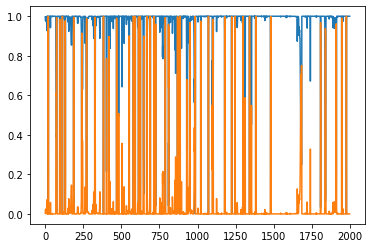

In [53]:
plt.plot(predictedValues[:plotRange])

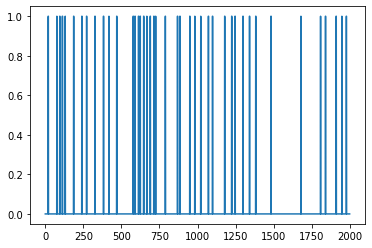

In [54]:
plt.plot(b[:plotRange])

In [45]:
y_pred=best_model.predict_classes(a)

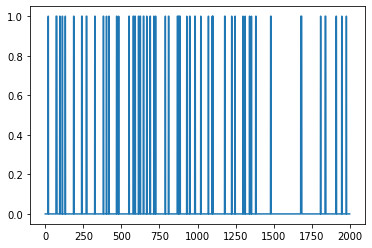

In [55]:
plt.plot(y_pred[:plotRange])


In [48]:
for i in range(len(y_pred)):
    if (b[i]==1 and y_pred[i]==1):
        TP+=1
    elif (b[i]==0 and y_pred[i]==0):
        TN+=1
    elif (b[i]==0 and y_pred[i]==1):
        FP+=1
    elif (b[i]==1 and y_pred[i]==0):
        FN+=1

In [49]:
print([TP, FP])
print([FN, TN])

[954, 756]
[64, 21663]


In [50]:
TP/(TP+FN)

0.93713163064833